# Value Investor

## Introduction

We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

## Data Description

You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

The data can be found here:
- https://www.google.com/url?q=https://docs.google.com/spreadsheets/d/1MiunF_O8eNWIcfaOA4PVm668RN7FgLNA0a6U4LWf5Bk/edit?usp%3Dsharing&sa=D&source=editors&ust=1619361357906000&usg=AOvVaw3N0t0xT7iHrcQCFUPFFyOf

## Objective

- Predict stock price valuations on a daily, weekly and monthly basis. 
- Recommend BUY, HOLD, SELL decisions. 
- Maximize capital returns, minimize losses. Ideally a loss should never happen. 
- Minimize HOLD period.

## Exploratory Data Analysis

### Importing Libraries

In [373]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting the size of the figures displayed
plt.rcParams['figure.figsize'] = (15,7)

### Loading the Dataset

In [374]:
# loading the dataset
excelfile = pd.ExcelFile("2020Q1Q2Q3Q4-2021Q1.xlsx", )

### Structured Based Data Exploration

The data loaded will be in the form of a dictionary of dataframes and their values. The number of sheets can be found as follows:

In [375]:
# The number of sheets in dictionary and the names of the sheets
print(f"Excel spreadsheet consists of {len(excelfile.sheet_names)} sheets")
print()
(excelfile.sheet_names)

Excel spreadsheet consists of 8 sheets



['Russia - Sberbank Rossii PAO (S',
 'Turkey - Koc Holding AS (KCHOL)',
 'Egypt - Medinet Nasr Housing (M',
 'Brazil - Minerva SABrazil (BEEF',
 'Argentina - Pampa Energia SA (P',
 'Colombia - Cementos Argos SA (C',
 'South Africa - Impala Platinum ',
 'South Korea - Dongkuk Steel Mil']

The Excel spreadsheet provided consists of 8 dataframes that contains stock information on different companies and banks. Each company/bank will be analyzed separately as follows:

### SberBank 

PJSC Sberbank is a Russian majority state-owned banking and financial services company headquartered in Moscow. It was called Sberbank of Russia until 2015. Sberbank has operations in several European nations, primarily post-Soviet countries. By 2022, the bank accounted for about a third of all bank assets in Russia.

Here, I'll start by analyzing SberBank.

In [376]:
# creating a SberBank DataFrame 
sberbank_df = excelfile.parse(sheet_name=0, index_col=0, parse_dates=['Date'])

In [377]:
# Displaying first 5 observations
sberbank_df.head()

Price    Open    High     Low    Vol.  Change %
Date                                                                 
2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00M   -0.0076
2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

In [378]:
# Displaying last 5 observations
sberbank_df.tail()

Price                Open             High  \
Date                                                                       
2020-01-09 00:00:00          257.99               259.4           261.76   
2020-01-08 00:00:00          259.15              253.57           259.15   
2020-01-06 00:00:00           253.9              254.75           254.84   
2020-01-03 00:00:00             255              255.99           258.19   
Highest: 296.07      Lowest: 172.15  Difference: 123.92  Average: 234.52   

                                 Low    Vol.  Change %  
Date                                                    
2020-01-09 00:00:00           257.01  38.33M   -0.0045  
2020-01-08 00:00:00           253.03  40.82M    0.0207  
2020-01-06 00:00:00            251.4  22.35M   -0.0043  
2020-01-03 00:00:00            253.7  35.85M    0.0010  
Highest: 296.07      Change %: 14.24     NaN       NaN

In [379]:
# Displaying the number of rows and columns
sberbank_df.shape

(312, 6)

In [380]:
# Displaying information of the dataset
sberbank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 2021-03-31 00:00:00 to Highest: 296.07
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     312 non-null    object 
 1   Open      312 non-null    object 
 2   High      312 non-null    object 
 3   Low       312 non-null    object 
 4   Vol.      311 non-null    object 
 5   Change %  311 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.1+ KB


In [381]:
# Description of the dataset
sberbank_df.describe(include='all')

Price   Open    High    Low    Vol.    Change %
count   312.0  312.0  312.00  312.0     311  311.000000
unique  304.0  294.0  303.00  306.0     305         NaN
top     272.0  194.0  223.15  251.4  62.24M         NaN
freq      2.0    3.0    2.00    2.0       2         NaN
mean      NaN    NaN     NaN    NaN     NaN    0.000668
std       NaN    NaN     NaN    NaN     NaN    0.021931
min       NaN    NaN     NaN    NaN     NaN   -0.095700
25%       NaN    NaN     NaN    NaN     NaN   -0.010100
50%       NaN    NaN     NaN    NaN     NaN    0.000400
75%       NaN    NaN     NaN    NaN     NaN    0.012950
max       NaN    NaN     NaN    NaN     NaN    0.129000

The information shows that most of our dtypes of our variables are of `object` types. Also, there's a null value in the __Vol.__ variable and another null value in the __Change %__ variable. An explanation of the variables in the dataset will help for further analysis and processing:
* __Price__: the closing price on the trading day
* __Open__: the price of the stock when it opened
* __High__: the highest price during the day
* __Low__: the lowest price during the day
* __Vol.__: Volume – how many shares were traded
* __Changes %__: is the percentage of changes between the curent day and the previous day

The statistical summary displayed is a bit misleading because I've used the `include = "all"` which will include the `object` dtypes, so the only numerical statistic is for the __Change %__ variable

### Data PreProcessing

In [382]:
# Removing the last row 
sberbank_df.drop("Highest: 296.07", inplace=True)

# displaying last 5 observations
sberbank_df.tail()

Price    Open    High     Low    Vol.  Change %
Date                                                                 
2020-01-10 00:00:00  258.19  257.86  259.25  256.88  18.85M    0.0008
2020-01-09 00:00:00  257.99   259.4  261.76  257.01  38.33M   -0.0045
2020-01-08 00:00:00  259.15  253.57  259.15  253.03  40.82M    0.0207
2020-01-06 00:00:00   253.9  254.75  254.84   251.4  22.35M   -0.0043
2020-01-03 00:00:00     255  255.99  258.19   253.7  35.85M    0.0010

In [383]:
# Replacing the "Vol." variable name
sberbank_df.rename(columns={"Vol.":"Volume"}, inplace=True)

# Checking the columns name
sberbank_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [384]:
# Checking if all Volume values ends with "M"
sberbank_df['Volume'].str.endswith("M").sum()

311

The "M" in the __Volume__ variable indicates "Million". In order to change the dtype to float, the "M" will be changed to a multiplication to represent the correct value:

In [385]:
# Removing the "M" from the Volume variable values
sberbank_df['Volume'] = sberbank_df['Volume'].str.replace("M", '')

# viewing first 5 observations
sberbank_df.head()

Price    Open    High     Low Volume  Change %
Date                                                                
2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00   -0.0076
2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81   -0.0002
2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68    0.0071
2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07    0.0159
2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22    0.0030

In [386]:
# Changing the data types of the variables in the dataset
sberbank_df = sberbank_df.astype(float)

# Checking the dtypes
sberbank_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

In [387]:
# Parsing the index to a datetimeindex
sberbank_df.index = pd.to_datetime(sberbank_df.index, format="%Y-%m-%d")

# Sorting the date in an ascending format
sberbank_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
sberbank_df.head()

Price    Open    High     Low  Volume  Change %
Date                                                        
2020-01-03  255.00  255.99  258.19  253.70   35.85    0.0010
2020-01-06  253.90  254.75  254.84  251.40   22.35   -0.0043
2020-01-08  259.15  253.57  259.15  253.03   40.82    0.0207
2020-01-09  257.99  259.40  261.76  257.01   38.33   -0.0045
2020-01-10  258.19  257.86  259.25  256.88   18.85    0.0008

In [388]:
# The total duration of the data 
sberbank_df.index.max() - sberbank_df.index.min()

Timedelta('453 days 00:00:00')

In [389]:
# Checking if there are any null values
sberbank_df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Volume      0
Change %    0
dtype: int64

In [390]:
# Checking if there are any duplicates
sberbank_df.duplicated(keep=False).sum()

0

In [391]:
# statistical summary of the data
sberbank_df.describe()

Price        Open        High         Low      Volume    Change %
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000
mean   234.524019  234.417846  237.314759  231.366141   73.056977    0.000668
std     32.079847   32.058167   32.075624   32.076603   38.058095    0.021931
min    174.270000  175.000000  182.200000  172.150000    8.760000   -0.095700
25%    207.700000  207.215000  209.660000  204.475000   47.670000   -0.010100
50%    229.140000  229.080000  231.950000  226.860000   66.260000    0.000400
75%    264.380000  263.885000  267.255000  261.110000   85.120000    0.012950
max    293.300000  294.860000  296.070000  291.500000  263.040000    0.129000

Now that I've changed the data types of the variables in the dataset to numerical dtypes, the statistical description is much more meaningful and it provides the following:
- __Price__: It is the selling price of the stock during trading (Close). It has a mean of 234.5 and a standard deviation of 32.1 through out the year. The minimum is 174.27 and the maximum it reached is 293.3.
- __Open__: It is the price of the stock when it opened. It has a mean of 234.4 and a standard deviation of 32.1. The minimum it reached is 175 and the maximum is 294.86. 
- __High__: It is the highest price the stock reached during the day. It has a mean of 237.3 and a standard deviation of 32.1. The minimum price is 182.2 and the maximum 296.1 during the year.
- __Low__: It is the lowest price the stock reached during the day. It has a mean of 231.4 and a standard deviation of 32.1. The minimum is 172.2 and the maximum is 291.5. 
- __Volume__: The amount of shares that was traded in millions in the dataset. It has a mean of 73.1 and a standard deviation of 38.1. The minimum it recahed is 8.76 and the maximum is 263.
- __Change %__: Refers to the percentage of difference in price between the current day and the previous day. It has a mean of 0.000668% and a standard deviation of 0.021931. It had a minimum of -0.0957 and a maximum of 0.129.

## Statistical Analysis and Diagnostics for SberBank

### Plotting Time Series

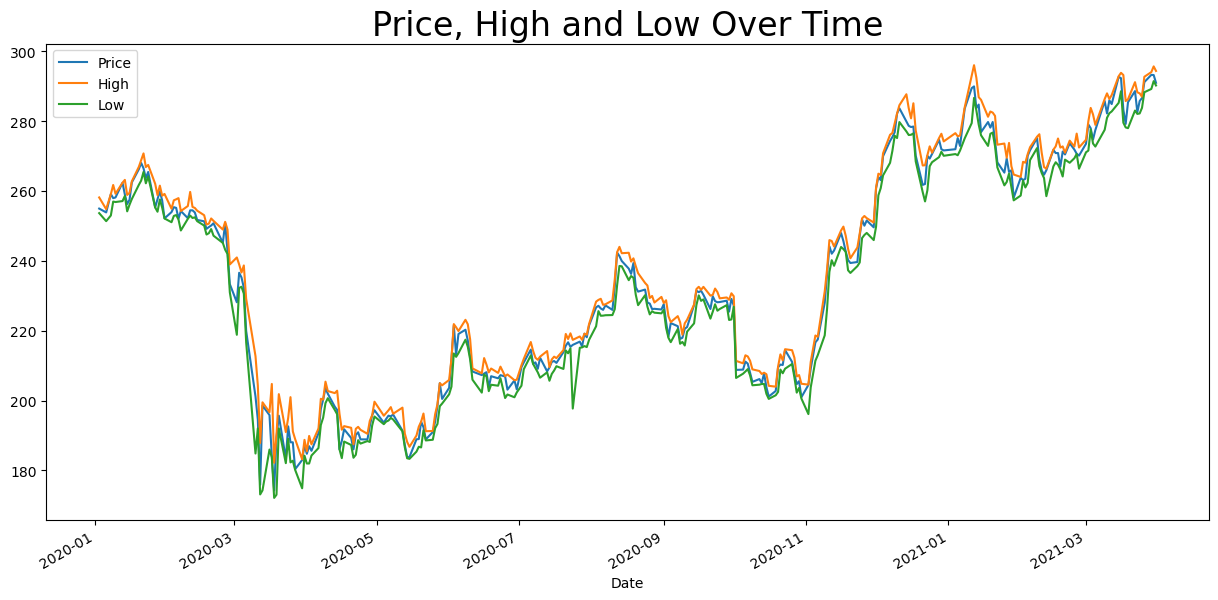

In [392]:
# Line plot of tyhe Price, High and Low variables in sberbank
sberbank_df[['Price','High','Low']].plot()
plt.title('Price, High and Low Over Time', size=24)
plt.show()

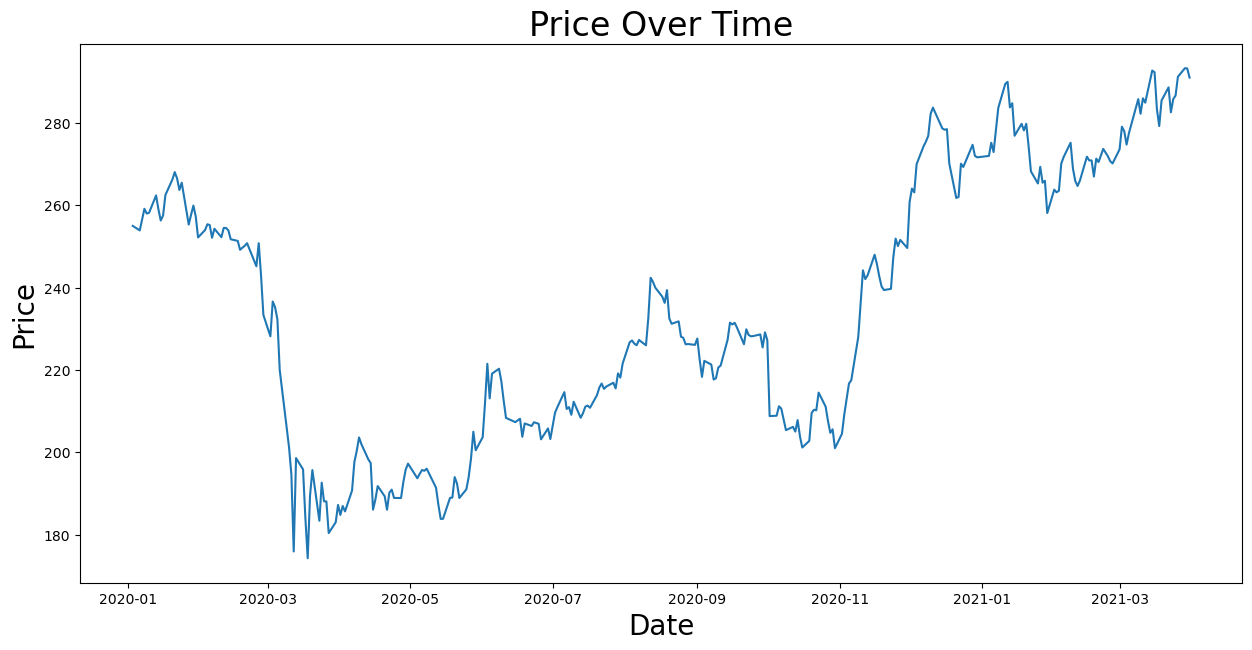

In [393]:
# Line plot of the price variable
plt.plot(sberbank_df.index, sberbank_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

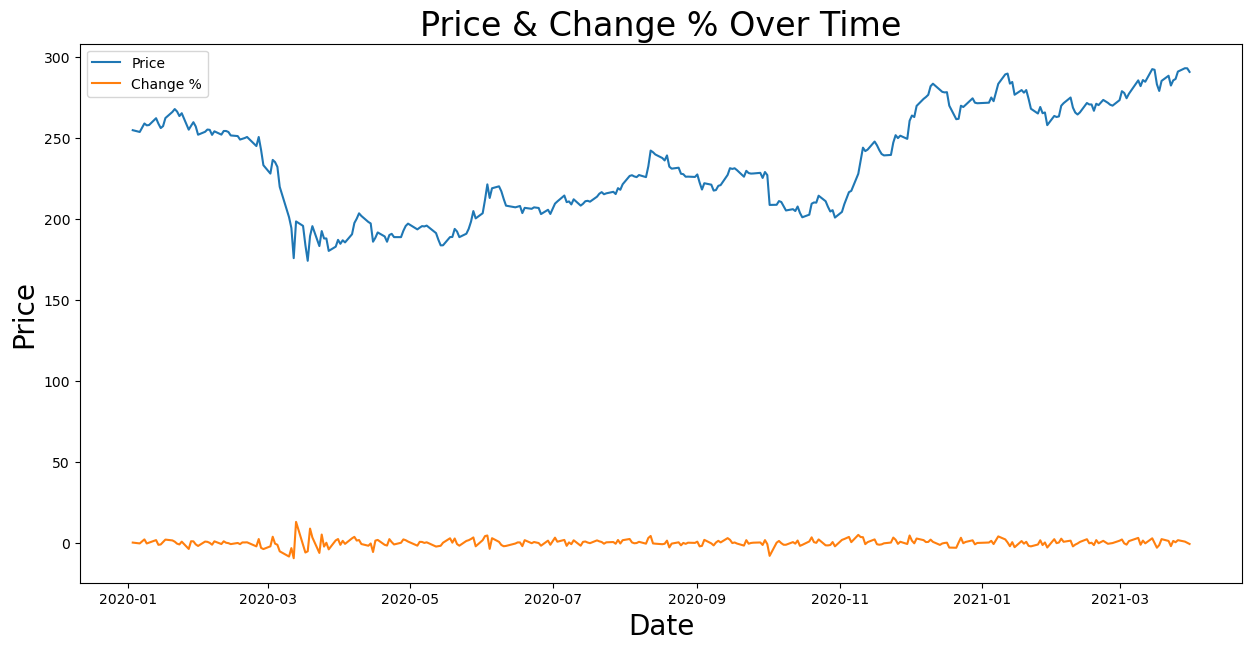

In [394]:
# Line plot of the price and change % variables
plt.plot(sberbank_df.index, sberbank_df['Price'], label='Price')
plt.plot(sberbank_df.index, sberbank_df['Change %']*100, label='Change %')
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price & Change % Over Time", size=24)
plt.legend()
plt.show()

The plots shows the daily closing price from 2020-01-03 to 2021-03-31. In the beginning, a huge drop in the prices occurs around 2020-03 due to the lockdown caused by COVID-19 which impacted businesses all over the world. Then, it shows a fluctuating increase until around 2020-11 it took a dive. Afterwards, it started rising all the way to the end of the data. 

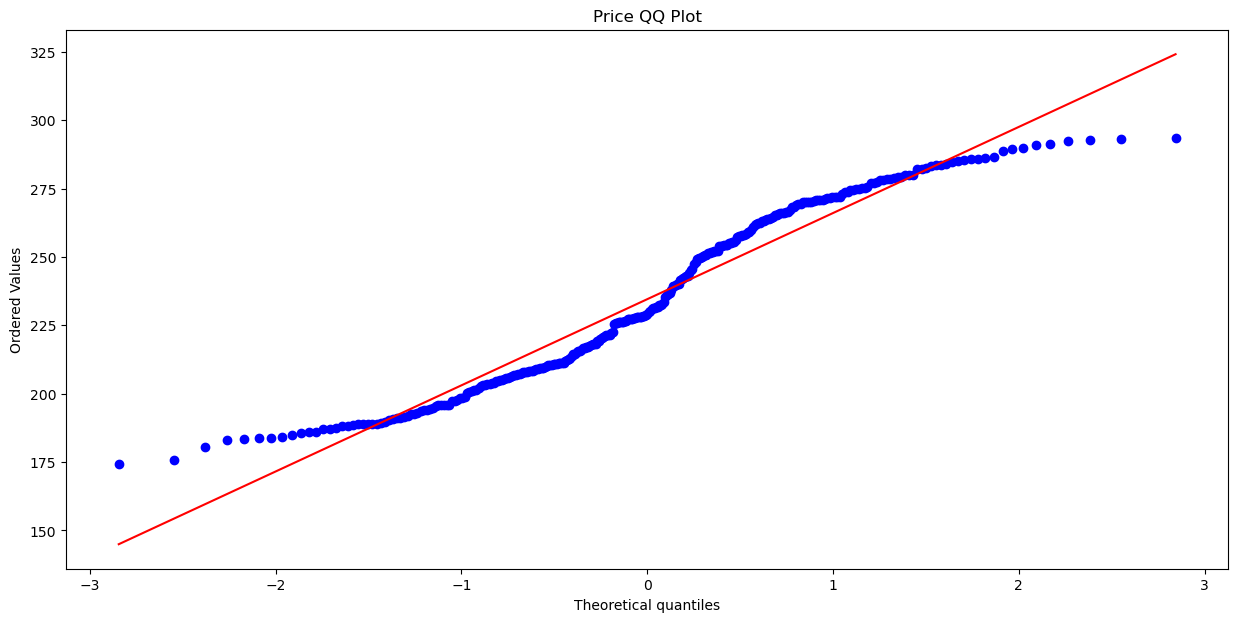

In [395]:
# importing libraries
from scipy import stats
import pylab

# QQ Plot for the price
stats.probplot(sberbank_df['Price'], plot=pylab)
plt.title("Price QQ Plot")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

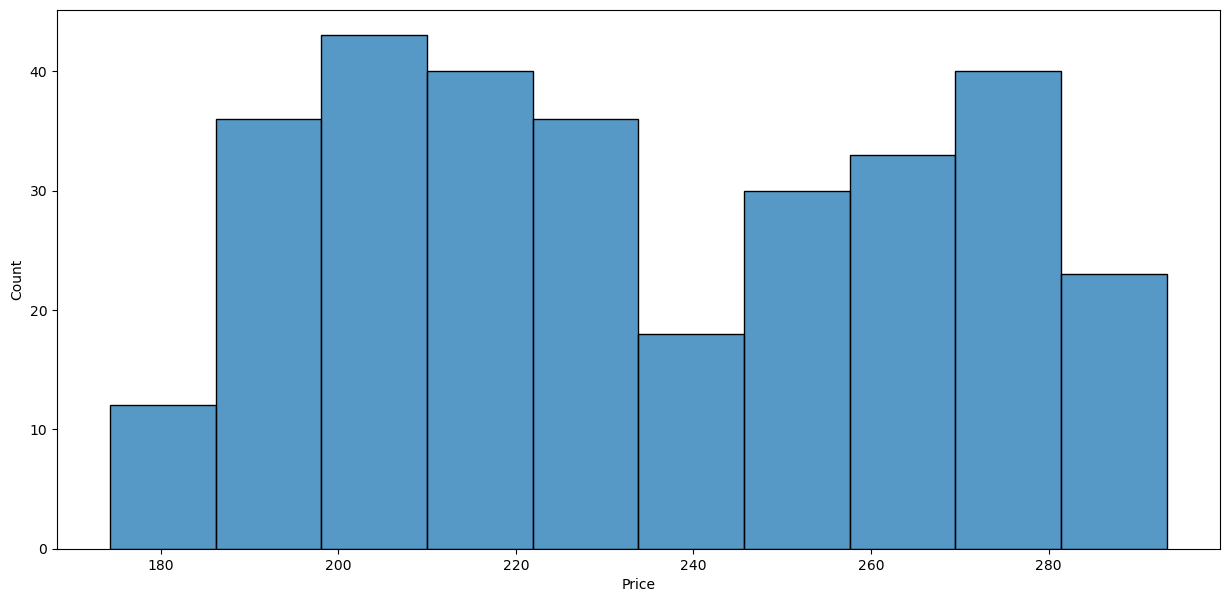

In [396]:
# Histogram Plot of Price
sns.histplot(sberbank_df['Price'])

### Time Series Decomposition

Since our objective is to forecast, I need to extract the components of the time series process for analysis. There are three major components for any time series process:
- __Trend__: gives a sense of the long-term direction of the time series and can be either upward, downward, or horizontal
- __Seasonality__: shows the repeated patterns over time. 
- __Residuals__: is simply the remaining or unexplained portion once trend and seasonality are extracted. 

The decomposition of a time series is the process of extracting the three components and representing them as their models. The modeling of the decomposed components can be either:
- _Additive_: It is when the original model can be reconstructed by adding all three components and it is reasonable when the seasonal variations do not change over time.
    - $  y_t = T_t + S_t + R_t $
- _Multiplicative_: It is when the original model can be reconstructed by multiplying all three cmoponents and it is suitable when the seasonal variation fluctuates over time.
    - $ y_t = T_t x S_t x R_t $
    
Here, I'll be using three different techniques for time series decomposition and they are the following:
- seasonal_decompose
- Seasonal-Trend decomposition with LOESS (STL)
- hp_filter

#### Seasonal Decompose

In [397]:
# importing libraries
from statsmodels.tsa.seasonal import seasonal_decompose, STL

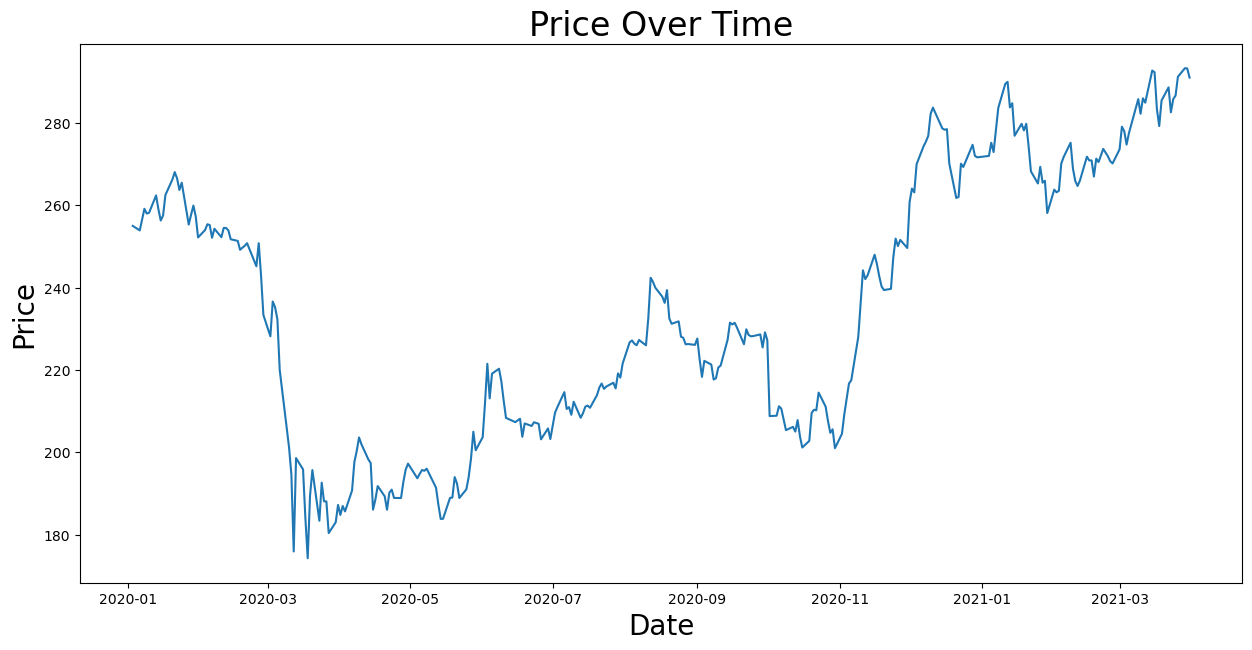

In [398]:
# Line plot of price to choose additive or multiplicative model
plt.plot(sberbank_df.index, sberbank_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

The price plot shows a non linear model; changes over time are not consistent and the seasonality frequency keep on increasing/decreasing over time. This suggest that it is more suitable to use a _multiplicative_ model. 

In [399]:
# setting the time series frequency
sberbank_df = sberbank_df.asfreq("b", method='ffill')

# Checking the time series frequency 
print(sberbank_df.index.freq)

<BusinessDay>


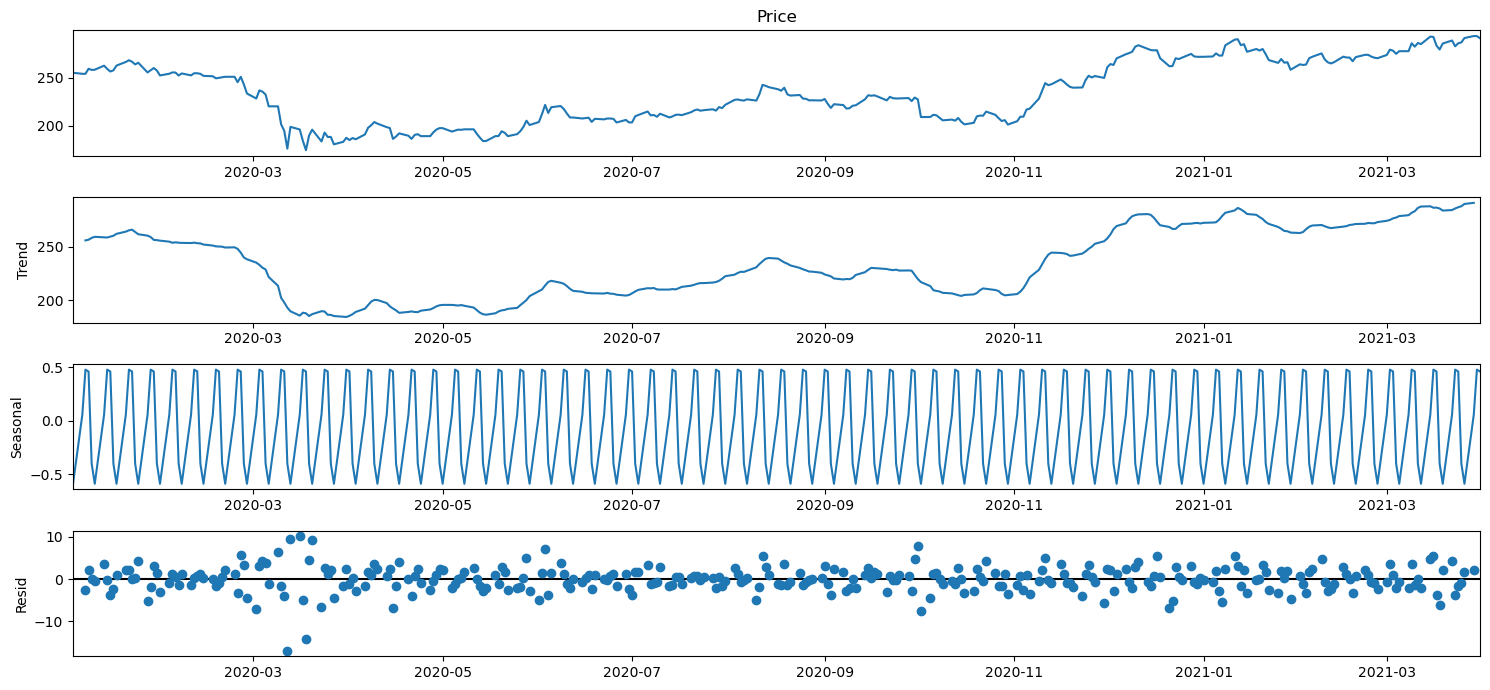

In [400]:
# Applying a multiplicative seasonal decomposition
sberbank_df_decomposed = seasonal_decompose(sberbank_df['Price'], model=' multiplicative')

# Plotting the trend, seasonal and residual
sberbank_df_decomposed.plot()
plt.show()

Let's break down the resulting plot into four parts:
1. This is the original observed data that we are decomposing.
2. The _trend_ component idicates whether there is positive, negative or constant long-term movement.
3. The _seasonal_ component shows the seasonality effects on the repeating pattern of highs and lows.
4. The _residual (noise)_ component shows the random variation in the data.

#### Seasonal-Trend Decomposition (STL)

The STL class uses the LOESS seasonal smoother, which stands for _Locally Estimated Scatterplot Smoothing_. STL is more robust than seasonal_decompose for measuring non-linear relationships. On the otehr hand, STL assumes additive composition, so you do not need to indicate a model. 

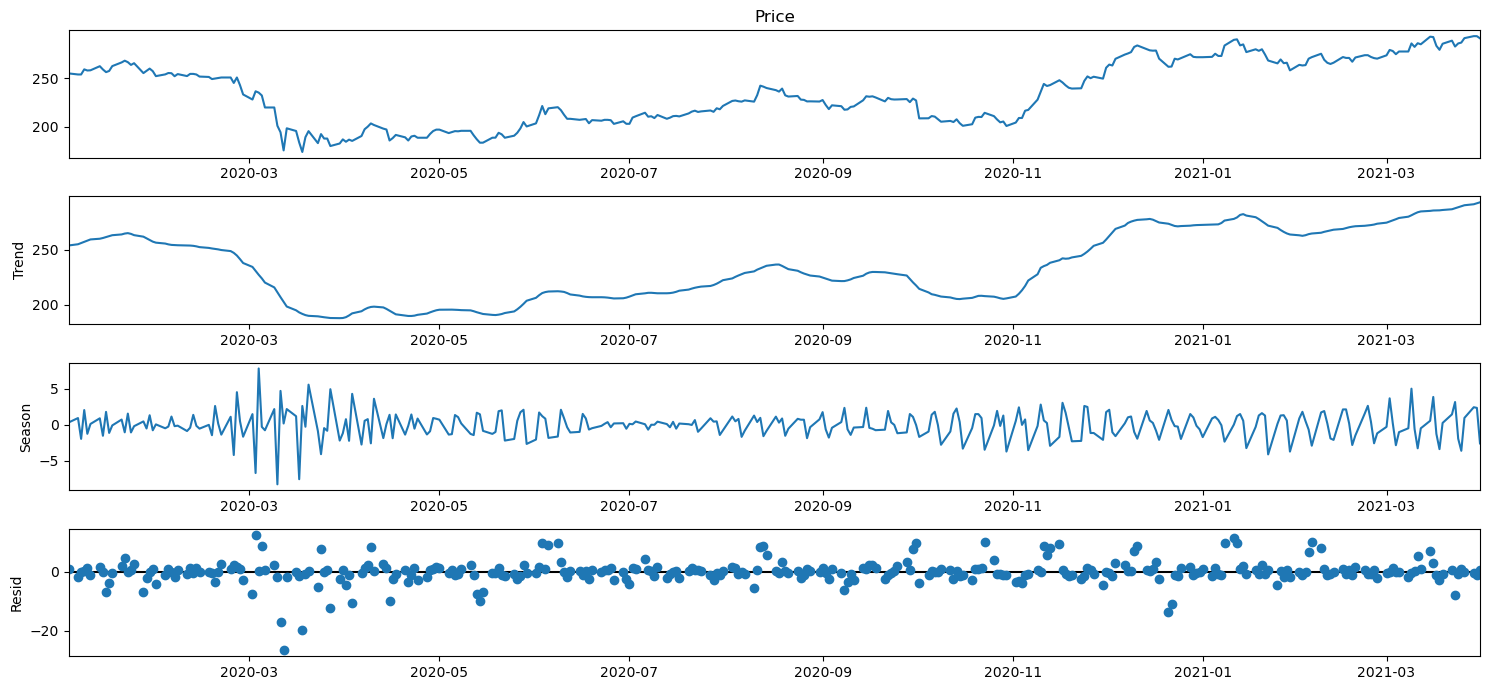

In [401]:
# Applying STl 
sberbank_stl = STL(sberbank_df['Price'], seasonal=7, robust=True).fit()

# Plotting the results
sberbank_stl.plot()
plt.show()

#### Hodrick-Prescott Filter

The Hodrick-Prescott filter is a smoothing filter that can be used to seperate short-term fluctuations (cyclic variations) from long-term trends. The hp_filter returns two components: a _cyclical_ component and a _trend_ component.

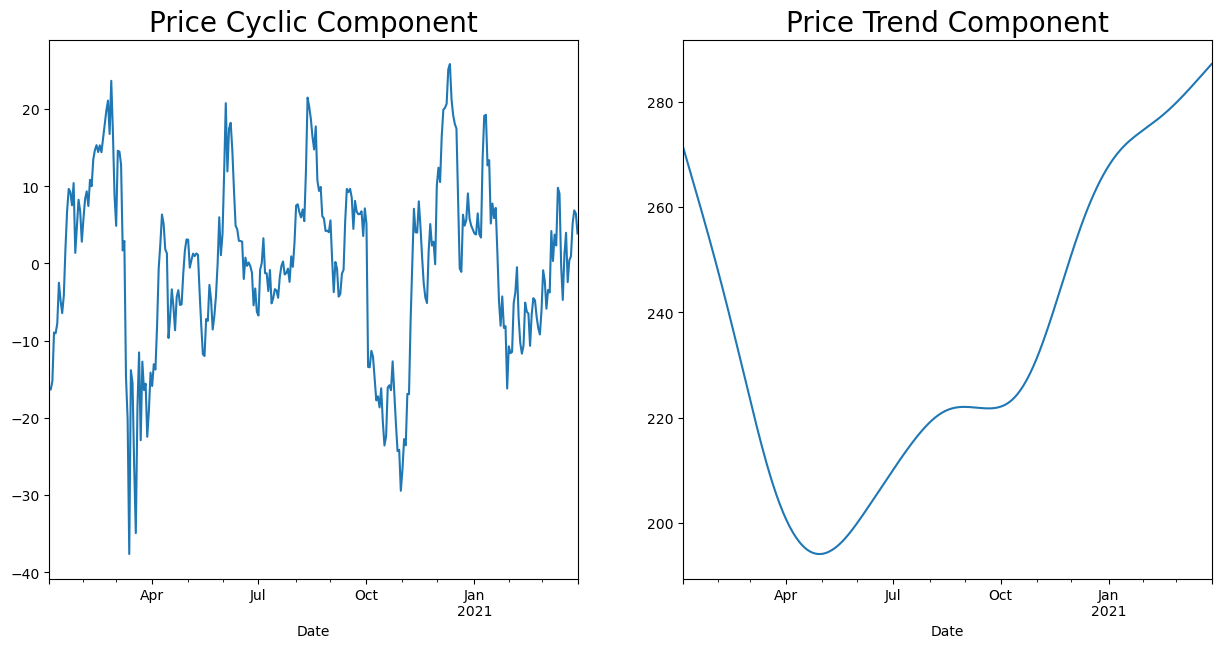

In [402]:
# importing library
from statsmodels.tsa.filters.hp_filter import hpfilter

# Applying hp_filter
sberbank_cyclic, sberbank_trend = hpfilter(sberbank_df['Price'], lamb=129600)

# Plotting the results
fig, ax = plt.subplots(1, 2)
sberbank_cyclic.plot(ax=ax[0], title='Price Cyclic Component')
sberbank_trend.plot(ax=ax[1], title="Price Trend Component")
ax[0].title.set_size(20)
ax[1].title.set_size(20)
plt.show()

### Time Series Stationarity

Several time series forecasting techniques assume _stationarity_. This makes it essential to undestand whether the time series we're working with is _stationary_ or _non-stationary_. 

A stationary time series implies that specific statistical properties do not vary over time and remain steady, making the process easier to model and predict. On the other hand, a non-stationary process is more complex to model due to the dynamic nature and variations over time.

There are different approaches for defining stationarity; some are strict and may not be possible to observe in real-world data, referred to as _strong stationarity_. In contrast, other definitions are more modest in their criteria and can be observed in (or transformed into) real-world data, known as _weak stationarity_.

A stationary time series is defined as a time series with a constant mean ($\mu$), a constant variance ($\sigma^/2$), and a constistent covariance (or autocorrelation) between identical distanced periods (_lags_). Having the mean and variance as constants simplifies modeling since you are not solving for them as functions of time. 

In this section, I'll explore two statistical tests, the _Augmented Dickey-Fuller (ADF)_ test and the _Kwiatkowski-Philips-Schmidt-Shin (KPSS)_ test. Both ADF and KPSS are based on linear regression and are a type of statistical hypothesis test. The _null hypothesis for ADF states that it is non-stationary_ while _KPSS has the oppsite null hypothesis_. 

In [403]:
# importing adfuller and kpss from statsmodels
from statsmodels.tsa.stattools import adfuller, kpss

In [404]:
# Applying both adfuller test and kpss test
adf_output = adfuller(sberbank_df['Price'])
kpss_output = kpss(sberbank_df['Price'])

# Function to display the results
def display_results(test_output, test='adf'):
    print(f"Test Statistics: {test_output[0]:.4f}")
    print(f"P-Value: {test_output[1]:.4f}")
    print(f"Number of Lags: {test_output[2]}")
    if test == 'adf':
        if test_output[1] < 0.05:
            print("Stationary")
        else:
            print("Non-Stationary")
    elif test == "kpss":
        if test_output[1] < 0.05:
            print("Non-Stationary")
        else:
            print("Stationary")
        
    
# Applying function to adf results
print("ADF Test Results:")
display_results(adf_output, test='adf')
print()
print("KPSS Test Results")
display_results(kpss_output, test='kpss')


ADF Test Results:
Test Statistics: -1.0425
P-Value: 0.7375
Number of Lags: 4
Non-Stationary

KPSS Test Results
Test Statistics: 1.2950
P-Value: 0.0100
Number of Lags: 11
Non-Stationary


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


For ADF, the p-value is at 0.7375, which is greater than 0.05, so you _cannot reject the null hypothesis_, and therefore, the time series is _non-stationary_. 

For KPSS, the p-value is at 0.01, which is less than 0.05, so you _reject the null hypothesis_, and therefore, the time series is _non-stationary_. 

### Transforming Time Series Into Stationary

Essentially, stationarity can be achieved by removing trend (detrending) and seasonality effects. There are different transformation and differencing techniques. In this section, I've decided to use the order differencing, which is calculated by subtarcting an observation at time t from the previous observation at time t-1.
- $ y_t - y_{t-1}$

In [405]:
# Creating a function that checks stationarity
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = "Stationary", "Non-Stationarity"
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = "Stationary"
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = "Non-Stationary"
    return(print('KPSS test:', kpssh, ", Number of lags:", kps[2],'\nADF test:', adfh, ", Number of lags:", adf[2]))

In [406]:
# Applying first order differencing
first_order_diff = sberbank_df['Price'].diff()

# Dropping null values
first_order_diff.dropna(inplace=True)

In [407]:
# Checking stationarity using the function
check_stationarity(first_order_diff)

KPSS test: Stationary , Number of lags: 5 
ADF test: Stationary , Number of lags: 3


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


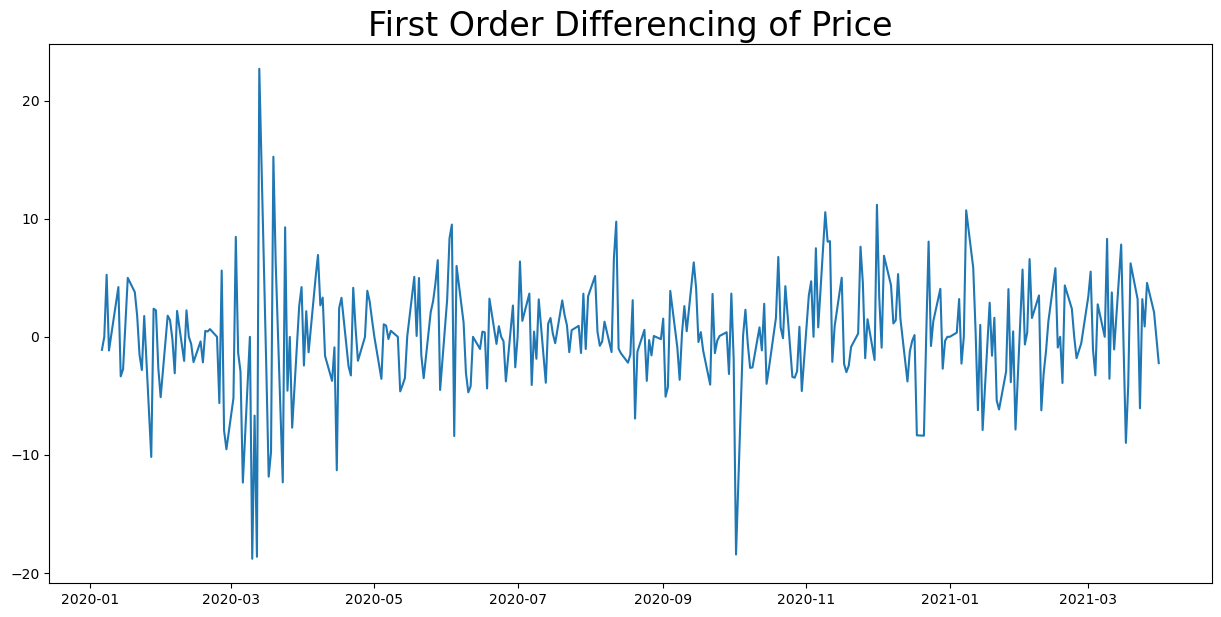

In [408]:
# Line plot of first order differencing of price
plt.plot(first_order_diff)
plt.title("First Order Differencing of Price", size=24)
plt.show()

From the results of the check_stationarity function and the line plot, it is safe to say that, applying a first order difference on the Price variable was enough to make the data stationary which was checked by two statistical test: ADF test and KPSS test. I noticed the number of lags are different, for the KPSS it was 5 lags (5 days) and for the ADF it was 3 lags (3 days). 

### Testing for AutoCorrelation

__Autocorrelation__ measures the strength of a linear relationship between two variables, except that here it is used to measure the linear relationship between _time series values separated by a lag_. I'll perform a __Ljung-Box__ test to check for autocorrelations and whether they are significantly far off from 0. _The null hypothesis for the Ljung-Box test states that the previous lags are not correlated with the current period_. 

In [409]:
# Importing library
from statsmodels.stats.diagnostic import acorr_ljungbox

# Applying Ljung-Box test on the first order differenced price
acorr_ljungbox(first_order_diff, lags=None, return_df=True)

lb_stat  lb_pvalue
1    0.017000   0.896263
2    0.620425   0.733291
3    1.467932   0.689691
4   18.226138   0.001115
5   18.394987   0.002490
6   19.931230   0.002849
7   20.998302   0.003773
8   21.038698   0.007045
9   21.320682   0.011300
10  24.062481   0.007436

The test statistic for the 10 lags displayed shows that the 1, 2 and 3 lags are statistically insignificant (p-value > 0.05), so we fail to reject the null hypothesis. But, the further lags (from 4 and onwards) are statistically significant (p-value < 0.05) which leads to rejecting the null hypothesis, meaning there is an autocorrelation. 

## Building Statistical Models

### Plotting ACF and PACF

_The Autocorrelation Function (ACF)_ and the _Partial Autocorrelation Function (PACF)_ plots are used to help identify if the time series process is an Autoregressive (AR), Moving Average (MA) or an ARMA process amd the significant lag values (p and q). Both ACF and PACF and referred to as _correlograms_ since the plots represent the correlation statistics. 

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


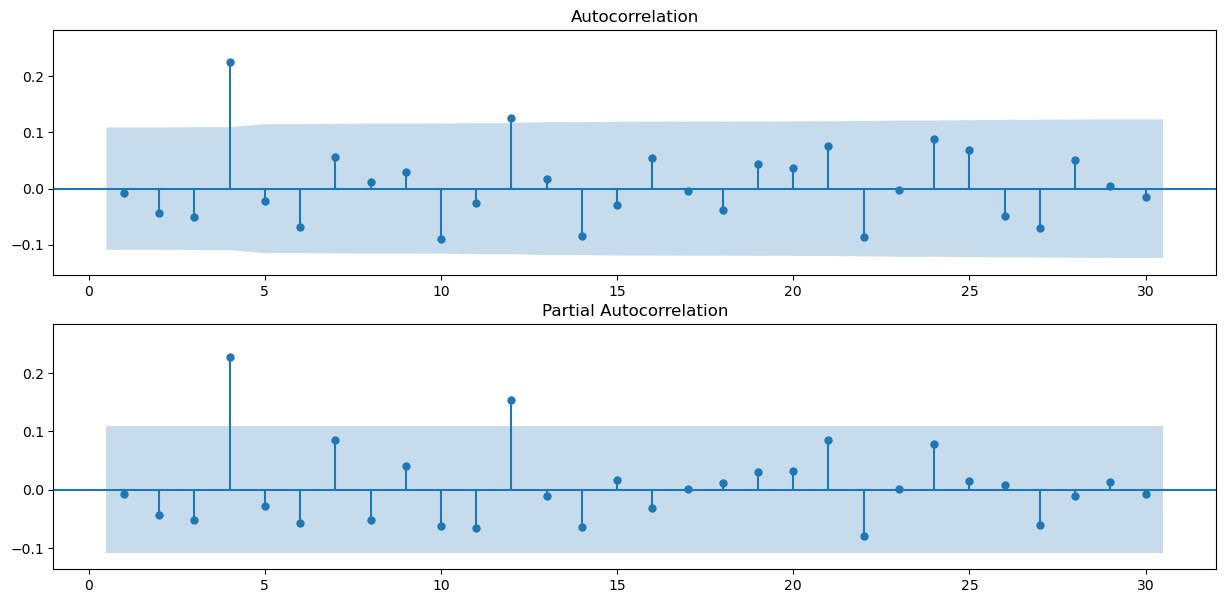

In [410]:
# importing libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF and PACF of the first_order_differenced
fig, ax = plt.subplots(2, 1)
plot_acf(first_order_diff, zero=False, lags=30, ax=ax[0], auto_ylims=True)
plot_pacf(first_order_diff, zero=False, lags=30, ax=ax[1], auto_ylims=True)
plt.show()

The ACF plot shows a significant spike at lag (order) 4 and lag 12. Significance is represented when a lag (vertical line) goes above or below the shaded area which represents the confidence interval (95% by default). The PACF plot shows a similar pattern at the same 4th and 12th lags they are significant, which leads to me conclude that a SARIMA would be more suitable. 

### Train Test Split

In machine learning, train/test split splits the data randomly, as there’s no dependence from one observation to the other. That’s not the case with time series data. Here, you’ll want to use values at the rear of the dataset for testing and everything else for training.

One of the instructions of the project is to use the 2020 data in order to predict with the 2021. So, the train test split will be as follows:

In [411]:
# Train split
sberbank_train = sberbank_df.loc['2020']

# Test split
sberbank_test = sberbank_df.loc['2021']

# Number of training and testing data points
print(f"The number of training data points: {len(sberbank_train)}")
print(f"The number of testing data points: {len(sberbank_test)}")

The number of training data points: 260
The number of testing data points: 64


### Auto ARIMA

Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

The auto_arima automates the process for finding the optimal parameters. The auto_arima function uses a stepwise algorithm that is faster and more efficient.

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1549.508, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1551.507, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1553.226, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1555.214, Time=0.03 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1539.863, Time=0.06 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1540.750, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1551.507, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1553.498, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1555.226, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1552.246, Time=0.07 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1541.151, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1553.093, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1555.093, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=1543.552, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=1543.088, Time=0.11 sec
 ARIMA(3,1

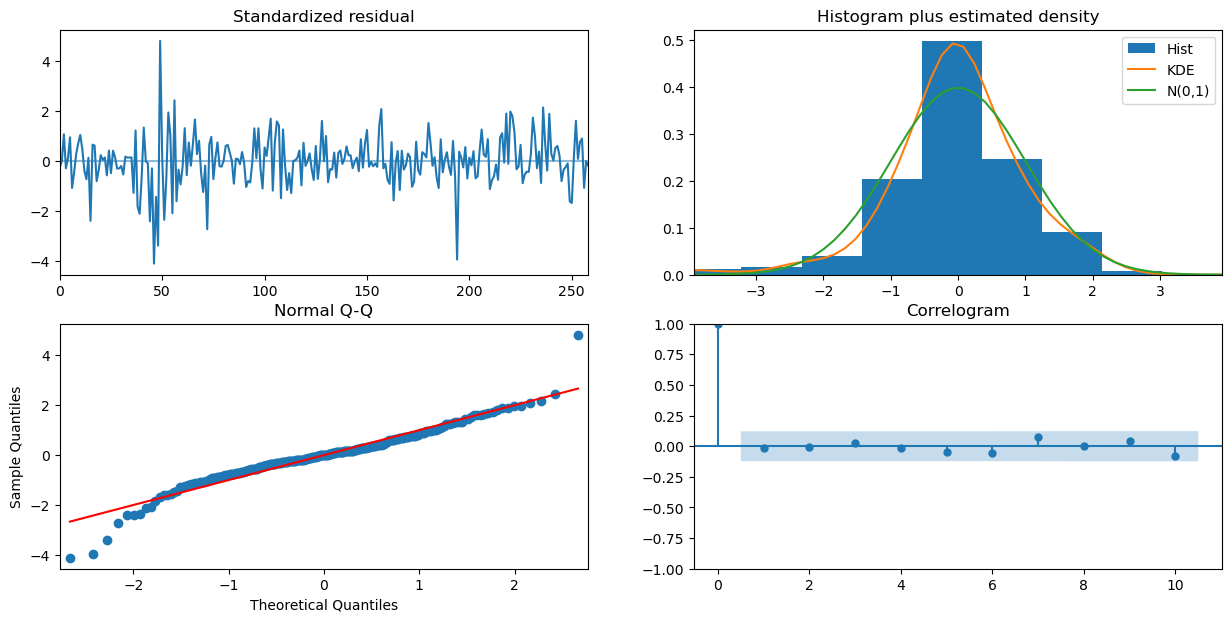

In [412]:
# importing library
from pmdarima import auto_arima

# applying auto arima 
auto_model = auto_arima(sberbank_train['Price'], test='adf', stepwise=False, trace=True)

# model summary
print(auto_model.summary())

# diagnostic plots of best model
auto_model.plot_diagnostics()
plt.show()

In [413]:
# best model parameters
auto_model.order

(0, 1, 4)

The auto_arima function provided a best model according to the information criterion which is Aikaike Information Criterion (AIC). the lower the AIC, the better fit the model is for the data. The result stated that a SARIMAX model with the following parameters:
- p: 0
- d: 1
- q: 4

The diagnostic plots concludes the following:
1. Standardized residual plot: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.
2. Normal Q-Q plot: The red line represents the normal distribution and when the data is perfectly aligned with it, it means it follows a normal distribution. 
3. The density plot: The density plot on the top right suggests a normal distribution with a mean of zero.
4. The correlogram plot: The residual errors are not autocorrelated. The bars doesn't go above the significance threshold which means the prices aren't highly correlated.


### SARIMAX

The auto_model variable stored the winning SARIMAX model. I'm going to make a prediction using the model and plot it with lower and upper bounderies.

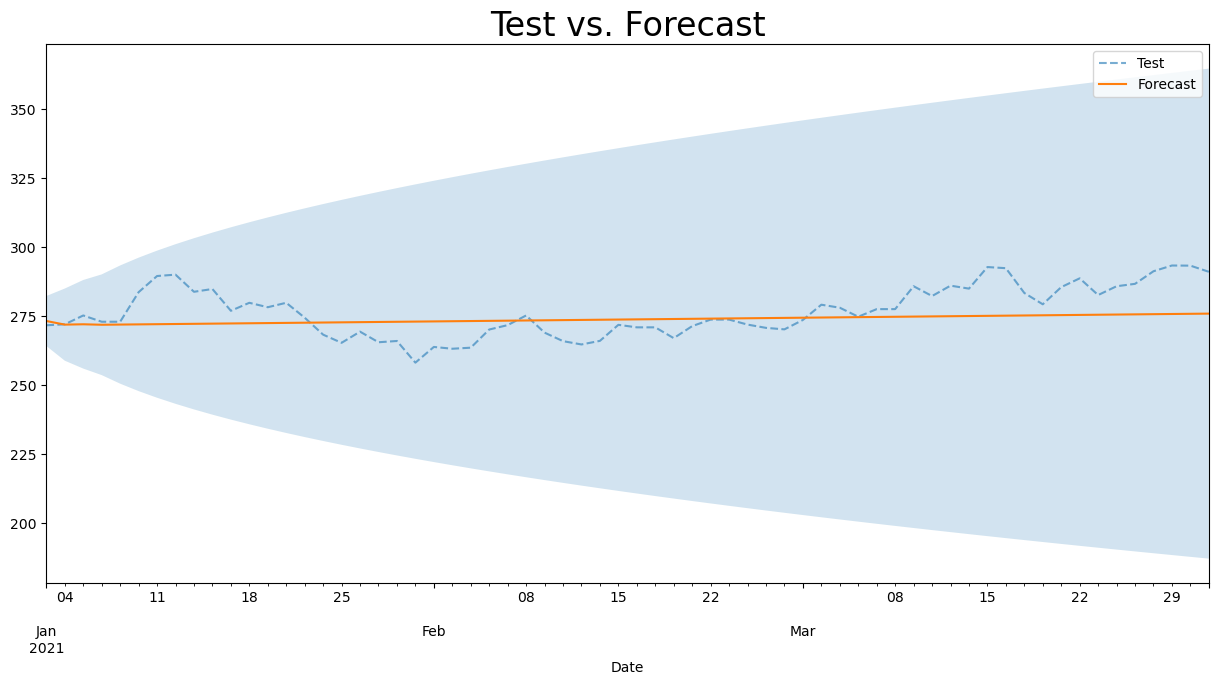

In [414]:
# prediction size
n = sberbank_test.shape[0]

# prediction and confidence interval using the model
sberbank_forecast, sberbank_conf_interval = auto_model.predict(n_periods=n, return_conf_int=True)

# storing the upper and lower confidence intervals
lower_ci, upper_ci = zip(*sberbank_conf_interval)

# test index
index = sberbank_test.index

# Prediction with confidence interval plot
ax = sberbank_test['Price'].plot(style='--', alpha=0.6)
pd.Series(sberbank_forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.title("Test vs. Forecast", size=24)
plt.legend(['Test','Forecast'])
plt.show()

In [415]:
# Adding the prediction of the model to the sberbank test dataframe
sberbank_test['model_preds'] = sberbank_forecast

The plot above display the test data (blue dashed line) and the predictions of the best model (orange line) and they both fall within the 95% confidence interval which makes it seem like the model is doing fine. The confidence interval represents the likelihood that the real values would lie between this range. 

### SARIMAX Model Evaluation

In [416]:
# importing libraries
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [417]:
mse = mean_squared_error(sberbank_test.Price, sberbank_forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(sberbank_test.Price, sberbank_forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(sberbank_test.Price, sberbank_forecast))
print('RMSE: '+str(rmse))
mape = mean_absolute_percentage_error(sberbank_test.Price, sberbank_forecast)
print('MAPE: '+str(mape))

MSE: 78.76195798565729
MAE: 7.190349526091179
RMSE: 8.874793405238078
MAPE: 0.025672915049655968


The SARIMAX model that was created proved to be well with results of different evaluation metrics as follows:
- MSE: 78.7619
- MAE: 7.1903
- RMSE: 8.8748
- MAPE: 0.0257

## LSTM Model

Long Short-Term Memory (LSTM) is one type of recurrent neural network which is used to learn order dependence in sequence prediction problems. Due to its capability of storing past information, LSTM is very useful in predicting stock prices. This is because the prediction of a future stock price is dependent on the previous prices.

In [419]:
# Checking the data columns
print(sberbank_train.columns)
print(sberbank_test.columns)

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')
Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %', 'model_preds'], dtype='object')


In [420]:
# Creating a copy of the training and testing data
lstm_sberbank_train = sberbank_train.copy()
lstm_sberbank_test = sberbank_test.copy()

In [423]:
# Creating a function which splits the data into a train test split and then normalizes the data
def build_train_test_normalize(time_steps, periods):
    
    # Setting random seed for reproducibility
    np.random.seed(42)
    
    # Creating train and test set
    ts_train = lstm_sberbank_train.iloc[:, 0:1].values
    ts_test = lstm_sberbank_test.iloc[:, 0:1].values
    ts_train_size = len(ts_train)
    ts_test_size = len(ts_test)
    
    # Normalizing the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = scaler.fit_transform(ts_train)
    
    # Creating training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps, ts_train_size - 1):
        X_train.append(ts_train_scaled[i - time_steps:i, 0])
        y_train.append(ts_train_scaled[i + periods, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # Reshape X_train
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    inputs = pd.concat((lstm_sberbank_train.iloc[:,0:1], lstm_sberbank_test.iloc[:,0:1]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    # Reshaping X_test
    X_test = []
    for i in range(time_steps, ts_test_size + time_steps - periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, scaler

In [424]:
# Choosing a period of 30 days and prediction period of 1 
X_train, y_train, y_test, scaler = build_train_test_normalize(30, 1)

In [426]:
# Shape of train and test data created by the function
print(f"Shape of training data created: {X_train.shape}")
print(f"Shape of testing data created: {X_test.shape}")

Shape of training data created: (229, 30, 1)
Shape of testing data created: (64, 1, 5)


In [431]:
#define plot function 
def actual_vs_pred_plot(preds, test_data=lstm_sberbank_test, plot=True):
   
    #define a new dataframe with price and prediction columns
    
    actual_pred = pd.DataFrame(columns = ['Price', 'prediction'])
    actual_pred['Price'] = test_data.iloc[:,0:1].iloc[0:len(preds)]
    actual_pred['prediction'] = preds[:,0]
    MAPE=np.mean(np.abs(np.array(actual_pred['prediction'])- np.array(actual_pred['Price']))/np.abs(np.array(actual_pred['Price'])))
    RMSE=math.sqrt(mean_squared_error(np.array(actual_pred['Price']), np.array(actual_pred['prediction'])))
    if plot==True:
        actual_pred.plot()
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend(loc='upper left', fontsize=8)
        plt.show()
    return MAPE,RMSE

In [428]:
#create a LSTM model
def LSTM_model_fc(X_train, y_train, X_test, scaler, epoch=100, batch_size=32,optimizer='Adam',units=100):
    np.random.seed(1)
    # The LSTM architecture
    regressor = Sequential()
    # Adding first LSTM layer and some dropout Dropout regularisation
    regressor.add(LSTM(units=units, return_sequences=True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # Adding second LSTM layer and some dropout Dropout regularisation
    regressor.add(LSTM(units=units, return_sequences=True))
    regressor.add(Dropout(0.2))

    # Adding third LSTM layer and some dropout Dropout regularisation
    regressor.add(LSTM(units=units, return_sequences=True))
    regressor.add(Dropout(0.2))

    # Adding fourth LSTM layer and some dropout Dropout regularisation
    regressor.add(LSTM(units=units, return_sequences=True))
    regressor.add(Dropout(0.2))

    # Adding fifth LSTM layer and some dropout Dropout regularisation
    regressor.add(LSTM(units=units))
    regressor.add(Dropout(0.2))

    # Adding the Output Layer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    # Because we're doing regression hence mean_squared_error
    regressor.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics=['accuracy'])

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, epochs = epoch, batch_size = batch_size)
    
    LSTM_prediction = regressor.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return regressor, LSTM_prediction

In [433]:
#choose a time step of 30 days and a prediod of 1 predictions
X_train, y_train, X_test, sc = build_train_test_normalize(30,1)
X_train.shape[0],X_train.shape[1]
LSTM_model_before, LSTM_prediction_before = LSTM_model_fc(X_train, y_train, X_test, scaler)

Epoch 1/100


2022-09-28 13:18:44.003900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:18:44.443278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:18:44.506342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:18:44.573905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:18:44.640585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:18:44.718353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:18:44.832135: I tensorflow/core/grappler/optimizers/cust

8/8 [==============================] - 6s 110ms/step - loss: 0.0844 - accuracy: 0.0044
Epoch 2/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0422 - accuracy: 0.0087
Epoch 3/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0422 - accuracy: 0.0044
Epoch 4/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0413 - accuracy: 0.0044
Epoch 5/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0345 - accuracy: 0.0044
Epoch 6/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0275 - accuracy: 0.0087
Epoch 7/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0240 - accuracy: 0.0087
Epoch 8/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0198 - accuracy: 0.0087
Epoch 9/100
8/8 [==============================] - 0s 40ms/step - loss: 0.0199 - accuracy: 0.0087
Epoch 10/100
8/8 [==============================] - 0s 39ms/step - loss: 0.0165 - accuracy: 0.0087
Epoch 11/100
8/8 [============

2022-09-28 13:19:19.438037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:19:19.583071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:19:19.634591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s

2022-09-28 13:19:19.692114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:19:19.748280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-28 13:19:19.802956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 151ms/step


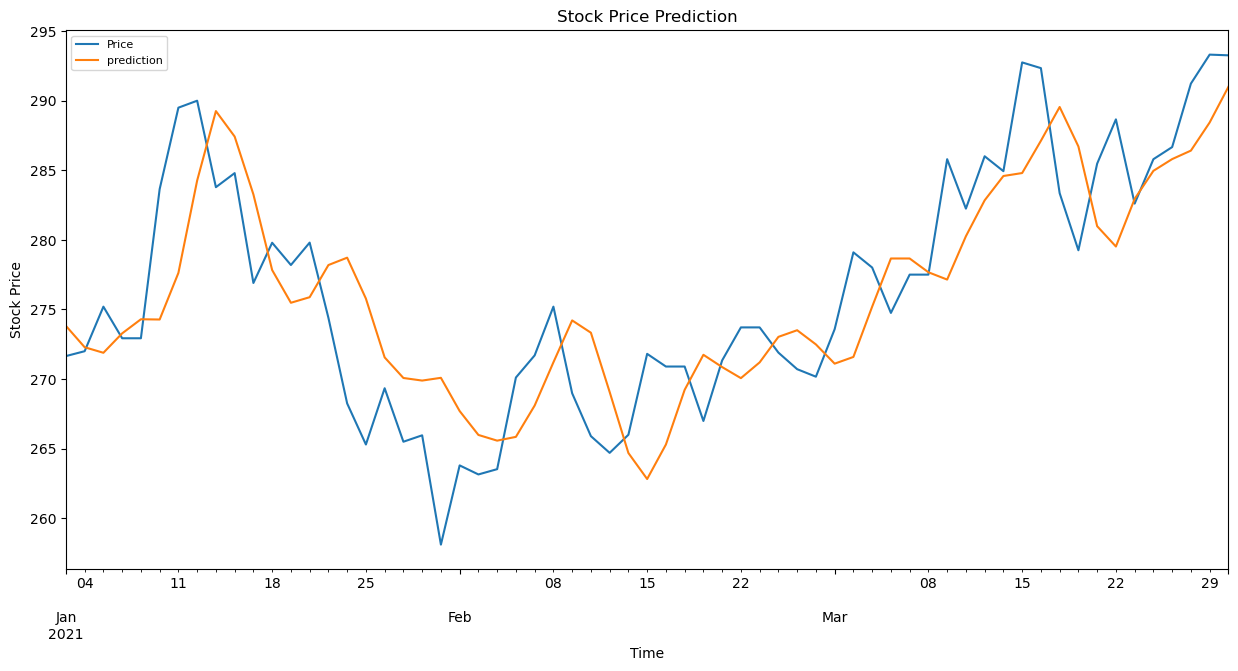

(0.015185465512693274, 5.1463373319963415)

In [434]:
#Plot predictions
actual_vs_pred_plot(LSTM_prediction_before) 

In the preceding section, a train test split function was created in order to split the time series data provided into a suitable form for the Long Short Term Memory (LSTM) model, which takes in the time periods (training data points) and the periods (the periods we'd like to predict for). An LSTM model that consists of 5 hidden layers of an LSTM layer and a Dropout layer was trained which yielded good results as follows:
- Mean Absolute Percentage Error: 0.015
- Root Mean Squared Error: 5.146


## Bollinger Bands

Bollinger Bands are a technical analysis tool developed by John Bollinger for generating oversold or overbought signals.
There are three lines that compose Bollinger Bands: A simple moving average (middle band) and an upper and lower band.
The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average (which is the center line), but they can be modified.
When the price continually touches the upper Bollinger Band, it can indicate an overbought signal while continually touching the lower band indicates an oversold signal.

Calculating the SMA (Simple Moving Average) of a stock is the first step to calculating Bollinger bands. Bollinger bands are calculated two standard deviations away from the SMA. Standard deviation is essentially the measure of how spread out data is and how far away it is from the mean. Bollinger bands are two standard deviations away from the SMA. So when calculating them, the formula we would use for the top band is sma + std x 2 and the bottom bands would be sma — std x 2.

In [46]:
# Sorting the index in an ascending order
sberbank_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
sberbank_df.head()

Price    Open    High     Low  Volume  Change %
Date                                                        
2020-01-03  255.00  255.99  258.19  253.70   35.85    0.0010
2020-01-06  253.90  254.75  254.84  251.40   22.35   -0.0043
2020-01-07  253.90  254.75  254.84  251.40   22.35   -0.0043
2020-01-08  259.15  253.57  259.15  253.03   40.82    0.0207
2020-01-09  257.99  259.40  261.76  257.01   38.33   -0.0045

In [160]:
# Creating a function to calculate simple moving average
def get_sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

sberbank_df['sma_7'] = get_sma(sberbank_df['Price'], 7)
sberbank_df.tail()

Price    Open    High     Low  Volume  Change %    sma_20  \
Date                                                                     
2021-03-25  286.66  286.50  287.03  283.85   35.22    0.0030  282.3205   
2021-03-26  291.22  288.63  292.75  288.32   56.07    0.0159  283.3730   
2021-03-29  293.30  289.72  294.09  289.26   43.68    0.0071  284.3590   
2021-03-30  293.25  294.86  295.72  291.50   38.81   -0.0002  285.0665   
2021-03-31  291.02  294.00  294.42  290.26   47.00   -0.0076  285.7170   

              upper_bb    lower_bb    sma_5       sma_7  
Date                                                     
2021-03-25  290.216387  281.451613  285.834  284.538571  
2021-03-26  293.423668  280.544332  286.984  285.662857  
2021-03-29  296.531489  279.296511  287.914  287.670000  
2021-03-30  297.241980  282.846020  290.044  288.781429  
2021-03-31  296.493369  285.686631  291.090  289.120000

In [161]:
# Creating a function to calculate the bollinger upper and lower bands
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

# Applying function on Price variable
sberbank_df['upper_bb'], sberbank_df['lower_bb'] = bb(sberbank_df['Price'], sberbank_df['sma_7'], 7)
sberbank_df.tail()

Price    Open    High     Low  Volume  Change %    sma_20  \
Date                                                                     
2021-03-25  286.66  286.50  287.03  283.85   35.22    0.0030  282.3205   
2021-03-26  291.22  288.63  292.75  288.32   56.07    0.0159  283.3730   
2021-03-29  293.30  289.72  294.09  289.26   43.68    0.0071  284.3590   
2021-03-30  293.25  294.86  295.72  291.50   38.81   -0.0002  285.0665   
2021-03-31  291.02  294.00  294.42  290.26   47.00   -0.0076  285.7170   

              upper_bb    lower_bb    sma_5       sma_7  
Date                                                     
2021-03-25  290.701779  278.375364  285.834  284.538571  
2021-03-26  293.467059  277.858656  286.984  285.662857  
2021-03-29  294.989344  280.350656  287.914  287.670000  
2021-03-30  296.864691  280.698167  290.044  288.781429  
2021-03-31  297.374300  280.865700  291.090  289.120000

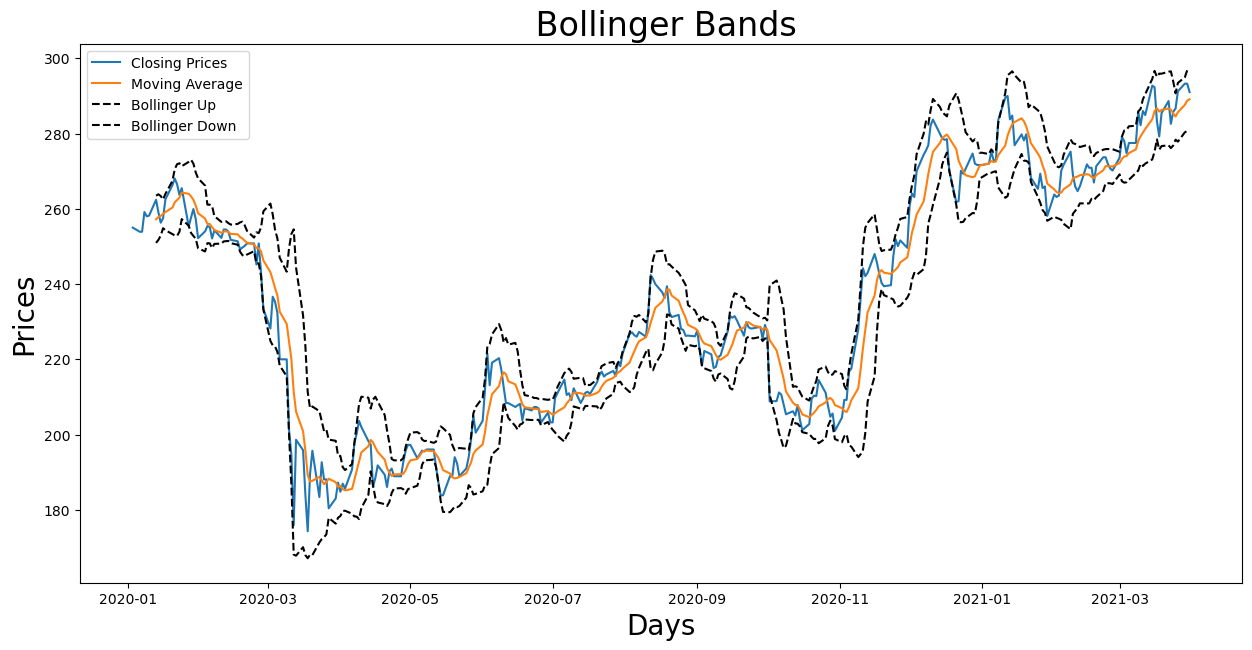

In [162]:
# Plotting the results of the Bollinger Bands
plt.title(' Bollinger Bands', size=24)
plt.xlabel('Days', size=20)
plt.ylabel('Prices', size=20)
plt.plot(sberbank_df['Price'], label='Closing Prices')
plt.plot(sberbank_df['sma_7'], label='Moving Average')
plt.plot(sberbank_df['upper_bb'], label='Bollinger Up', c='black', linestyle="--")
plt.plot(sberbank_df['lower_bb'], label='Bollinger Down', c='black', linestyle="--")
plt.legend()
plt.show()

In [163]:
# Implementing Bollinger Bands Trading Strategy

def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

# Applying the Bollinger Bands strategy function 
buy_price, sell_price, bb_signal = implement_bb_strategy(sberbank_df['Price'], sberbank_df['lower_bb'], 
                                                        sberbank_df['upper_bb'])

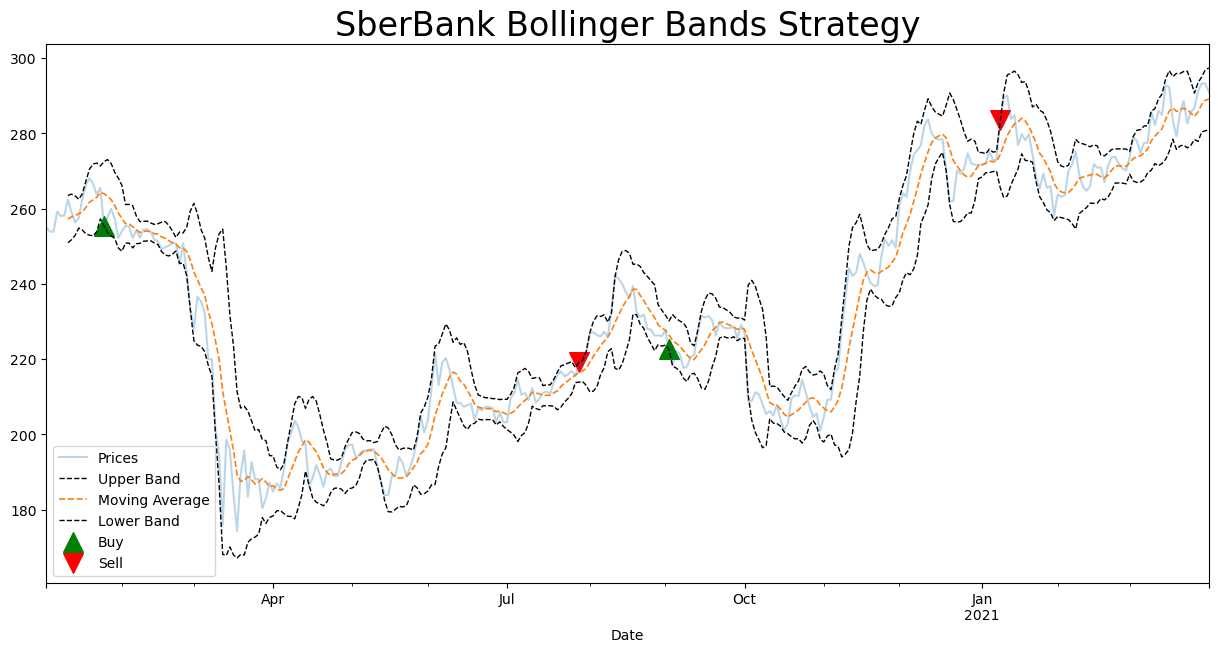

In [164]:
# Plotting the resuls for the Bollinger Bands strategy
sberbank_df['Price'].plot(label = 'Prices', alpha = 0.3)
sberbank_df['upper_bb'].plot(label = 'Upper Band', linestyle = '--', linewidth = 1, color = 'black')
sberbank_df['sma_7'].plot(label = 'Moving Average', linestyle = '--', linewidth = 1.2)
sberbank_df['lower_bb'].plot(label = 'Lower Band', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(sberbank_df.index, buy_price, marker = '^', color = 'green', label = 'Buy', s = 200)
plt.scatter(sberbank_df.index, sell_price, marker = 'v', color = 'red', label = 'Sell', s = 200)
plt.title('SberBank Bollinger Bands Strategy', size=24)
plt.legend()
plt.show()

In [165]:
# Creating a function that calculates the return using the Bollinger Bands
def calculate_return(buy_price, sell_price, y_test):
    i = 0
    result =0
    bp = None
    initial = None
    while i < len(buy_price) and math.isnan(buy_price[i]):
        i+=1
    if i < len(buy_price) and buy_price[i]>0:
        initial = buy_price[i]
    while i < len(buy_price):
        if buy_price[i]>0:
            bp = buy_price[i]
        elif sell_price[i]>0:
            if bp:
                result += (sell_price[i]-bp)
                bp = None
        i+=1
    if initial:
        result = (result/initial)*100
    do_nothing = (y_test[-1]/y_test[0] -1)*100
    print(f'Return using Bollinger Band Strategy is {round(result,2)}%.\nReturn from do nothing strategy is {round(do_nothing,2)}%')

In [171]:
# Applying the function to the data
calculate_return(buy_price, sell_price, sberbank_df['sma_7'])

Return using Bollinger Band Strategy is 9.76%.
Return from do nothing strategy is nan%


In [436]:
# Applying the function to the data
calculate_return(buy_price, sell_price, sberbank_forecast)

Return using Bollinger Band Strategy is -23.61%.
Return from do nothing strategy is 0.98%


In [454]:
# Applying the function to the data
calculate_return(buy_price, sell_price, LSTM_prediction_before.ravel())

Return using Bollinger Band Strategy is -23.61%.
Return from do nothing strategy is 6.27%


## KOC Holding (KCHOL)

Koç Holding A.Ş. is the largest industrial conglomerate in Turkey, and the only company in the country to be listed on the Fortune Global 500 as of 2016.[5] The company, headquartered in Nakkaştepe, Istanbul, is controlled by the Koç family, one of Turkey's wealthiest families.[6]

The company was formed in 1963 when founder Vehbi Koç, who established his first firm in 1926, combined all of the companies bearing his name into Koç Holding.

In [115]:
# creating a KOC Holding DataFrame 
koc_df = excelfile.parse(sheet_name=1, index_col=0, parse_dates=['Date'])

In [116]:
# viewing first 5 observations
koc_df.head()

Price   Open   High    Low    Vol.  Change %
Date                                                             
2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

In [117]:
# viewing last 5 observations
koc_df.tail()

Price               Open            High  \
Date                                                                    
2020-01-07 00:00:00          19.93              20.22           20.28   
2020-01-06 00:00:00          20.08              20.34           20.34   
2020-01-03 00:00:00           20.3               20.3           20.44   
2020-01-02 00:00:00          20.38              20.42           20.44   
Highest: 25.48       Lowest: 12.38  Difference: 13.10  Average: 17.86   

                                 Low   Vol.  Change %  
Date                                                   
2020-01-07 00:00:00            19.92  2.89M   -0.0075  
2020-01-06 00:00:00            19.97  1.94M   -0.0108  
2020-01-03 00:00:00            19.97  3.31M   -0.0039  
2020-01-02 00:00:00            20.24  2.53M    0.0030  
Highest: 25.48       Change %: -4.48    NaN       NaN

In [118]:
# Dropping the last row
koc_df = koc_df.iloc[:-1]
koc_df.tail()

Price   Open   High    Low   Vol.  Change %
Date                                                            
2020-01-08 00:00:00  19.94  19.89  19.95  19.66  2.79M    0.0005
2020-01-07 00:00:00  19.93  20.22  20.28  19.92  2.89M   -0.0075
2020-01-06 00:00:00  20.08  20.34  20.34  19.97  1.94M   -0.0108
2020-01-03 00:00:00   20.3   20.3  20.44  19.97  3.31M   -0.0039
2020-01-02 00:00:00  20.38  20.42  20.44  20.24  2.53M    0.0030

In [119]:
# information about data
koc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 2021-03-31 00:00:00 to 2020-01-02 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     315 non-null    object 
 1   Open      315 non-null    object 
 2   High      315 non-null    object 
 3   Low       315 non-null    object 
 4   Vol.      315 non-null    object 
 5   Change %  315 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


In [120]:
# Removing letter "M" from Vol. variable
koc_df['Vol.'] = koc_df['Vol.'].str.replace('M','')

In [121]:
# Viewing first 5 observations
koc_df.head()

Price   Open   High    Low   Vol.  Change %
Date                                                            
2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14   -0.0046
2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05    0.0209
2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56   -0.0078
2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35   -0.0385
2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93   -0.0148

In [122]:
# Renaming column from Vol. to Volume
koc_df.rename(columns={'Vol.':'Volume'}, inplace=True)

# Checking columnn names
koc_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [123]:
# Parsing the index to a datetimeindex
koc_df.index = pd.to_datetime(koc_df.index, format="%Y-%m-%d")

# Sorting the date in an ascending format
koc_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
koc_df.head()

Price   Open   High    Low Volume  Change %
Date                                                   
2020-01-02  20.38  20.42  20.44  20.24   2.53    0.0030
2020-01-03   20.3   20.3  20.44  19.97   3.31   -0.0039
2020-01-06  20.08  20.34  20.34  19.97   1.94   -0.0108
2020-01-07  19.93  20.22  20.28  19.92   2.89   -0.0075
2020-01-08  19.94  19.89  19.95  19.66   2.79    0.0005

In [124]:
# Changing the data types of the variables in the dataset
sberbank_df = sberbank_df.astype(float)

# Checking the dtypes
sberbank_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
sma_20      float64
upper_bb    float64
lower_bb    float64
dtype: object

## Statistical Analysis of KOC Holdings

### Plotting Time Series

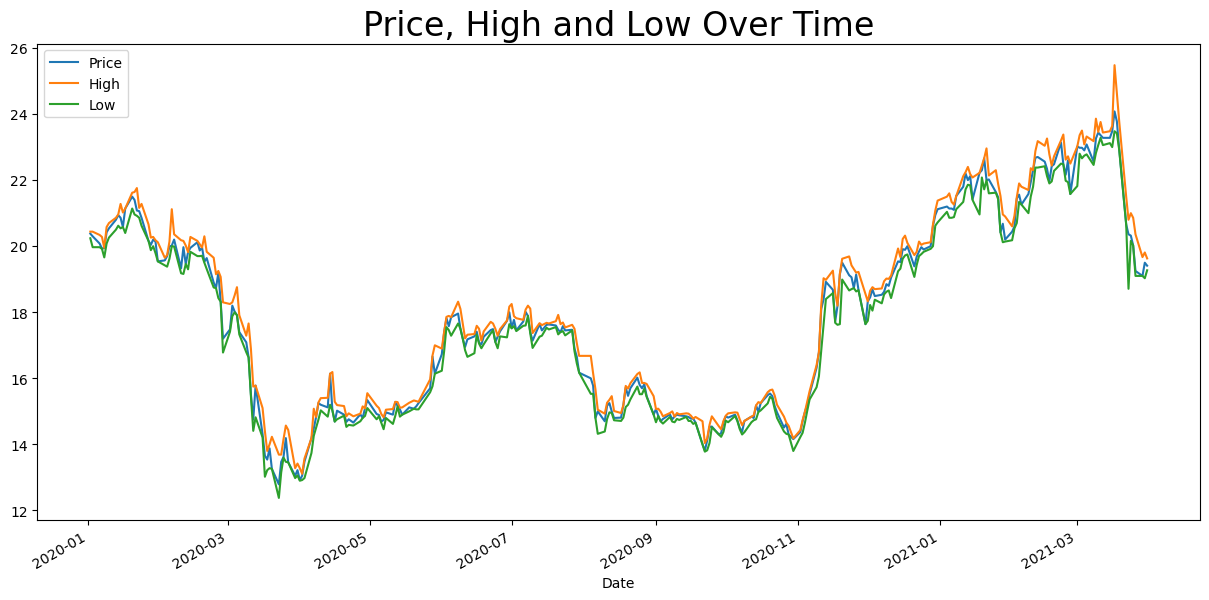

In [125]:
# Line plot of rthe Price, High and Low variables in koc
koc_df[['Price','High','Low']].plot()
plt.title("Price, High and Low Over Time", size=24)
plt.show()

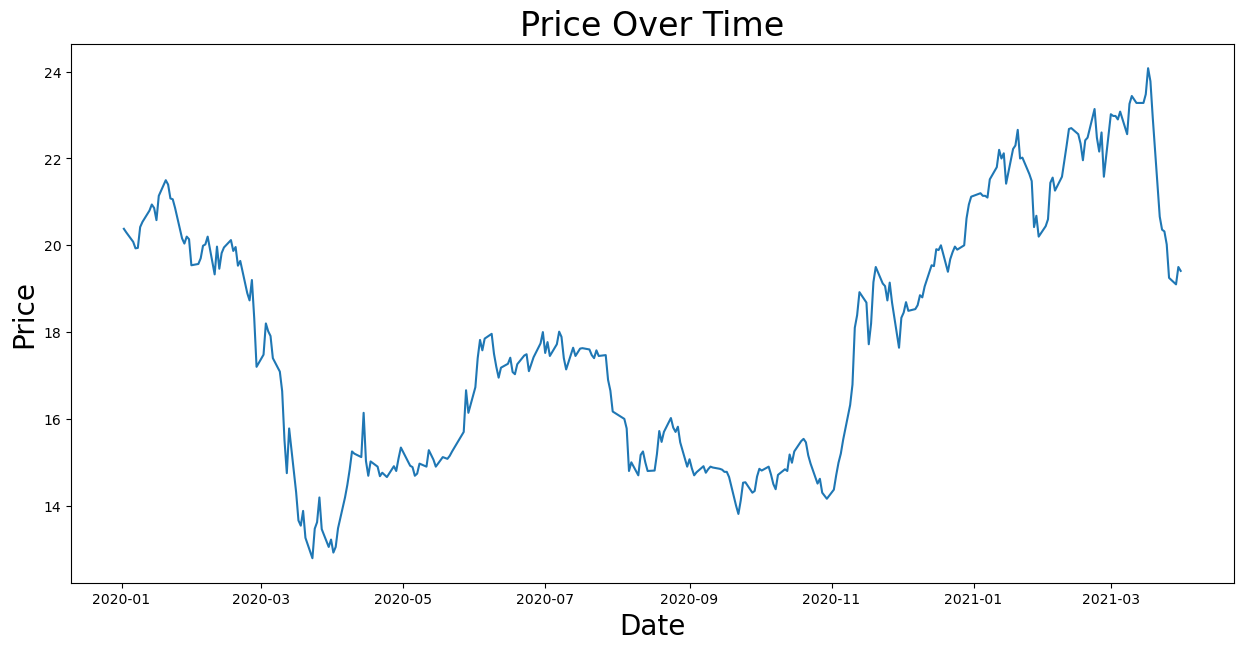

In [126]:
# Line plot of the Price variable
plt.plot(koc_df.index, koc_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

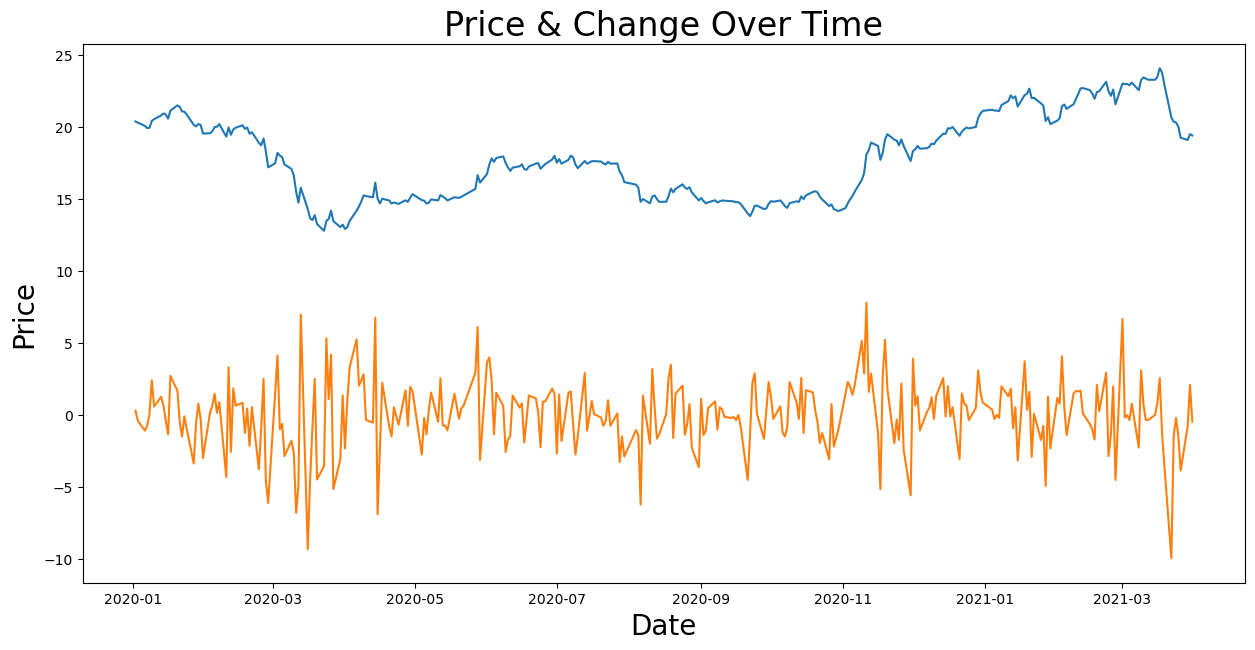

In [127]:
# Line plot of the Price and Change % variables
plt.plot(koc_df.index, koc_df['Price'], label='Price')
plt.plot(koc_df.index, koc_df['Change %'] * 100, label="Change ")
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price & Change Over Time", size=24)
plt.show()

### Time Series Decomposition

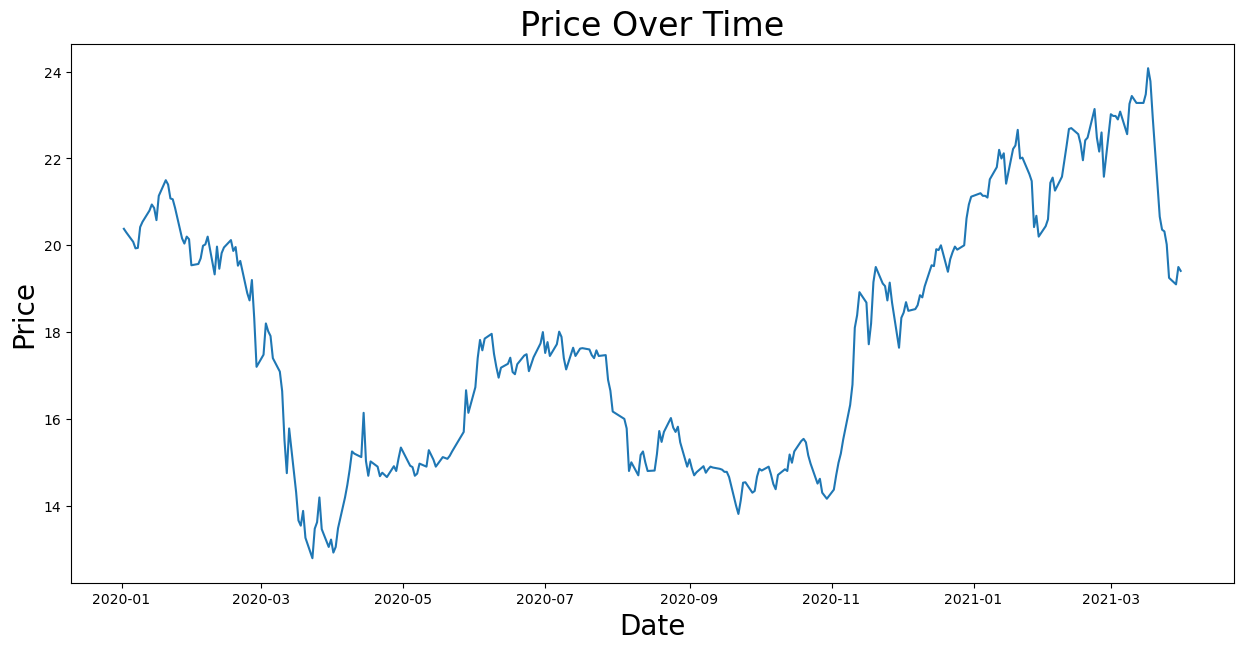

In [128]:
# importing libraries
from statsmodels.tsa.seasonal import seasonal_decompose

# Line Plot to choose addtive or multiplicative model
plt.plot(koc_df.index, koc_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

In [129]:
# Setting the time series frequency
koc_df = koc_df.asfreq('b', method='ffill')

# Checking the time series frequency
print(koc_df.index.freq)

<BusinessDay>


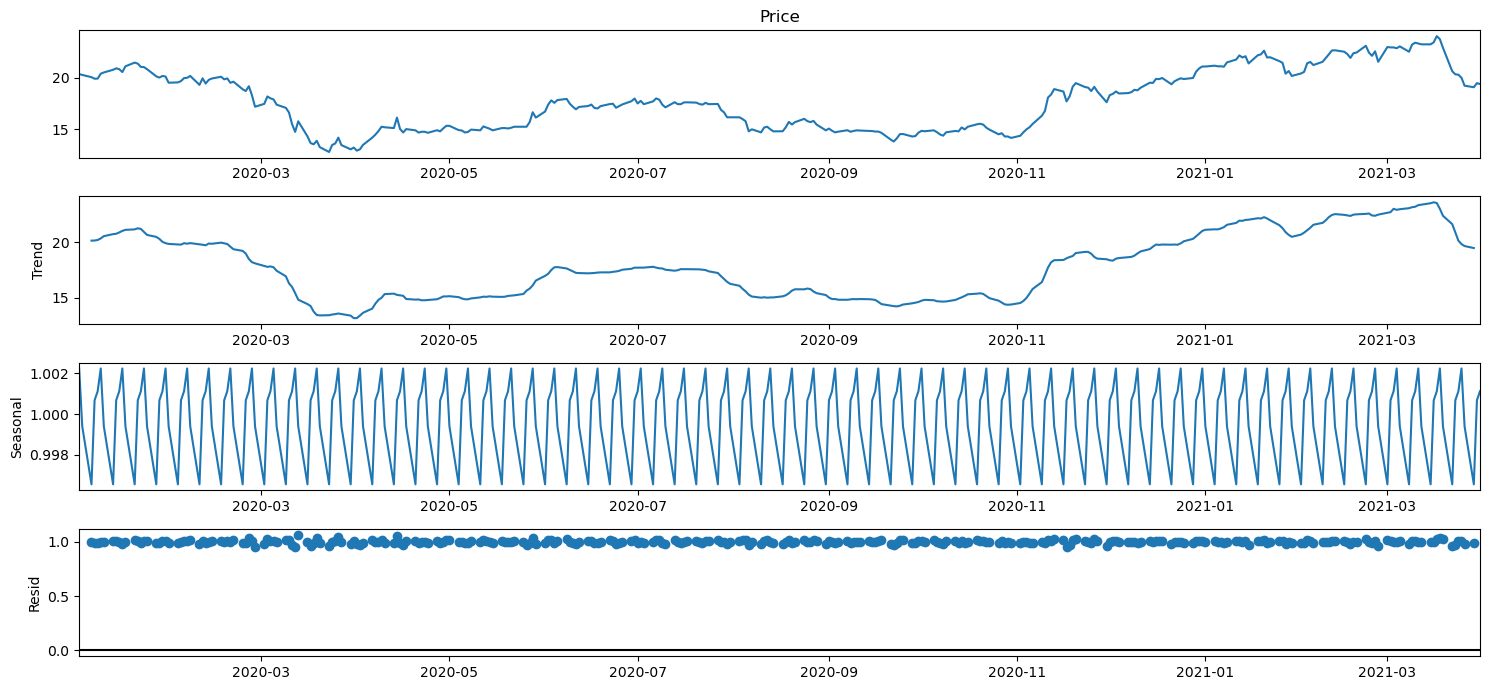

In [131]:
# Applying a multiplicative seasonal decomposition
koc_df_decomposed = seasonal_decompose(koc_df['Price'], model='multiplicative')

# Plotting the trend, seasonal and residual
koc_df_decomposed.plot()
plt.show()

### Time Series Stationarity

In [132]:
# Applying check stationarity function
check_stationarity(koc_df['Price'])

KPSS test: Non-Stationary , Number of lags: 11 
ADF test: Non-Stationarity , Number of lags: 0


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Train Test Split


In [133]:
# Train split
koc_train = koc_df.loc['2020']

# Test split
koc_test = koc_df.loc['2021']

# Number of training and testing samples
print(f"The number of training data points: {len(koc_train)}")
print(f"The number of testing data points: {len(koc_test)}")

The number of training data points: 261
The number of testing data points: 64


### Auto Arima

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=254.788, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=256.052, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=257.732, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=259.055, Time=0.04 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=253.753, Time=0.04 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=255.566, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=256.110, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=257.794, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=258.529, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=256.717, Time=0.09 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=255.294, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=257.746, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=259.612, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept

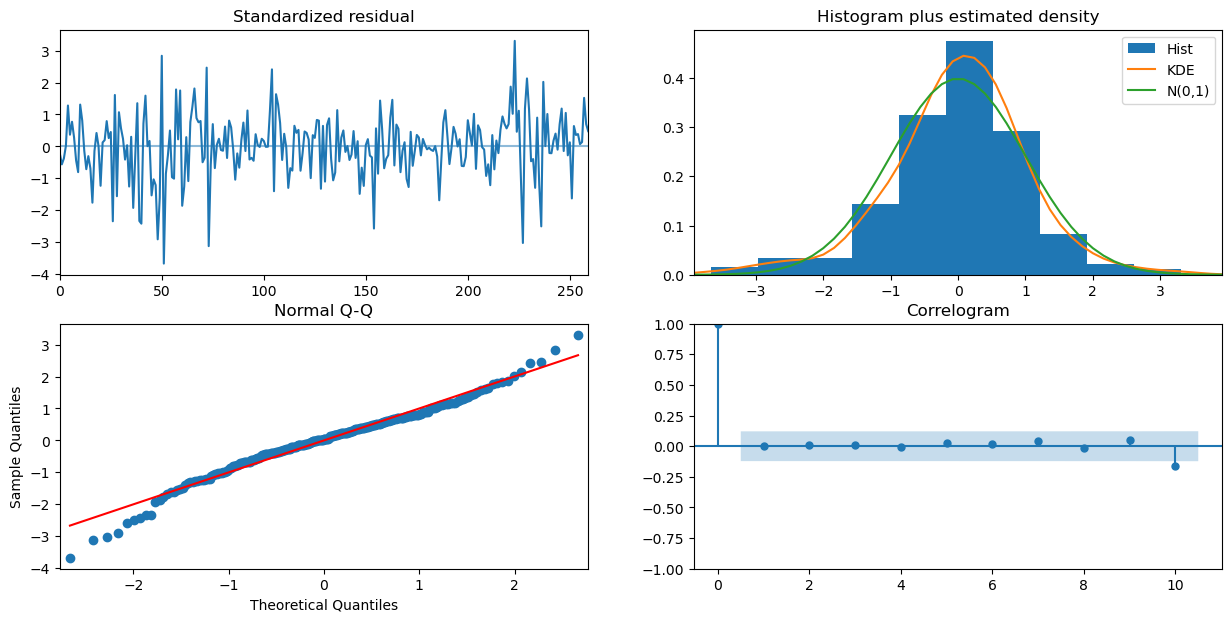

In [134]:
# Applying auto ARIMA 
koc_auto_model = auto_arima(koc_train['Price'], test='adf', stepwise=False, trace=True)

# Model summary
print(koc_auto_model.summary())

# Diagnsotic plots 
koc_auto_model.plot_diagnostics()
plt.show()

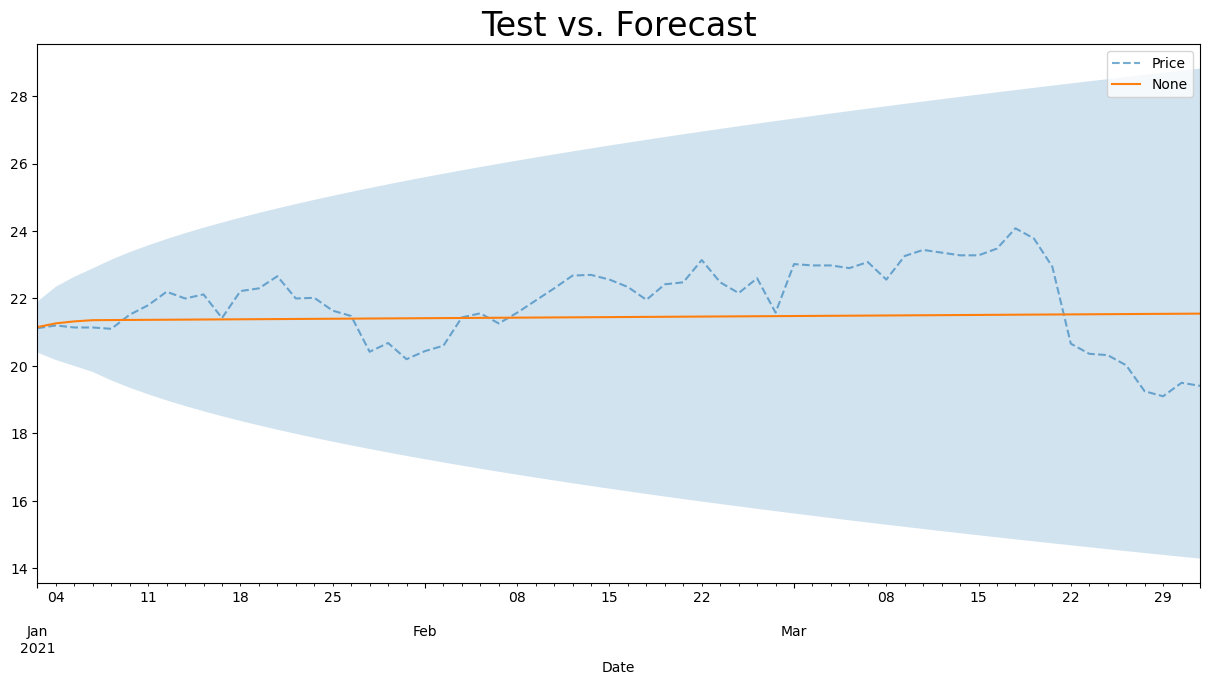

In [136]:
# Statistical model predictions and confidence interval
koc_forecast, koc_conf_intervals = koc_auto_model.predict(n_periods=len(koc_test), return_conf_int=True)

# Storing upper and lower confidence intervals
lower_ci, upper_ci = zip(*koc_conf_intervals)

# Prediction with confidence interval plot
ax = koc_test['Price'].plot(style='--', alpha=0.6)
pd.Series(koc_forecast, index=koc_test.index).plot(style='-', ax=ax)
plt.fill_between(koc_test.index, lower_ci, upper_ci, alpha=0.2)
plt.title("Test vs. Forecast", size=24)
plt.legend()
plt.show()

### Model Evaluation

In [137]:
mse = mean_squared_error(koc_test['Price'], koc_forecast)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(koc_test['Price'], koc_forecast)
print('Mean Aboslute Error:', mae)
rmse = math.sqrt(mean_squared_error(koc_test['Price'], koc_forecast))
print("Root Mean Squared Error", rmse)
mape = mean_absolute_percentage_error(koc_test['Price'], koc_forecast)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 1.5163837910860989
Mean Aboslute Error: 1.029416638582758
Root Mean Squared Error 1.2314153609104033
Mean Absolute Percentage Error: 0.046971207597542225


### Bollinger Bands

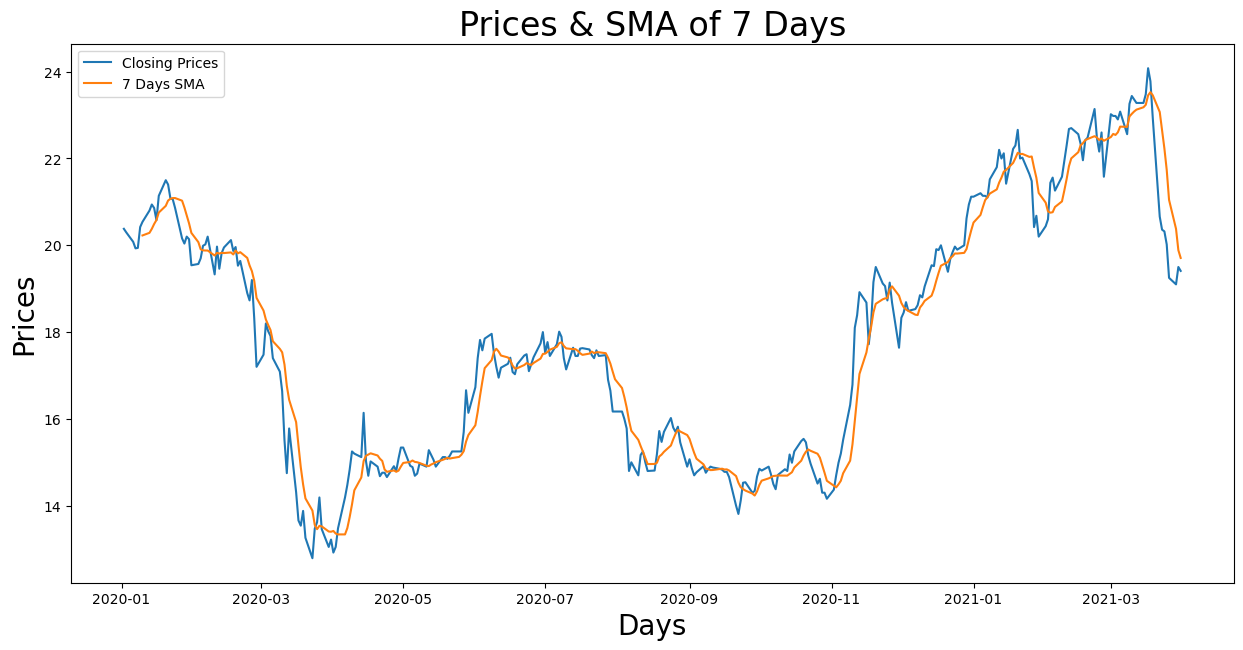

In [182]:
# Line plot showing the prices and the simple moving average of 20 days
sma = get_sma(koc_df['Price'], 7)
koc_df['sma_7'] = sma
# Plotting the data
plt.title('Prices & SMA of 7 Days', size=24)
plt.xlabel("Days", size=20)
plt.ylabel("Prices", size=20)
plt.plot(koc_df['Price'], label='Closing Prices')
plt.plot(sma, label='7 Days SMA')
plt.legend()
plt.show()

In [173]:
# Applying the upper and lower bollinger bands to the forecast
koc_df['upper_bb'], koc_df['lower_bb'] = bb(koc_df['Price'], sma, 7)

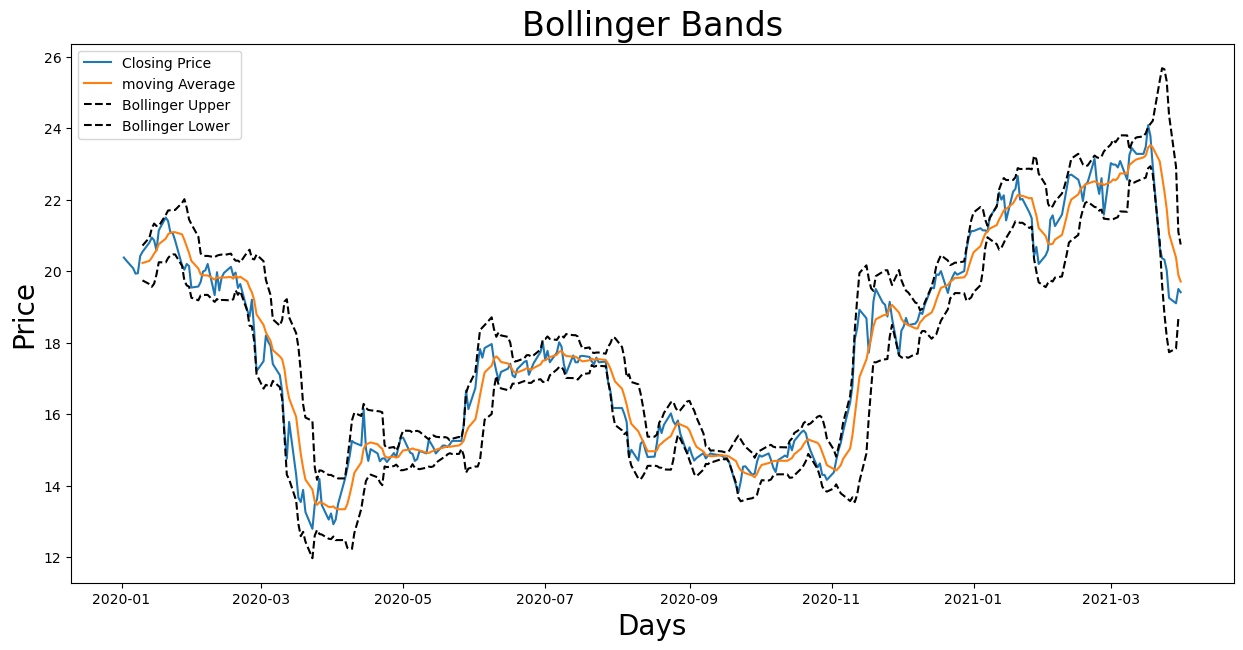

In [174]:
# Plotting the results of the Bollinger Bands
plt.plot(koc_df['Price'], label='Closing Price')
plt.plot(koc_df['sma_7'], label='moving Average')
plt.plot(koc_df['upper_bb'], label="Bollinger Upper", c='black', linestyle='--')
plt.plot(koc_df['lower_bb'], label="Bollinger Lower", c='black', linestyle='--')
plt.title("Bollinger Bands", size=24)
plt.xlabel("Days", size=20)
plt.ylabel("Price", size=20)
plt.legend()
plt.show()

In [175]:
# Applying trhe Bollinger Bands Strategy function
buy_price, sell_price, bb_signal = implement_bb_strategy(koc_df['Price'], koc_df['lower_bb'], 
                                                        koc_df['upper_bb'])

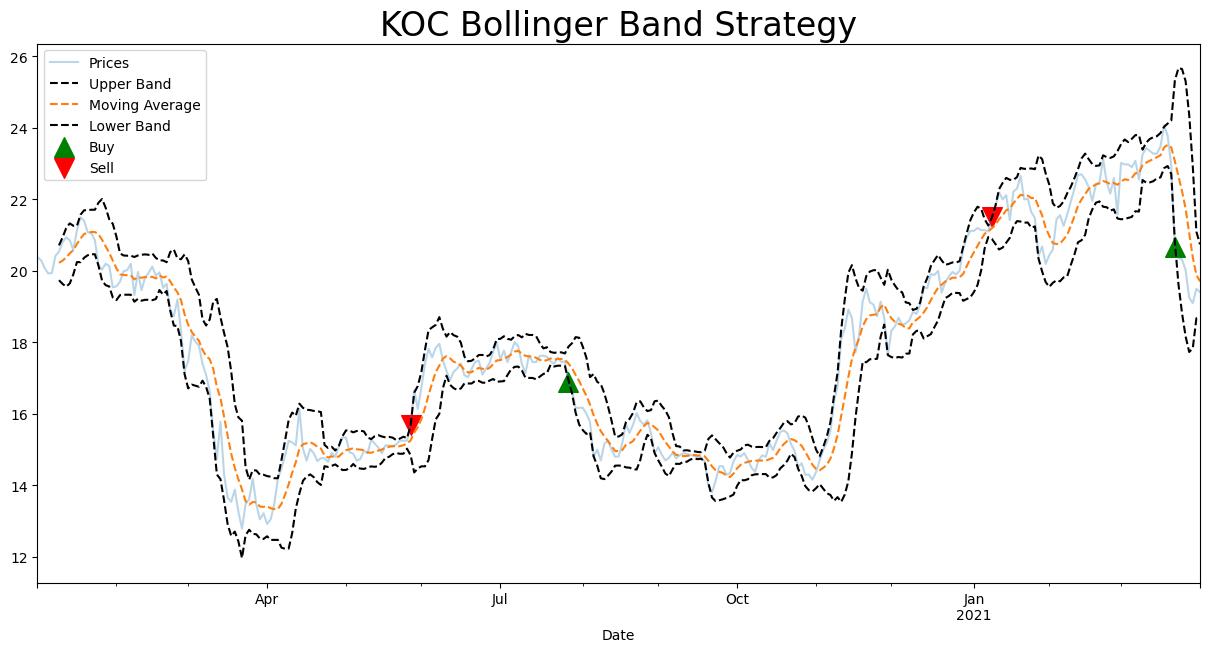

In [179]:
# Plotting the results of the Bollinger Bands Strategy
koc_df['Price'].plot(label="Prices", alpha=0.3)
koc_df['upper_bb'].plot(label='Upper Band', linestyle='--', c='black')
sma.plot(label='Moving Average', linestyle='--')
koc_df['lower_bb'].plot(label='Lower Band', linestyle='--', c='black')
plt.scatter(koc_df.index, buy_price, marker='^', c='green', label='Buy', s=200)
plt.scatter(koc_df.index, sell_price, marker='v', c='red', label='Sell', s=200)
plt.title("KOC Bollinger Band Strategy", size=24)
plt.legend()
plt.show()

In [180]:
# Applying the calculate return function
calculate_return(buy_price, sell_price, sma)

Return using Bollinger Band Strategy is 27.34%.
Return from do nothing strategy is nan%


In [181]:
# Applying the calculate return function
calculate_return(buy_price, sell_price, koc_forecast)

Return using Bollinger Band Strategy is 27.34%.
Return from do nothing strategy is 1.88%


## Madinet Nasr Housing

Founded in 1959 as a public real estate company, Madinet Nasr for Housing & Development (MNHD) is a leading real estate development company in Egypt and has been publicly traded on the Egyptian stock exchange since 1995. Initially MNHD was established with the primary objective of developing 40ml sqm of land in Nasr City as well as other nearby areas on the outskirts of Cairo. Since then, with a capable team of over 450 professionals, MNHD has developed mega projects and infrastructures across Egypt, serving the needs of thousands of middle-income Egyptians.

In [183]:
# Creating a MNH DataFrame
mnh_df = excelfile.parse(sheet_name=2, index_col=0, parse_dates=['Date'])

In [184]:
# Viewing first 5 observations
mnh_df.head()

Price  Open  High   Low   Vol.  Change %
Date                                                        
2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054
2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081
2021-03-29 00:00:00   3.7  3.69  3.73  3.68  1.25M   -0.0027
2021-03-28 00:00:00  3.71  3.76  3.76  3.68  2.34M    0.0000
2021-03-25 00:00:00  3.71  3.62  3.78  3.59  2.50M    0.0137

In [185]:
# Viewing last 5 observations
mnh_df.tail()

Price              Open           High  \
Date                                                                 
2020-01-08 00:00:00          4.41              4.19           4.59   
2020-01-06 00:00:00          4.28              4.16           4.44   
2020-01-05 00:00:00          4.41               4.7            4.7   
2020-01-02 00:00:00          4.81              4.81           4.87   
Highest: 4.92        Lowest: 2.40  Difference: 2.52  Average: 3.55   

                                  Low     Vol.  Change %  
Date                                                      
2020-01-08 00:00:00              4.15    3.52M    0.0304  
2020-01-06 00:00:00              4.12    2.52M   -0.0295  
2020-01-05 00:00:00              4.33    3.76M   -0.0832  
2020-01-02 00:00:00              4.78  241.60K   -0.0021  
Highest: 4.92        Change %: -22.20      NaN       NaN

In [186]:
# Dropping the last row
mnh_df.dropna(inplace=True)

# Checking last 5 observations
mnh_df.tail()

Price  Open  High   Low     Vol.  Change %
Date                                                          
2020-01-09 00:00:00  4.62  4.55   4.7  4.55    2.09M    0.0476
2020-01-08 00:00:00  4.41  4.19  4.59  4.15    3.52M    0.0304
2020-01-06 00:00:00  4.28  4.16  4.44  4.12    2.52M   -0.0295
2020-01-05 00:00:00  4.41   4.7   4.7  4.33    3.76M   -0.0832
2020-01-02 00:00:00  4.81  4.81  4.87  4.78  241.60K   -0.0021

In [187]:
# Information about the DataFrame
mnh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2021-03-31 00:00:00 to 2020-01-02 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     305 non-null    object 
 1   Open      305 non-null    object 
 2   High      305 non-null    object 
 3   Low       305 non-null    object 
 4   Vol.      305 non-null    object 
 5   Change %  305 non-null    float64
dtypes: float64(1), object(5)
memory usage: 16.7+ KB


In [188]:
# Renaming Vol. column
mnh_df.rename(columns={'Vol.':'Volume'}, inplace=True)

# Checking column names
mnh_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [207]:
# Creating function to clean Volume variable
def clean_volume(data):
    if data[-1] == 'M':
        return float(data[:-1]) * 1000000
    elif data[-1] == 'K':
        return float(data[:-1]) * 1000
    else:
        return data

In [208]:
# Applying function
mnh_df['Volume'] = mnh_df['Volume'].apply(clean_volume)

In [209]:
# Parsing the index to a DateTimeIndex
mnh_df.index = pd.to_datetime(mnh_df.index, format="%Y-%m-%d")

# Sorting the date in ascending order
mnh_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
mnh_df.head()

Price  Open  High   Low     Volume  Change %
Date                                                   
2020-01-02  4.81  4.81  4.87  4.78   241600.0   -0.0021
2020-01-05  4.41   4.7   4.7  4.33  3760000.0   -0.0832
2020-01-06  4.28  4.16  4.44  4.12  2520000.0   -0.0295
2020-01-08  4.41  4.19  4.59  4.15  3520000.0    0.0304
2020-01-09  4.62  4.55   4.7  4.55  2090000.0    0.0476

In [210]:
# Changing the data types of the variables in the dataset
mnh_df = mnh_df.astype(float)

# Checking the dtypes
mnh_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

## Statistical Analysis of Madinet Nasr Housing

### Plotting Time Series

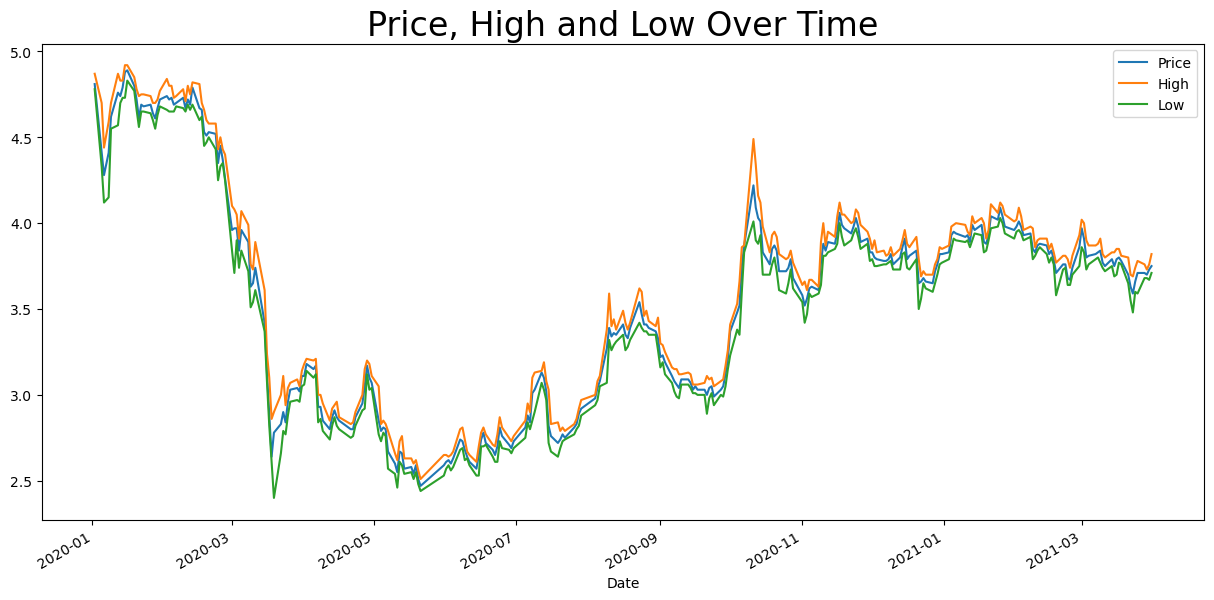

In [211]:
# Line plot of the price, high and low variables in mnh
mnh_df[['Price', 'High', 'Low']].plot()
plt.title("Price, High and Low Over Time", size=24)
plt.show()

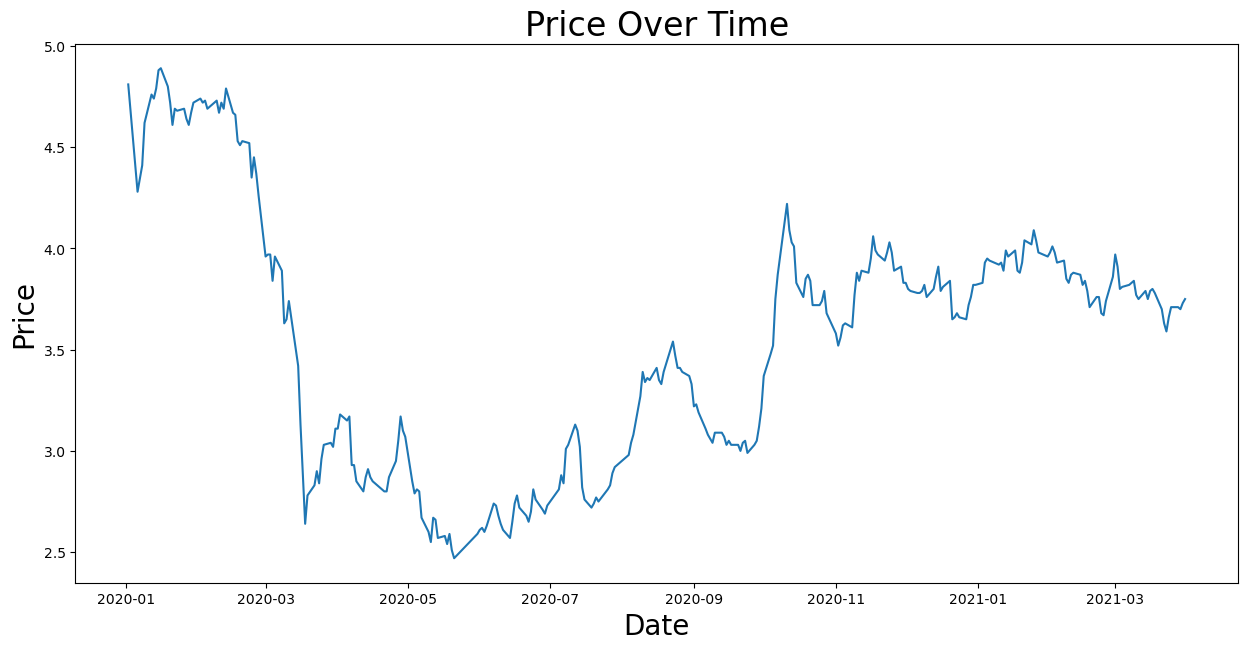

In [212]:
# Line plot of the price variable
plt.plot(mnh_df.index, mnh_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

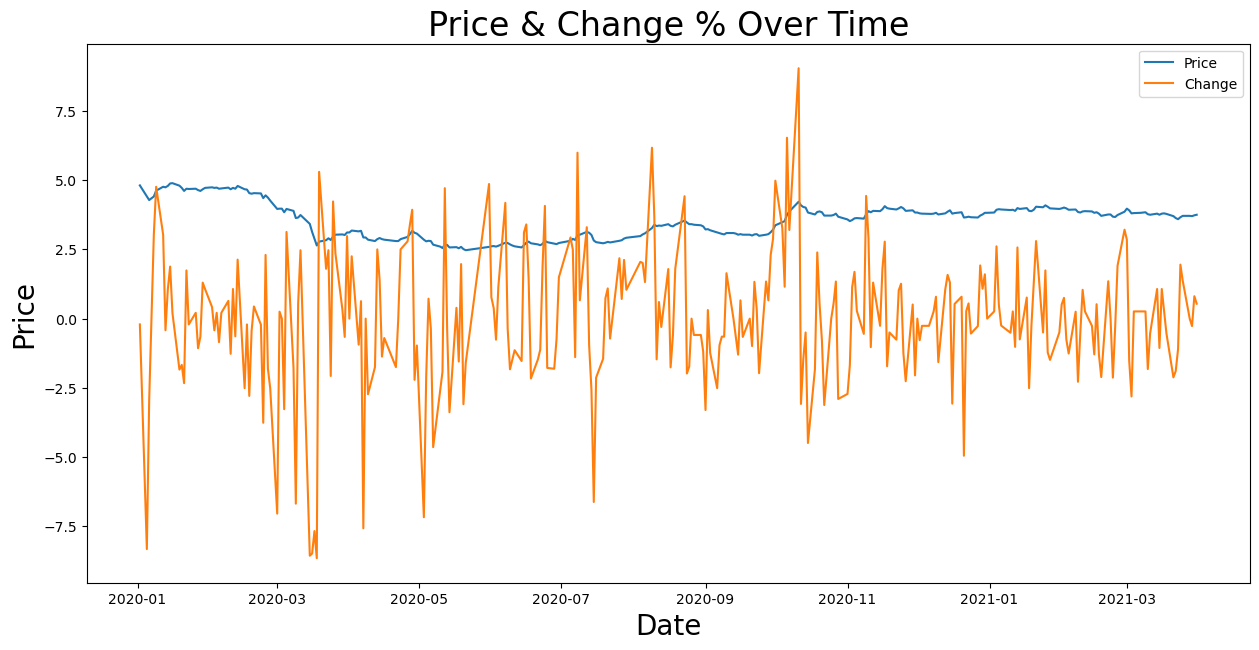

In [214]:
# Line plot of the Price and Change % variables
plt.plot(mnh_df.index, mnh_df['Price'], label='Price')
plt.plot(mnh_df.index, mnh_df['Change %'] * 100, label='Change')
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price & Change % Over Time", size=24)
plt.legend()
plt.show()

### Time Series Decomposition

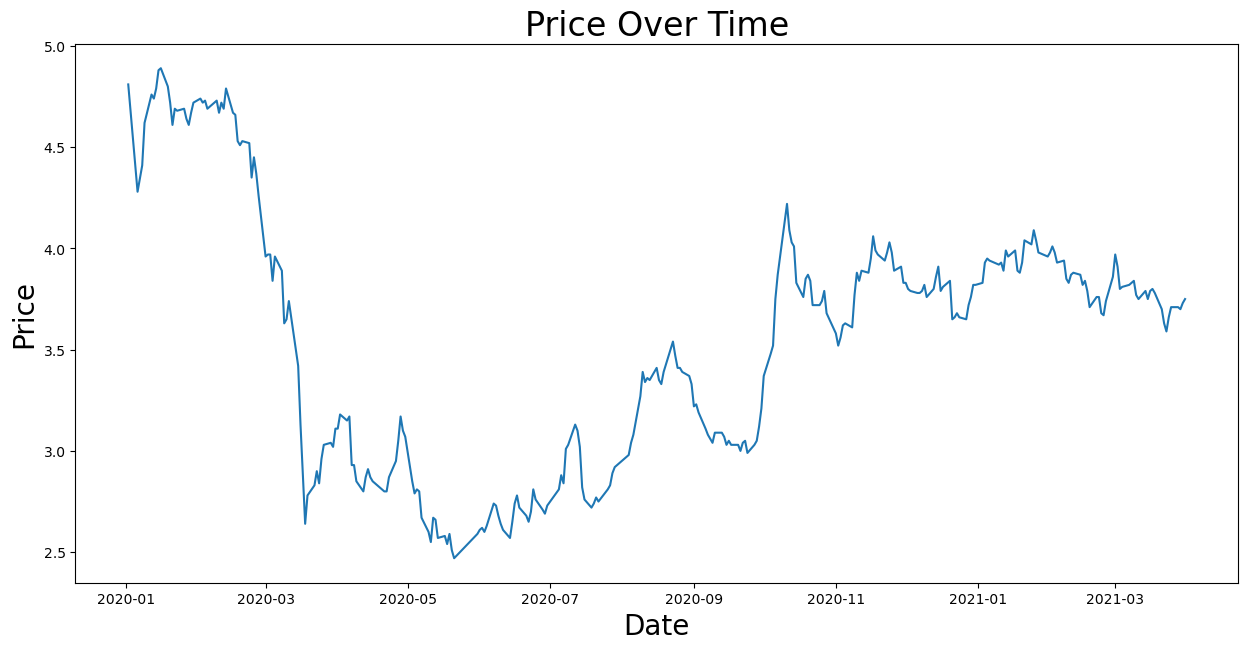

In [215]:
# importing library
from statsmodels.tsa.seasonal import seasonal_decompose

# Line plot to choose additive or multiplicative model
plt.plot(mnh_df.index, mnh_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

In [216]:
# Setting the time series frequency
mnh_df = mnh_df.asfreq('b', method='ffill')

# Checking the time series frequency
print(mnh_df.index.freq)

<BusinessDay>


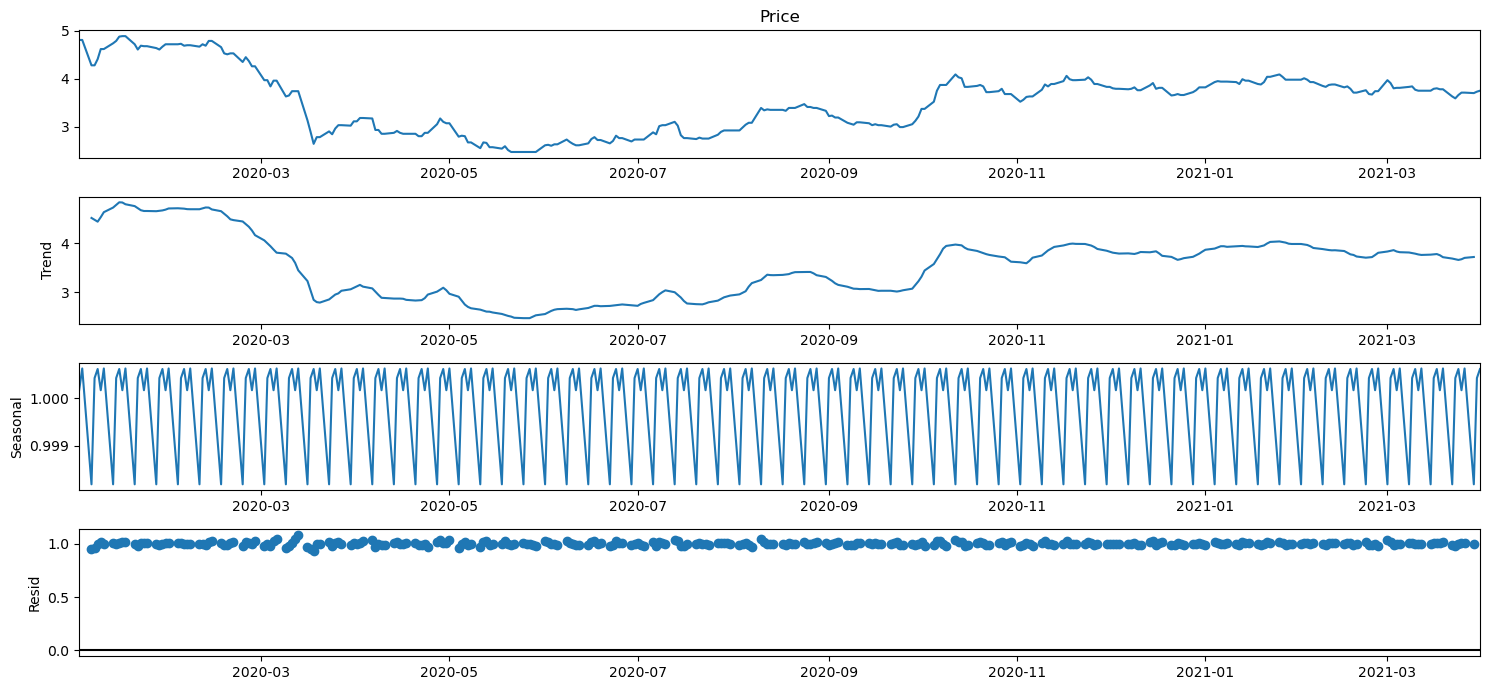

In [219]:
# Applying a multiplicative seasonal decomposition
mnh_df_decomposed = seasonal_decompose(mnh_df['Price'], model='multiplicative')

# Plotting the trend, seasonal and residuals
mnh_df_decomposed.plot()
plt.show()

### Time Series Stationarity

In [220]:
# Applying check stationarity function
check_stationarity(mnh_df['Price'])

KPSS test: Non-Stationary , Number of lags: 11 
ADF test: Non-Stationarity , Number of lags: 5


### Train Test Split

In [221]:
# Train split
mnh_train = mnh_df.loc['2020']

# Test split
mnh_test = mnh_df.loc['2021']

# Number of training and testing samples
print(f"Number of training data points: {len(mnh_train)}")
print(f"Number of testing data points: {len(mnh_test)}")

Number of training data points: 261
Number of testing data points: 64


### Auto ARIMA

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-641.636, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-642.856, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-642.453, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-641.478, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-639.775, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-639.743, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-643.210, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-641.583, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-640.912, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-639.535, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-638.270, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-641.970, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-640.442, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-647.134, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-645.157, Time=0.18 sec
 ARIMA(3,1

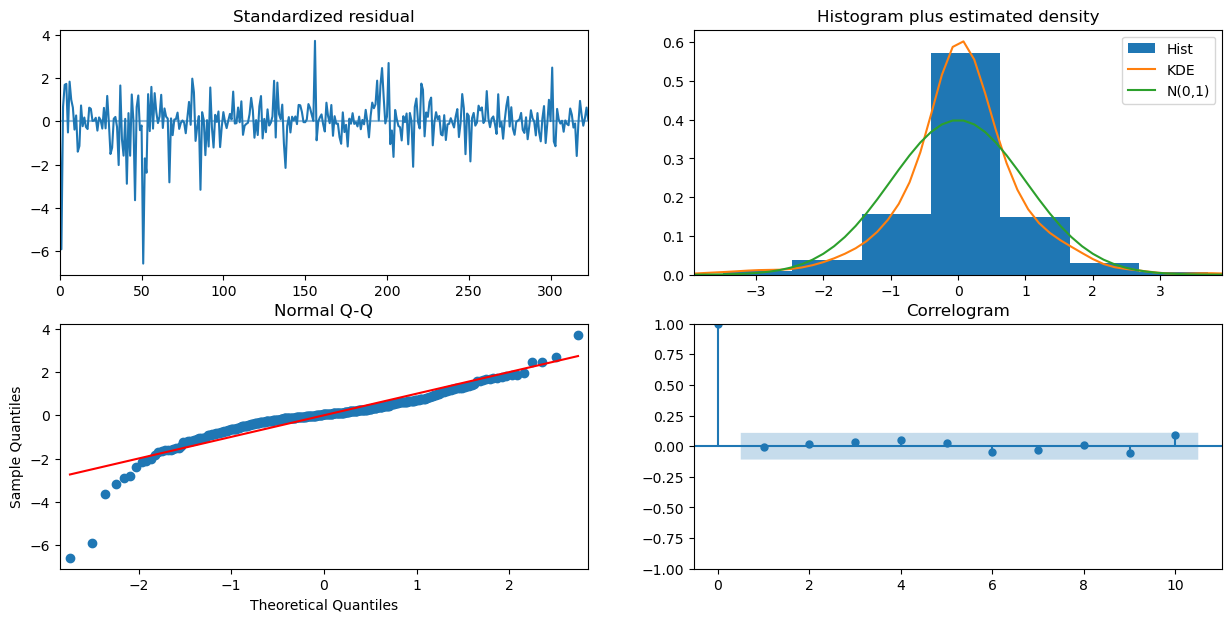

In [222]:
# Applying auto ARIMA
mnh_auto_model = auto_arima(mnh_df['Price'], test='adf', stepwise=False, trace=True)

# Model summary
print(mnh_auto_model.summary())

# Diagnostic plots
mnh_auto_model.plot_diagnostics()
plt.show()

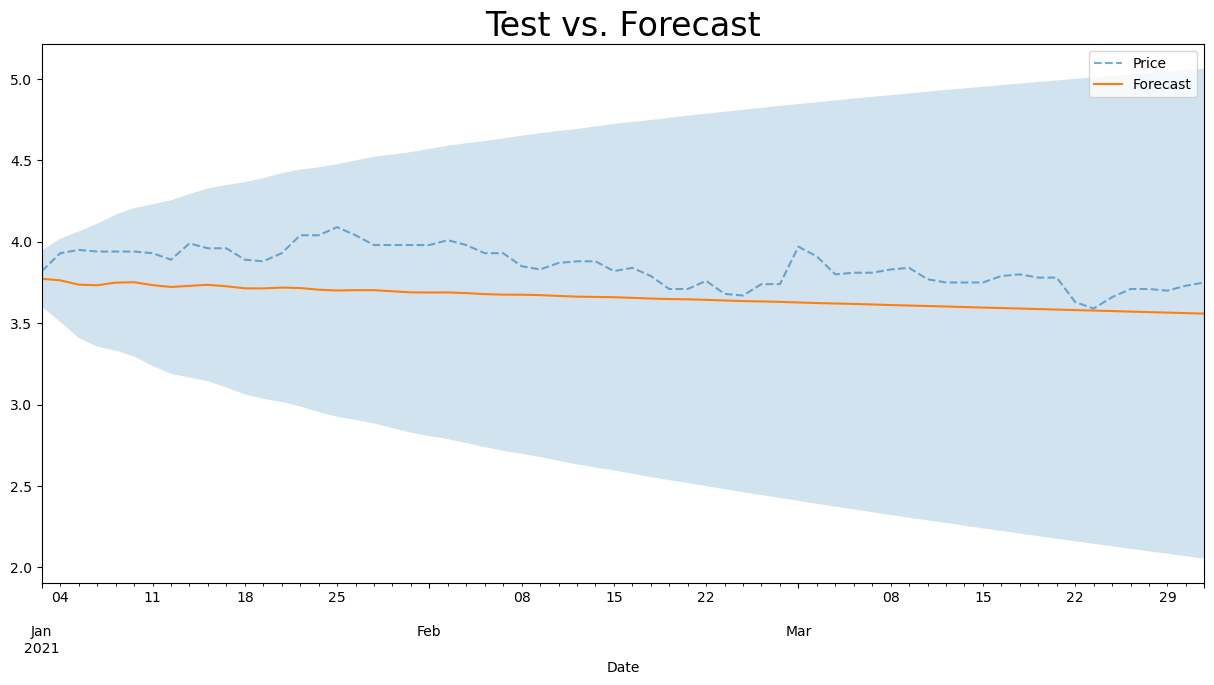

In [226]:
# Statistical model predictions and confidence intervals
mnh_forecast, mnh_conf_intervals = mnh_auto_model.predict(len(mnh_test), return_conf_int=True)

# Storing upper and lower confidence intervals
lower_ci, upper_ci = zip(*mnh_conf_intervals)

# Predictions with confidence intervals plot
ax = mnh_test['Price'].plot(style='--', alpha=0.6)
pd.Series(mnh_forecast, index=mnh_test.index).plot(style='-', ax=ax, label='Forecast')
plt.fill_between(mnh_test.index, lower_ci, upper_ci, alpha=0.2)
plt.title("Test vs. Forecast", size=24)
plt.legend()
plt.show()

### Model Evaluation

In [227]:
mse = mean_squared_error(mnh_test['Price'], mnh_forecast)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(mnh_test['Price'], mnh_forecast)
print("Mean Absolute Error:", mae)
rmse = math.sqrt(mean_squared_error(mnh_test['Price'], mnh_forecast))
print("Root Mean Squared Error:", rmse)
mape = mean_absolute_percentage_error(mnh_test['Price'], mnh_forecast)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 0.043297355176417224
Mean Absolute Error: 0.19162312700368733
Root Mean Squared Error: 0.20808016526429718
Mean Absolute Percentage Error: 0.04927760861801339


## Bollinger Bands

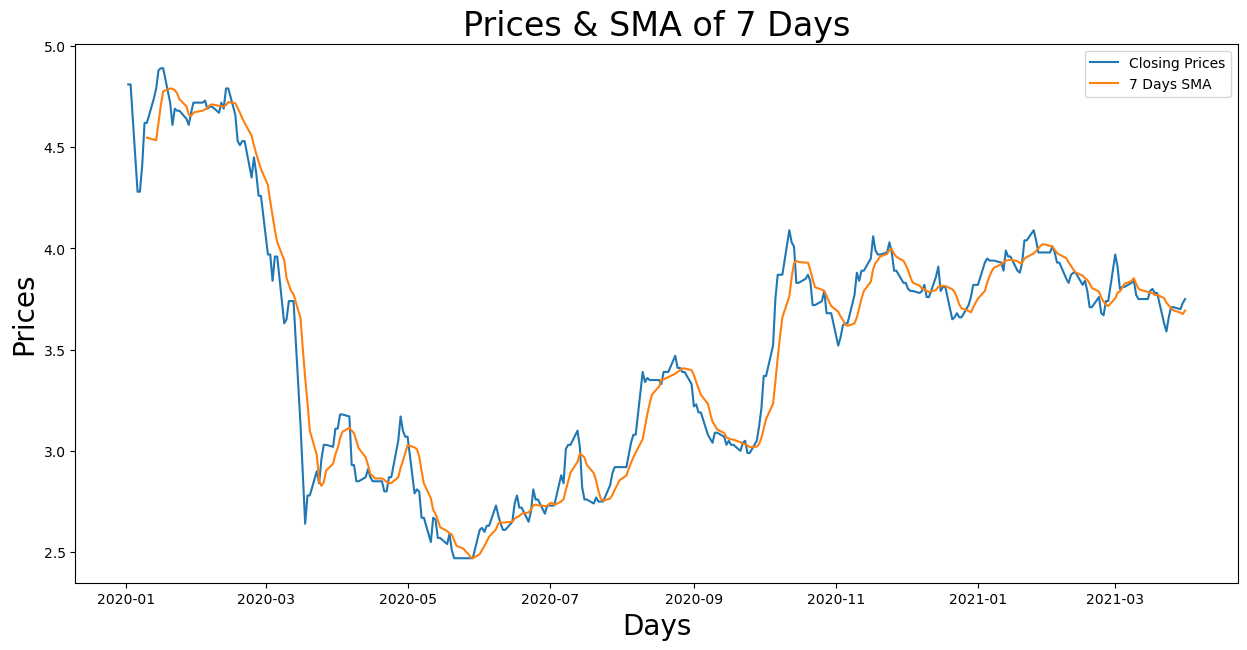

In [228]:
# Line plot showing the prices and the simple moving average
sma = get_sma(mnh_df['Price'], 7)
mnh_df['sma_7'] = sma

# Plotting the data
plt.plot(mnh_df['Price'], label='Closing Prices')
plt.plot(mnh_df['sma_7'], label='7 Days SMA')
plt.title("Prices & SMA of 7 Days", size=24)
plt.xlabel('Days', size=20)
plt.ylabel("Prices", size=20)
plt.legend()
plt.show()

In [229]:
# Applying the upper and lower bollinger bands to the sma
mnh_df['upper_bb'], mnh_df['lower_bb'] = bb(mnh_df['Price'], sma, 7)

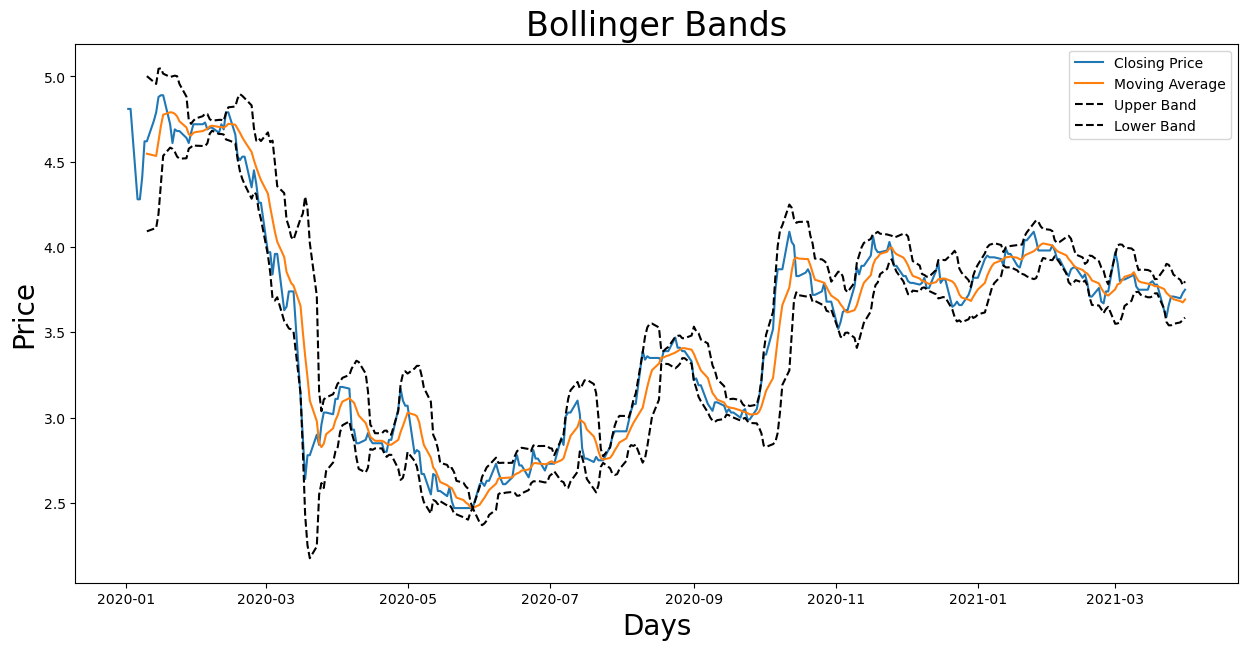

In [230]:
# Plotting the results of the Bollinger Bands
plt.plot(mnh_df['Price'], label='Closing Price')
plt.plot(mnh_df['sma_7'], label='Moving Average')
plt.plot(mnh_df['upper_bb'], label="Upper Band", c='black', linestyle='--')
plt.plot(mnh_df['lower_bb'], label="Lower Band", c='black', linestyle='--')
plt.title("Bollinger Bands", size=24)
plt.xlabel("Days", size=20)
plt.ylabel("Price", size=20)
plt.legend()
plt.show()

In [231]:
# Applying the Bollinger Bands Strategy function
buy_price, sell_price, bb_signal = implement_bb_strategy(mnh_df['Price'], mnh_df['lower_bb'], 
                                                        mnh_df['upper_bb'])

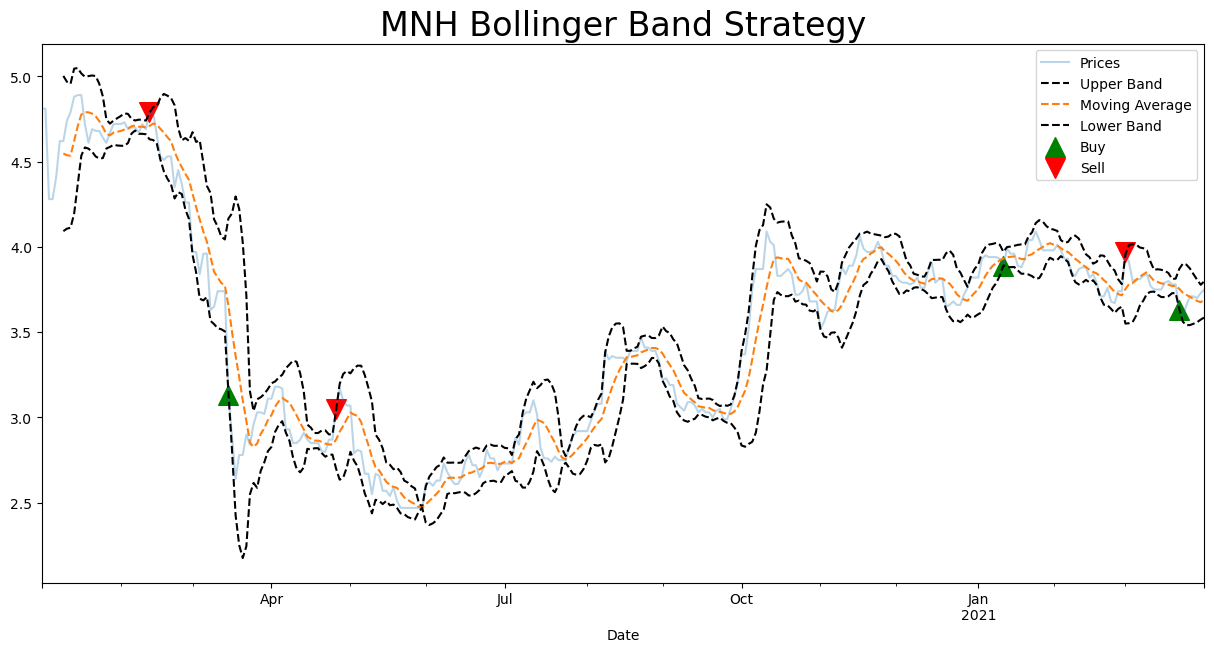

In [232]:
# Plotting the results of the Bollinger Bands Strategy
mnh_df['Price'].plot(label="Prices", alpha=0.3)
mnh_df['upper_bb'].plot(label='Upper Band', linestyle='--', c='black')
sma.plot(label='Moving Average', linestyle='--')
mnh_df['lower_bb'].plot(label='Lower Band', linestyle='--', c='black')
plt.scatter(mnh_df.index, buy_price, marker='^', c='green', label='Buy', s=200)
plt.scatter(mnh_df.index, sell_price, marker='v', c='red', label='Sell', s=200)
plt.title("MNH Bollinger Band Strategy", size=24)
plt.legend()
plt.show()

In [233]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, sma)

Return using Bollinger Band Strategy is 0.0%.
Return from do nothing strategy is nan%


In [235]:
# Applying the calculate return function 
calculate_return(buy_price, sell_price, mnh_forecast)

Return using Bollinger Band Strategy is 0.0%.
Return from do nothing strategy is -5.67%


## Minerva SA

Minerva SA (Minerva) is a manufacturer and marketer of beef and its by-products. The company processes meat, slaughters livestock, sells frozen, fresh and processed meat and exports live cattle. Minerva’s product portfolio comprises fresh beef, frozen beef, processed meat, poultry products and pork. It also offers poultry products and pork through its subsidiaries. The company markets products under Minerva Fine Foods brand name. Minerva operates slaughtering and deboning plants and distribution centers in Brazil, Paraguay, Argentina, Uruguay, Chile, and Colombia. The company has business presence in Australia, China, Chile, Egypt, Singapore, Hong Kong, New Zealand, Colombia, the US, Italy, Lebanon, Taiwan, the UAE, the UK and Russia. The company has industrial units in Argentina, Brazil, Colombia, Paraguay and Uruguay. Minerva is headquartered in Barretos, Sao Paulo, Brazil.

In [236]:
# Creating minerva sa dataframe
beef_df = excelfile.parse(sheet_name=3, index_col=0, parse_dates=['Date'])

In [237]:
# Viewing first 5 observations
beef_df.head()

Price   Open   High    Low    Vol.  Change %
Date                                                             
2021-03-31 00:00:00   10.2  10.35   10.4  10.12   7.77M   -0.0154
2021-03-30 00:00:00  10.36  10.41  10.62   10.3   9.93M   -0.0105
2021-03-29 00:00:00  10.47   9.85   10.5   9.81  22.04M    0.0651
2021-03-26 00:00:00   9.83    9.8   9.94    9.7   5.11M    0.0031
2021-03-25 00:00:00    9.8  10.01  10.01   9.66   8.88M   -0.0151

In [238]:
# Viewing last 5 observations
beef_df.tail()

Price              Open            High  \
Date                                                                  
2020-01-07 00:00:00         13.48             13.03           13.48   
2020-01-06 00:00:00         12.89              12.9           12.91   
2020-01-03 00:00:00          12.9             12.45           12.93   
2020-01-02 00:00:00         12.57             12.88           12.99   
Highest: 15.30       Lowest: 5.81  Difference: 9.49  Average: 11.38   

                                  Low   Vol.  Change %  
Date                                                    
2020-01-07 00:00:00             13.03  8.20M    0.0458  
2020-01-06 00:00:00             12.57  4.17M   -0.0008  
2020-01-03 00:00:00             12.27  4.88M    0.0263  
2020-01-02 00:00:00             12.57  5.78M   -0.0210  
Highest: 15.30       Change %: -20.56    NaN       NaN

In [239]:
# Dropping the last row
beef_df.dropna(inplace=True)

# Viewing last 5 observations
beef_df.tail()

Price   Open   High    Low   Vol.  Change %
Date                                                            
2020-01-08 00:00:00  13.63   13.5  13.68  13.18  6.18M    0.0111
2020-01-07 00:00:00  13.48  13.03  13.48  13.03  8.20M    0.0458
2020-01-06 00:00:00  12.89   12.9  12.91  12.57  4.17M   -0.0008
2020-01-03 00:00:00   12.9  12.45  12.93  12.27  4.88M    0.0263
2020-01-02 00:00:00  12.57  12.88  12.99  12.57  5.78M   -0.0210

In [240]:
# Information about data
beef_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 2021-03-31 00:00:00 to 2020-01-02 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     309 non-null    object 
 1   Open      309 non-null    object 
 2   High      309 non-null    object 
 3   Low       309 non-null    object 
 4   Vol.      309 non-null    object 
 5   Change %  309 non-null    float64
dtypes: float64(1), object(5)
memory usage: 16.9+ KB


In [242]:
# Removing letter "M" from Vol. variable
beef_df['Vol.'] = beef_df['Vol.'].str.replace("M", "")

In [243]:
# Viewing first 5 observations
beef_df.head()

Price   Open   High    Low   Vol.  Change %
Date                                                            
2021-03-31 00:00:00   10.2  10.35   10.4  10.12   7.77   -0.0154
2021-03-30 00:00:00  10.36  10.41  10.62   10.3   9.93   -0.0105
2021-03-29 00:00:00  10.47   9.85   10.5   9.81  22.04    0.0651
2021-03-26 00:00:00   9.83    9.8   9.94    9.7   5.11    0.0031
2021-03-25 00:00:00    9.8  10.01  10.01   9.66   8.88   -0.0151

In [244]:
# Renaming column from Vol. to Volume
beef_df.rename(columns={'Vol.':'Volume'}, inplace=True)

# Checking column names
beef_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [245]:
# Parsing the index format
beef_df.index = pd.to_datetime(beef_df.index, format="%Y-%m-%d")

# Sorting the date in an ascending order
beef_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
beef_df.head()

Price   Open   High    Low Volume  Change %
Date                                                   
2020-01-02  12.57  12.88  12.99  12.57   5.78   -0.0210
2020-01-03   12.9  12.45  12.93  12.27   4.88    0.0263
2020-01-06  12.89   12.9  12.91  12.57   4.17   -0.0008
2020-01-07  13.48  13.03  13.48  13.03   8.20    0.0458
2020-01-08  13.63   13.5  13.68  13.18   6.18    0.0111

In [246]:
# Changing the datat types of the variables in the dataset
beef_df = beef_df.astype(float)

# Checking the dtypes
beef_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

## Statistical Analysis of Minerva SA

### Plotting Time Series

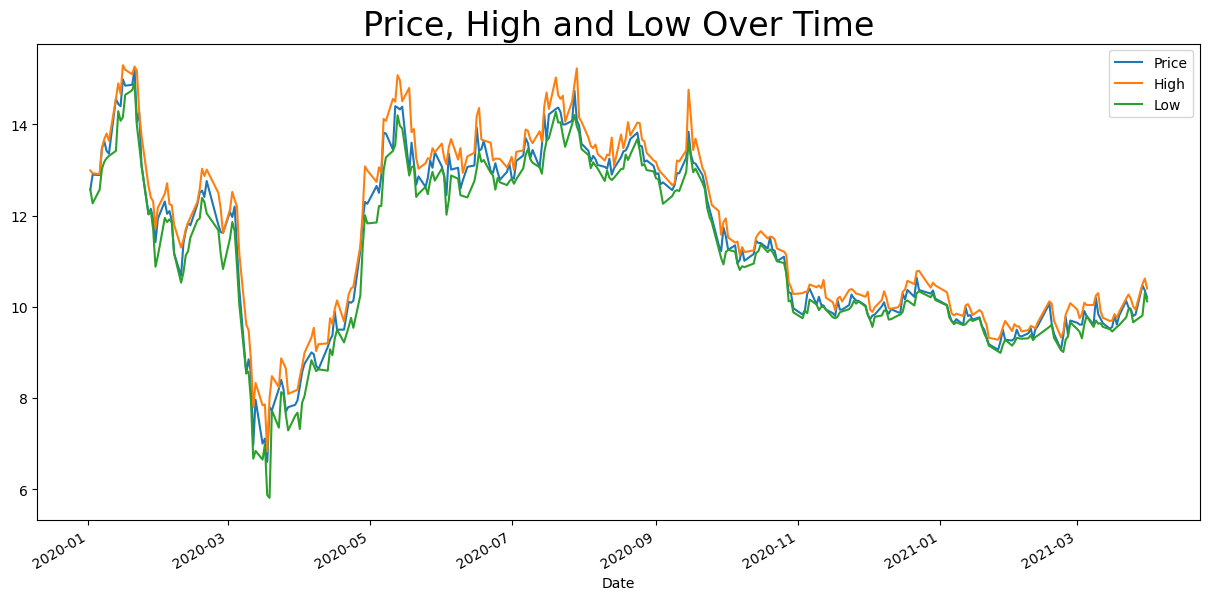

In [247]:
# Line plot of the Price, High and Low variables
beef_df[['Price','High','Low']].plot()
plt.title("Price, High and Low Over Time", size=24)
plt.show()

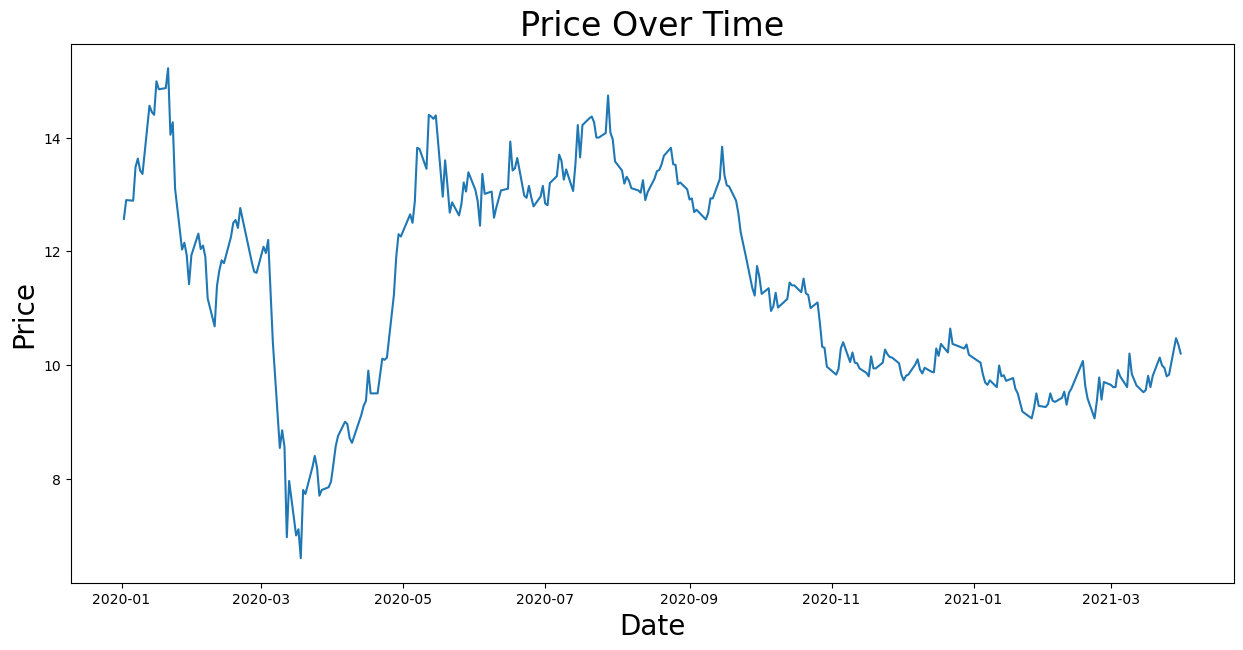

In [249]:
# Line plot of the Price variable
plt.plot(beef_df.index, beef_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

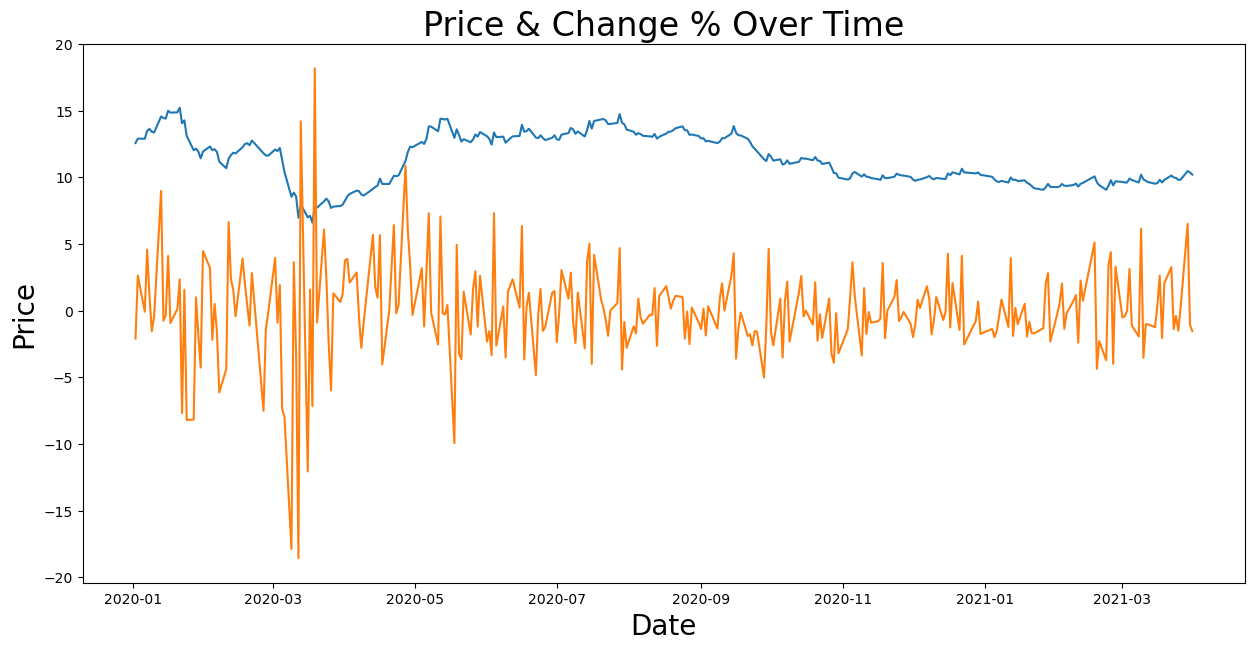

In [250]:
# Line plot of the Price and Change % variables
plt.plot(beef_df.index, beef_df['Price'], label='Price')
plt.plot(beef_df.index, beef_df['Change %']*100, label='Change %')
plt.xlabel('Date', size=20)
plt.ylabel("Price", size=20)
plt.title('Price & Change % Over Time', size=24)
plt.show()

### Time Series Decomposition

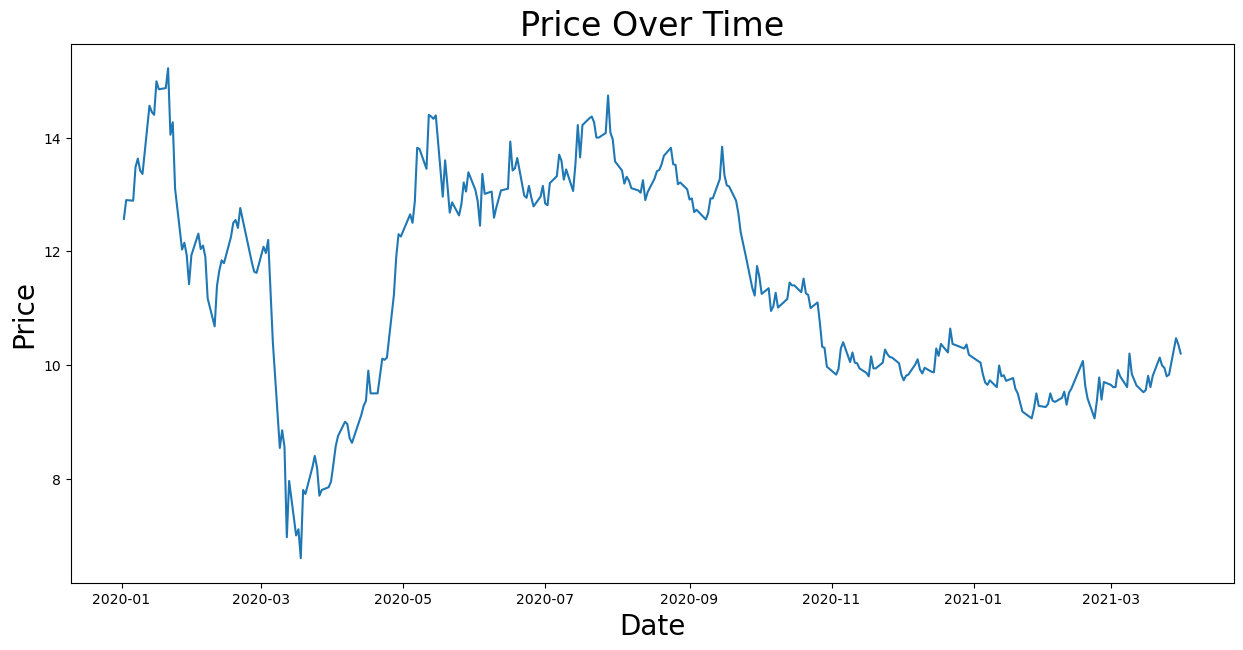

In [251]:
# importing library
from statsmodels.tsa.seasonal import seasonal_decompose

# Line plot to choose additive or multiplicative model
plt.plot(beef_df.index, beef_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

In [252]:
# Setting the time series frequency
beef_df = beef_df.asfreq('b', method='ffill')

# Checking the time series frequency
print(beef_df.index.freq)

<BusinessDay>


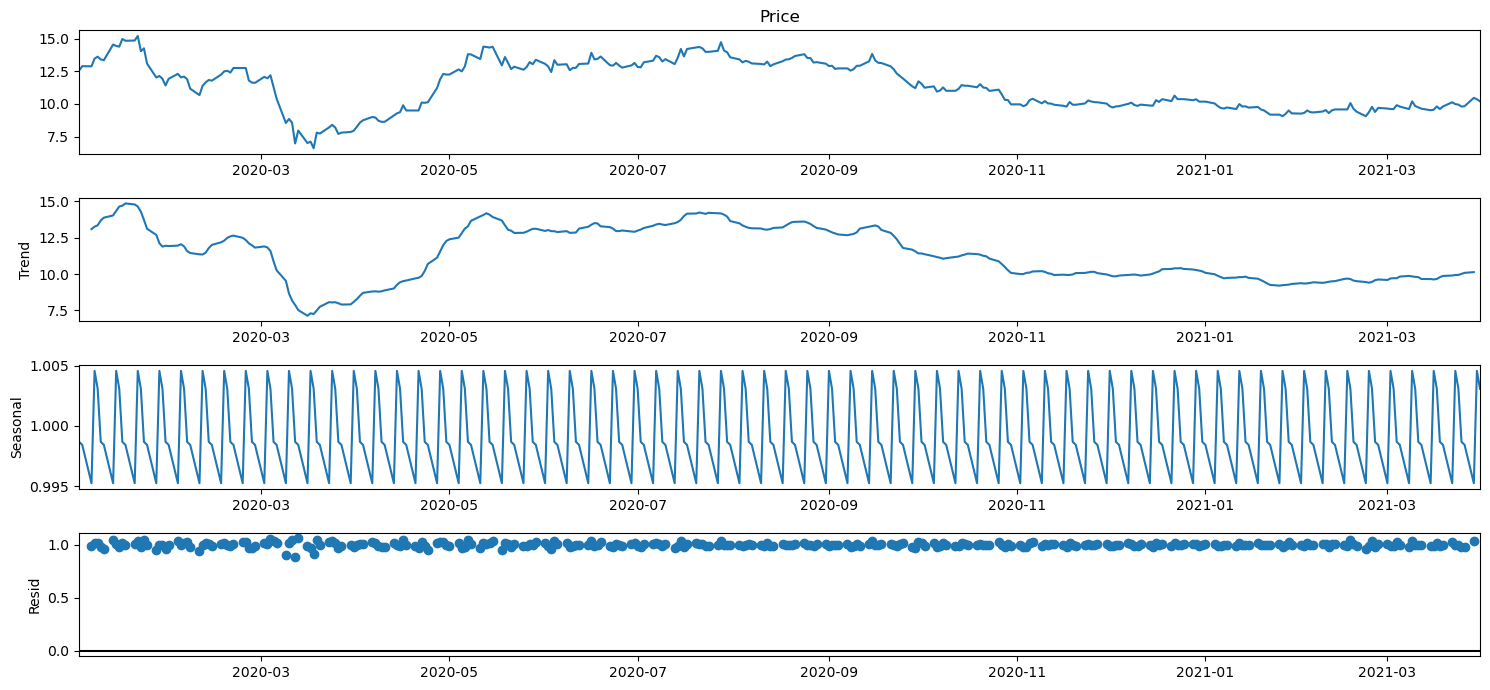

In [253]:
# Applying a multiplicative seasonal decomposition
beef_df_decomposed = seasonal_decompose(beef_df['Price'], model='multiplicative')

# Plotting the trend, seasonal and residuals
beef_df_decomposed.plot()
plt.show()

### Time Series Stationarity

In [254]:
# Applying check_stationarity function
check_stationarity(beef_df['Price'])

KPSS test: Non-Stationary , Number of lags: 11 
ADF test: Non-Stationarity , Number of lags: 3


### Train Test Split

In [255]:
# Train split
beef_train = beef_df.loc['2020']

# Test split
beef_test = beef_df.loc['2021']

# Number of training and testing data points
print(f"Number of training data points: {len(beef_train)}")
print(f"Number of testing data points: {len(beef_test)}")

Number of training data points: 261
Number of testing data points: 64


### Auto ARIMA

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=270.309, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=270.965, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=267.142, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=262.792, Time=0.03 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=264.374, Time=0.04 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=265.333, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=270.633, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=273.651, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=265.624, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=264.579, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=266.113, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=269.437, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=267.920, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=260.068, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=261.983, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[1] i

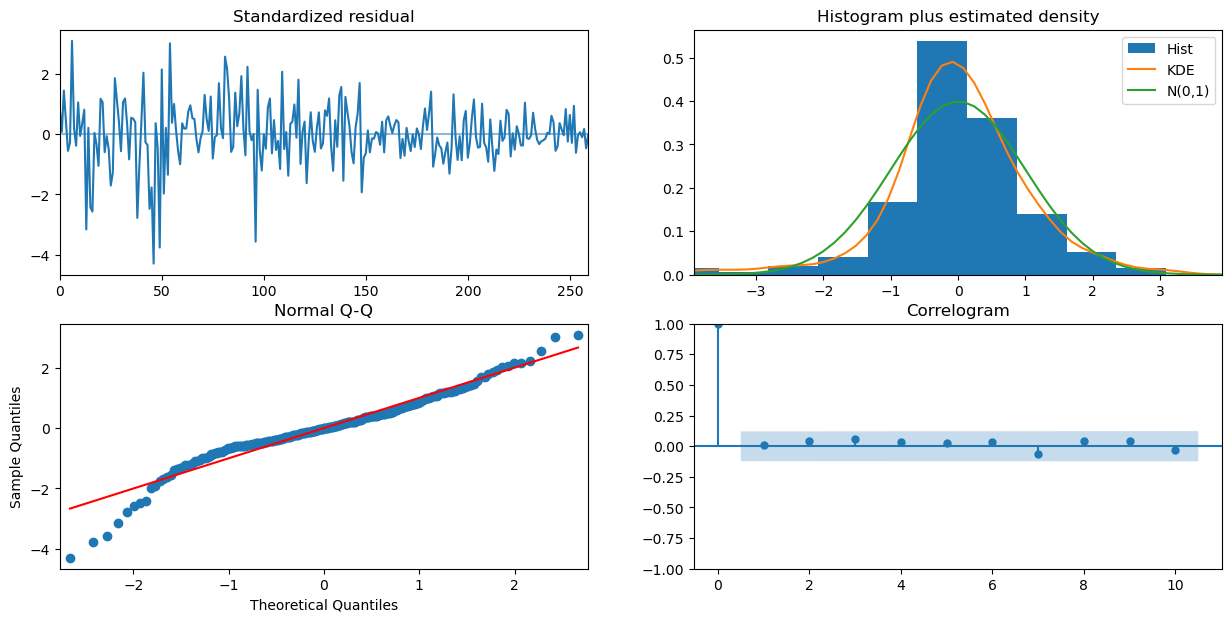

In [256]:
# Applying auto ARIMA
beef_auto_model = auto_arima(beef_train['Price'], test='adf', stepwise=False, trace=True)

# Model summary
print(beef_auto_model.summary())

# Diagnostic plots
beef_auto_model.plot_diagnostics()
plt.show()

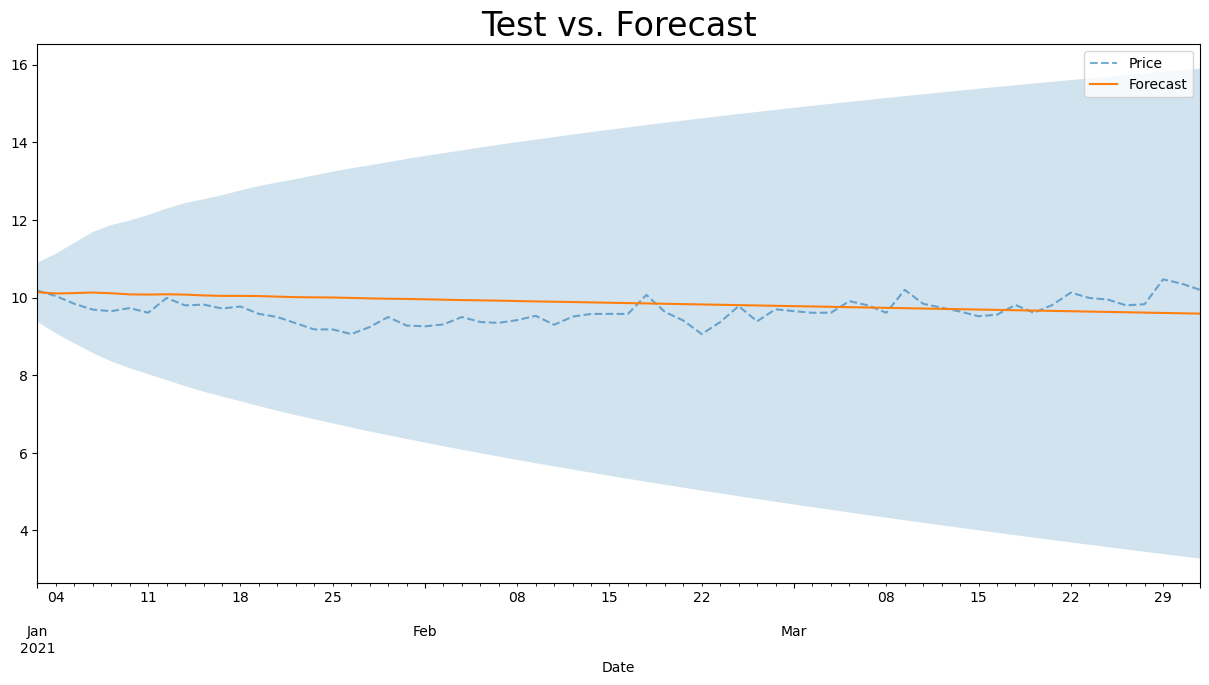

In [259]:
# Statistical model predictions and confidence intervals
beef_forecast, beef_conf_intervals = beef_auto_model.predict(n_periods=len(beef_test), return_conf_int=True)

# Storing upper and lower confidence intervals
lower_ci, upper_ci = zip(*beef_conf_intervals)

# Predictions with confidence intervals plot
ax = beef_test['Price'].plot(style='--', alpha=0.6)
pd.Series(beef_forecast, index=beef_test.index).plot(style='-', ax=ax, label='Forecast')
plt.fill_between(beef_test.index, lower_ci, upper_ci, alpha=0.2)
plt.title("Test vs. Forecast", size=24)
plt.legend()
plt.show()

### Model Evaluation

In [260]:
mse = mean_squared_error(beef_test['Price'], beef_forecast)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(beef_test['Price'], beef_forecast)
print("Mea Absolute Error:", mae)
rmse = math.sqrt(mean_squared_error(beef_test['Price'], beef_forecast))
print("Root Mean Squared Error:", rmse)
mape = mean_absolute_percentage_error(beef_test['Price'], beef_forecast)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 0.1923547717717364
Mea Absolute Error: 0.3674712036515931
Root Mean Squared Error: 0.4385826852165238
Mean Absolute Percentage Error: 0.03840537941867067


### Bollinger Bands

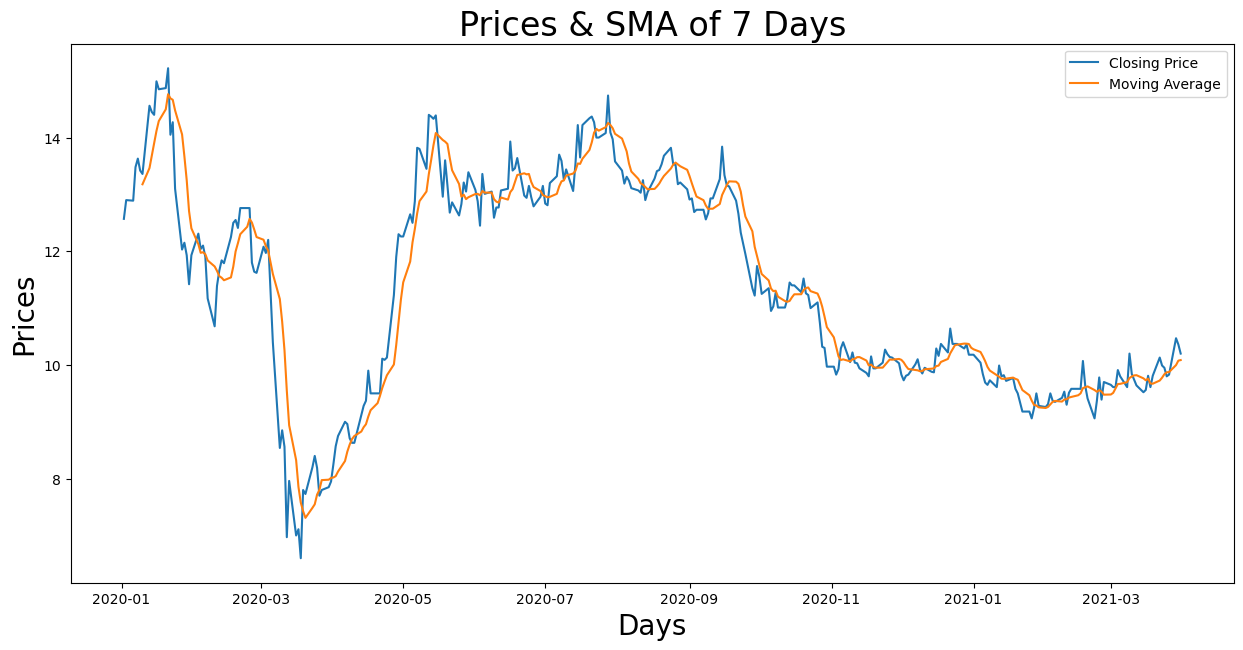

In [261]:
# Line plot showing the prices and the simple moving average
sma = get_sma(beef_df['Price'], 7)
beef_df['sma_7'] = sma

# Plotting the data
plt.plot(beef_df['Price'], label="Closing Price")
plt.plot(beef_df['sma_7'], label='Moving Average')
plt.title("Prices & SMA of 7 Days", size=24)
plt.xlabel("Days", size=20)
plt.ylabel("Prices", size=20)
plt.legend()
plt.show()

In [262]:
# Applying the upper and lower bollinger bands
beef_df['upper_bb'], beef_df['lower_bb'] = bb(beef_df['Price'], sma, 7)

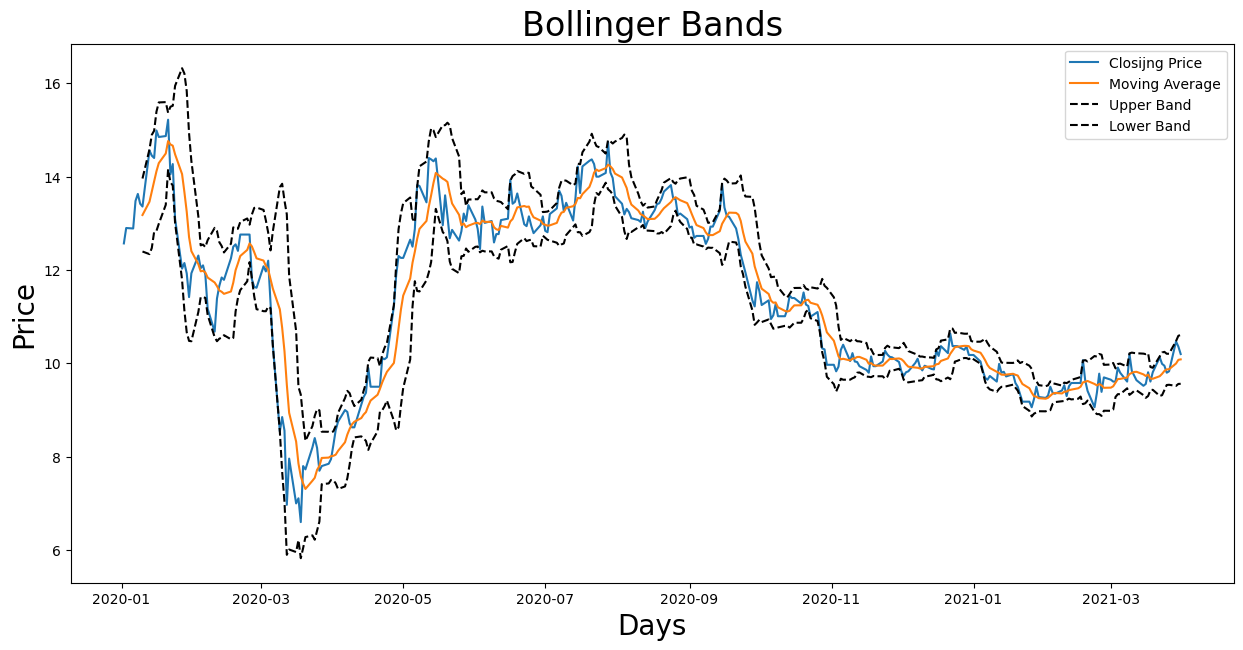

In [263]:
# Plotting the results of the Bollinger bands
plt.plot(beef_df['Price'], label='Closijng Price')
plt.plot(beef_df['sma_7'], label='Moving Average')
plt.plot(beef_df['upper_bb'], label='Upper Band', c='black', linestyle='--')
plt.plot(beef_df['lower_bb'], label='Lower Band', c='black', linestyle='--')
plt.title("Bollinger Bands", size=24)
plt.xlabel('Days', size=20)
plt.ylabel("Price", size=20)
plt.legend()
plt.show()

In [264]:
# Applying the Bollinger Bands Strategy function
buy_price, sell_price, bb_signal = implement_bb_strategy(beef_df['Price'], beef_df['lower_bb'], 
                                                        beef_df['lower_bb'])

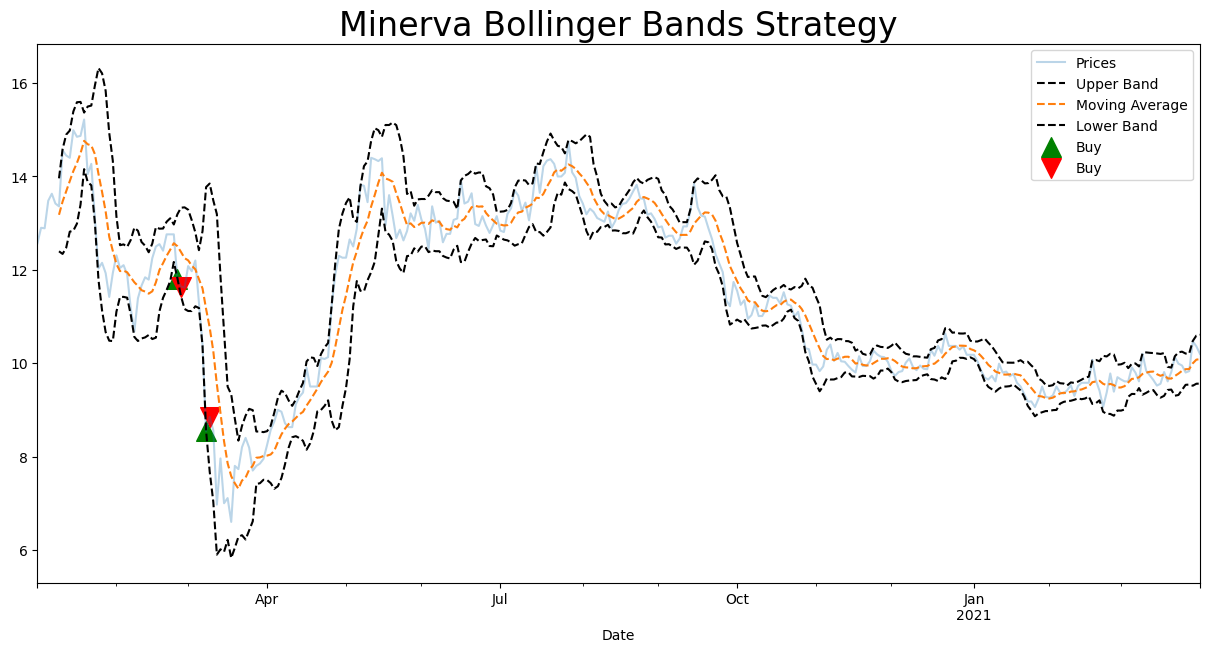

In [265]:
# Plotting the results of the Bollinger Band Strategy
beef_df['Price'].plot(label='Prices', alpha=0.3)
beef_df['upper_bb'].plot(label='Upper Band', linestyle='--', c='black')
beef_df['sma_7'].plot(label="Moving Average", linestyle='--')
beef_df['lower_bb'].plot(label='Lower Band', linestyle='--', c='black')
plt.scatter(beef_df.index, buy_price, marker='^', c='green', label='Buy', s=200)
plt.scatter(beef_df.index, sell_price, marker='v', c='red', label='Buy', s=200)
plt.title("Minerva Bollinger Bands Strategy", size=24)
plt.legend()
plt.show()

In [266]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, sma)

Return using Bollinger Band Strategy is 1.27%.
Return from do nothing strategy is nan%


In [267]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, beef_forecast)

Return using Bollinger Band Strategy is 1.27%.
Return from do nothing strategy is -5.44%


## Pampa Energia SA

Pampa Energía S.A. is the largest independent energy company in Argentina, with participation in the electricity and oil and gas value chain. It was founded in 2005 and is headquartered in Buenos Aires.

Pampa is listed on the Buenos Aires Stock Exchange and is one of the Argentine companies with a greater weight on the Merval index (7.1809% as from January 1, 2019). Besides, Pampa is one of the Argentine companies with a greater weight on the MSCI Argentina Index (10.77% as of January 31, 2019).

Pampa has a Level II American Depositary Share (ADS) program listed in the New York Stock Exchange, and each ADS represents 25 common shares.



In [268]:
# Creating a DataFrame of the data
pampa_df = excelfile.parse(sheet_name=4, index_col=0, parse_dates=['Date'])

In [269]:
# Viewing first 5 observations
pampa_df.head()

Price   Open   High    Low     Vol.  Change %
Date                                                              
2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564.30K   -0.0110
2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141.40K    0.0129
2021-03-29 00:00:00     85     80     86     79  371.22K    0.0385
2021-03-26 00:00:00  81.85     84   84.6   80.7  462.55K   -0.0209
2021-03-25 00:00:00   83.6   85.2   87.3   82.1  389.78K   -0.0313

In [270]:
# Viewing last 5 observations
pampa_df.tail()

Price                Open             High  \
Date                                                                       
2020-01-07 00:00:00            47.6               48.35               49   
2020-01-06 00:00:00            48.5                48.4             48.7   
2020-01-03 00:00:00            48.8               48.25            49.45   
2020-01-02 00:00:00           48.25               49.35             50.2   
Highest: 90.000      Lowest: 32.000  Difference: 58.000  Average: 61.244   

                                  Low     Vol.  Change %  
Date                                                      
2020-01-07 00:00:00              46.9  901.95K   -0.0186  
2020-01-06 00:00:00                47  719.24K   -0.0061  
2020-01-03 00:00:00              46.5  595.36K    0.0114  
2020-01-02 00:00:00             47.55  878.50K   -0.0292  
Highest: 90.000      Change %: 71.328      NaN       NaN

In [271]:
# Dropping na values
pampa_df.dropna(inplace=True)

# Viewing last 5 observations
pampa_df.tail()

Price   Open   High    Low     Vol.  Change %
Date                                                              
2020-01-08 00:00:00   46.5   47.5   47.5     46    1.18M   -0.0231
2020-01-07 00:00:00   47.6  48.35     49   46.9  901.95K   -0.0186
2020-01-06 00:00:00   48.5   48.4   48.7     47  719.24K   -0.0061
2020-01-03 00:00:00   48.8  48.25  49.45   46.5  595.36K    0.0114
2020-01-02 00:00:00  48.25  49.35   50.2  47.55  878.50K   -0.0292

In [272]:
# Information about data
pampa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 2021-03-31 00:00:00 to 2020-01-02 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     300 non-null    object 
 1   Open      300 non-null    object 
 2   High      300 non-null    object 
 3   Low       300 non-null    object 
 4   Vol.      300 non-null    object 
 5   Change %  300 non-null    float64
dtypes: float64(1), object(5)
memory usage: 16.4+ KB


In [273]:
# Changing the column name from Vol. to Volume
pampa_df.rename(columns={'Vol.':'Volume'}, inplace=True)

# Checking the column names of the data
pampa_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [274]:
# Applying clean_volume function to the Vol. variable in the data
pampa_df['Volume'] = pampa_df['Volume'].apply(clean_volume)

# Viewing first 5 observations
pampa_df.head()

Price   Open   High    Low    Volume  Change %
Date                                                               
2021-03-31 00:00:00  85.15   86.5   88.1  85.15  564300.0   -0.0110
2021-03-30 00:00:00   86.1  85.15  86.75   84.6  141400.0    0.0129
2021-03-29 00:00:00     85     80     86     79  371220.0    0.0385
2021-03-26 00:00:00  81.85     84   84.6   80.7  462550.0   -0.0209
2021-03-25 00:00:00   83.6   85.2   87.3   82.1  389780.0   -0.0313

In [275]:
# Fixing the format of the datetimeindex
pampa_df.index = pd.to_datetime(pampa_df.index, format='%Y-%m-%d')

# Sorting the date in an ascending order
pampa_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
pampa_df.head()

Price   Open   High    Low     Volume  Change %
Date                                                       
2020-01-02  48.25  49.35   50.2  47.55   878500.0   -0.0292
2020-01-03   48.8  48.25  49.45   46.5   595360.0    0.0114
2020-01-06   48.5   48.4   48.7     47   719240.0   -0.0061
2020-01-07   47.6  48.35     49   46.9   901950.0   -0.0186
2020-01-08   46.5   47.5   47.5     46  1180000.0   -0.0231

In [276]:
# Changing the data types of the variables
pampa_df = pampa_df.astype(float)

# Checking the dtypes 
pampa_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

## Statistical Analysis of Pampa Energia

### Plotting Time Series

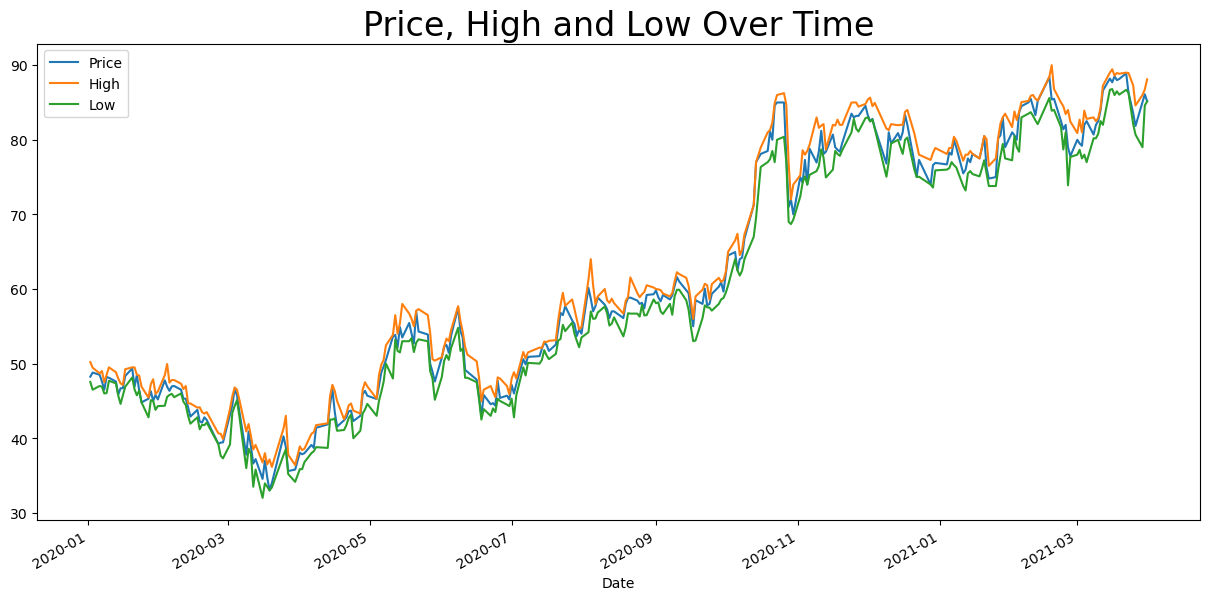

In [278]:
# Line plot of the Price, High and Low variables
pampa_df[['Price', 'High','Low']].plot()
plt.title("Price, High and Low Over Time", size=24)
plt.show()

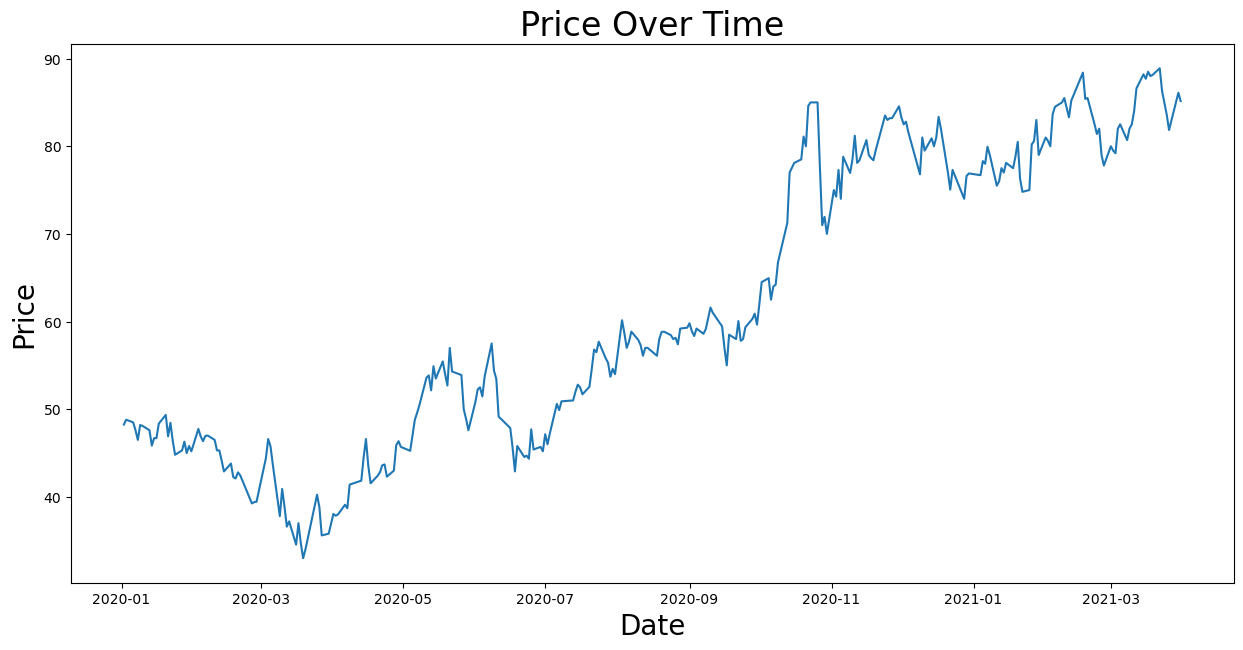

In [279]:
# Line plot of the Price variable
plt.plot(pampa_df.index, pampa_df['Price'])
plt.xlabel('Date', size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

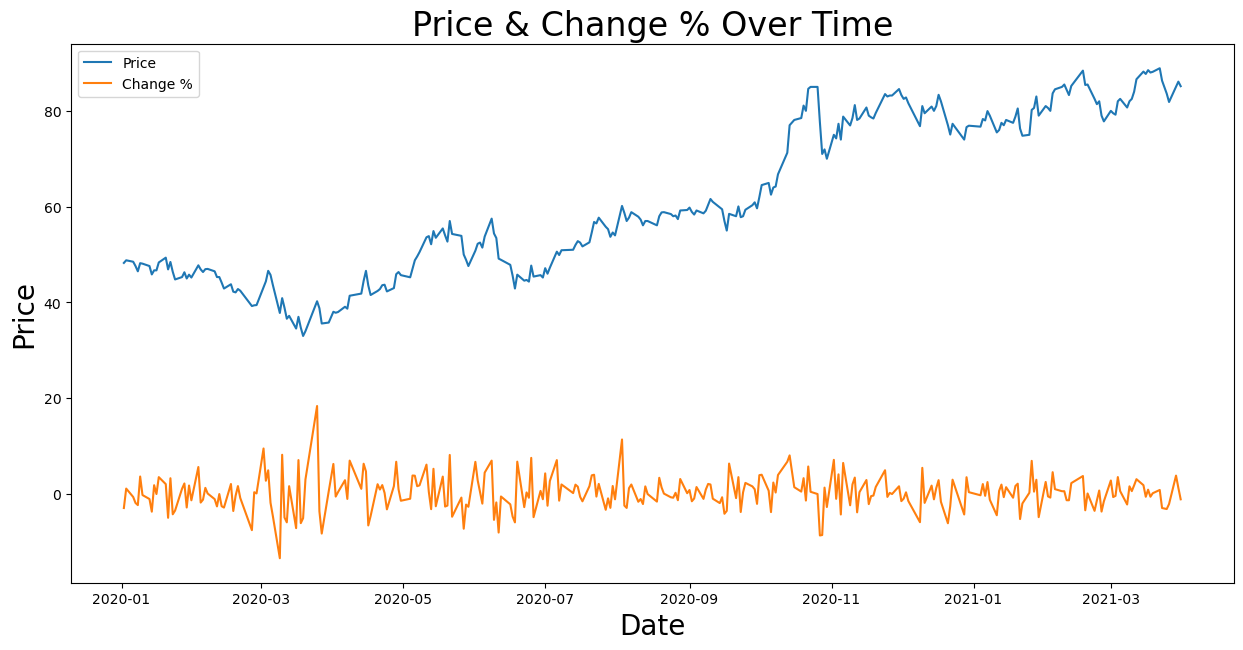

In [281]:
# Line plot of the Price & Change % variables
plt.plot(pampa_df.index, pampa_df['Price'], label='Price')
plt.plot(pampa_df.index, pampa_df['Change %']*100, label='Change %')
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price & Change % Over Time", size=24)
plt.legend()
plt.show()

### Time Series Decomposition

In [282]:
# importing library
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the time series frequency
pampa_df = pampa_df.asfreq('b', method='ffill')

# Checking the time series frequency
print(pampa_df.index.freq)

<BusinessDay>


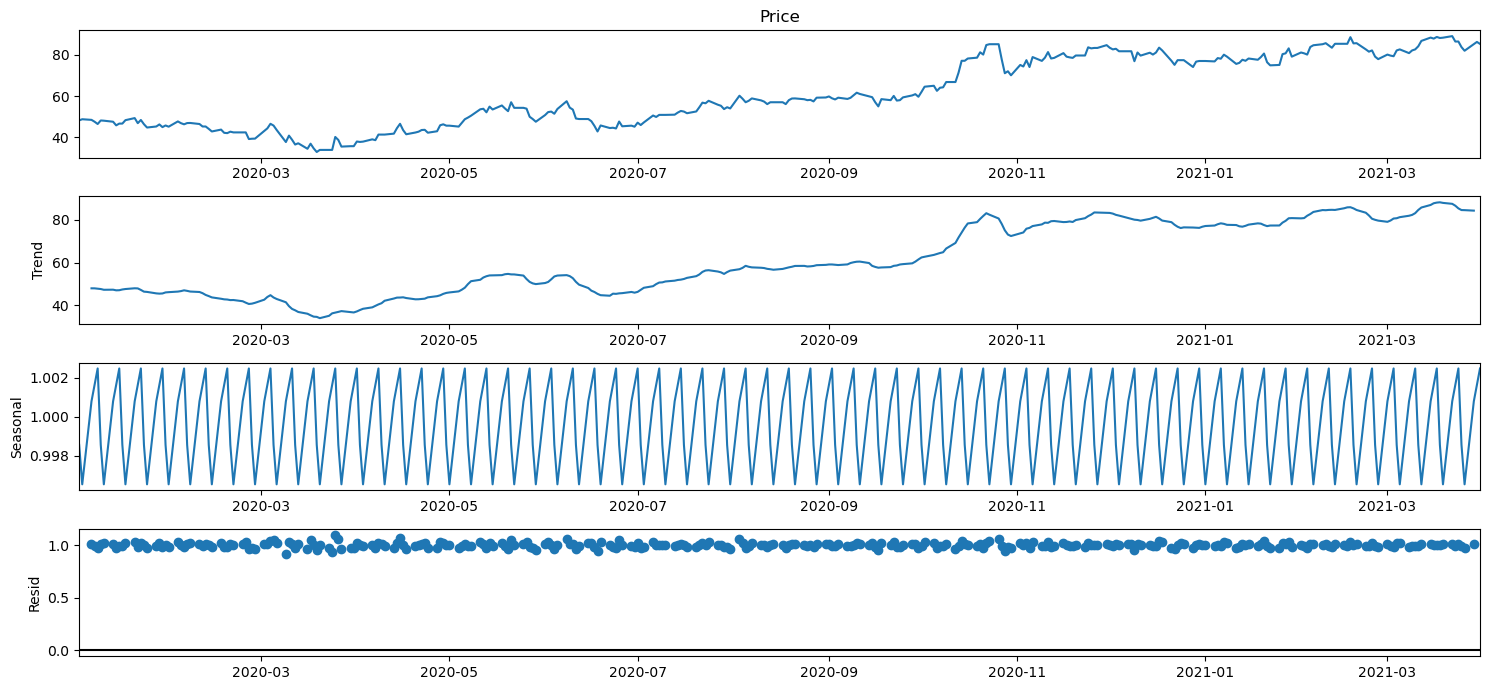

In [283]:
# Applying a multiplicative seasonal decomposition
pampa_df_decomposed = seasonal_decompose(pampa_df['Price'], model='multiplicative')

# Plotting the trend, seasonal and residuals
pampa_df_decomposed.plot()
plt.show()

### Time Series Stationarity

In [284]:
# Applying check_stationarity function
check_stationarity(pampa_df['Price'])

KPSS test: Non-Stationary , Number of lags: 11 
ADF test: Non-Stationarity , Number of lags: 1


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Train Test Split

In [285]:
# Train split
pampa_train = pampa_df.loc['2020']

# Test split
pampa_test = pampa_df.loc['2021']

# Number of training and testing data points
print(f"Number of training data points: {len(pampa_train)}")
print(f"Number of testing data points: {len(pampa_test)}")

Number of training data points: 261
Number of testing data points: 64


### Auto ARIMA

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1099.299, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1098.814, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1100.716, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1099.280, Time=0.03 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1101.279, Time=0.03 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1102.980, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1098.691, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1099.818, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1101.808, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1101.279, Time=0.07 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1102.623, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1100.461, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1101.811, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=1101.279, Time=0.13 sec
 ARIMA(3,1,0)(0

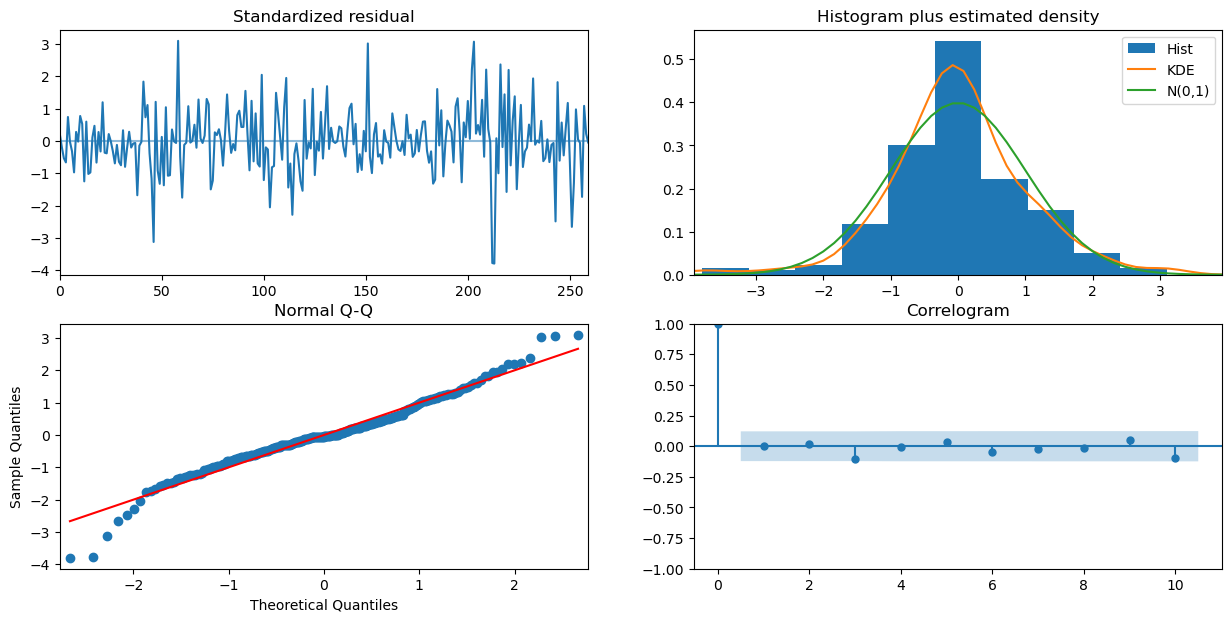

In [286]:
# Applying auto ARIMA
pampa_auto_model = auto_arima(pampa_train['Price'], test='adf', stepwise=False, trace=True)

# Model summary
print(pampa_auto_model.summary())

# Diagnostic plots
pampa_auto_model.plot_diagnostics()
plt.show()

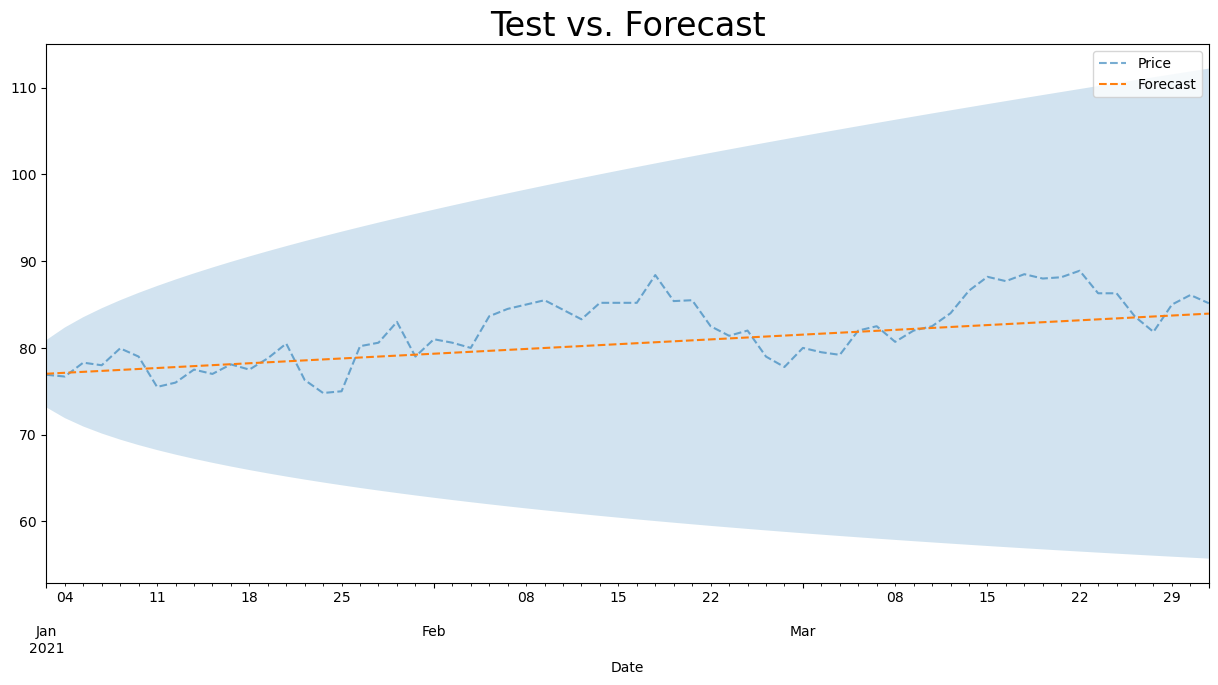

In [287]:
# Statistical model predictions and confidence intervals
pampa_forecast, pampa_conf_intervals = pampa_auto_model.predict(n_periods=len(pampa_test), return_conf_int=True)

# Storing upper and lower confidence intervals
lower_ci, upper_ci = zip(*pampa_conf_intervals)

# Predictions with confidence intervals plot
ax = pampa_test['Price'].plot(style='--', alpha=0.6)
pd.Series(pampa_forecast, index=pampa_test.index).plot(style='--', ax=ax, label='Forecast')
plt.fill_between(pampa_test.index, lower_ci, upper_ci, alpha=0.2)
plt.title("Test vs. Forecast", size=24)
plt.legend()
plt.show()

### Model Evaluation

In [288]:
mse = mean_squared_error(pampa_test['Price'], pampa_forecast)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(pampa_test['Price'], pampa_forecast)
print("Mean Absolute Error:", mae)
rmse = math.sqrt(mean_squared_error(pampa_test['Price'], pampa_forecast))
print("Root Mean Squared Error:", rmse)
mape = mean_absolute_percentage_error(pampa_test['Price'], pampa_forecast)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 9.883947039034359
Mean Absolute Error: 2.506909992456694
Root Mean Squared Error: 3.143874526604769
Mean Absolute Percentage Error: 0.02998763207679771


### Bollinger Bands

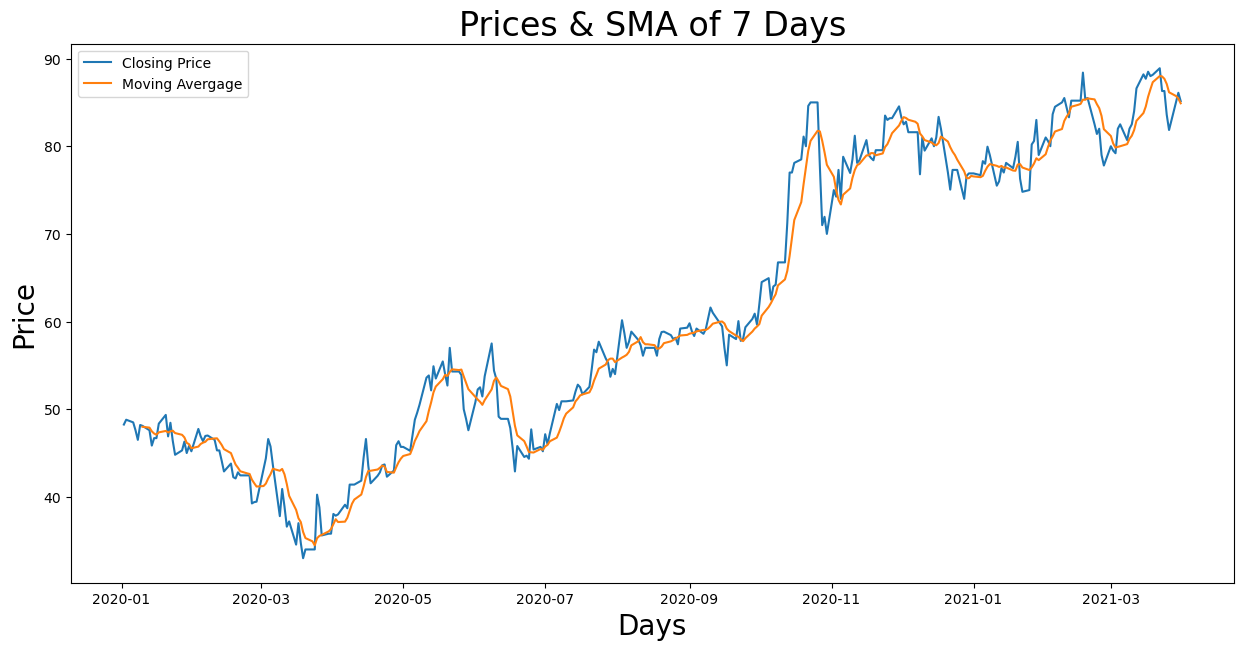

In [289]:
# Line plot showing the price and the simple mooving average
sma = get_sma(pampa_df['Price'], 7)
pampa_df['sma_7'] = sma

# Plotting the data
plt.plot(pampa_df['Price'], label='Closing Price')
plt.plot(sma, label='Moving Avergage')
plt.xlabel("Days", size=20)
plt.ylabel("Price", size=20)
plt.title("Prices & SMA of 7 Days", size=24)
plt.legend()
plt.show()

In [290]:
# Applying the upper and lower Bollinger Bands
pampa_df['upper_bb'], pampa_df['lower_bb'] = bb(pampa_df['Price'], sma, 7)

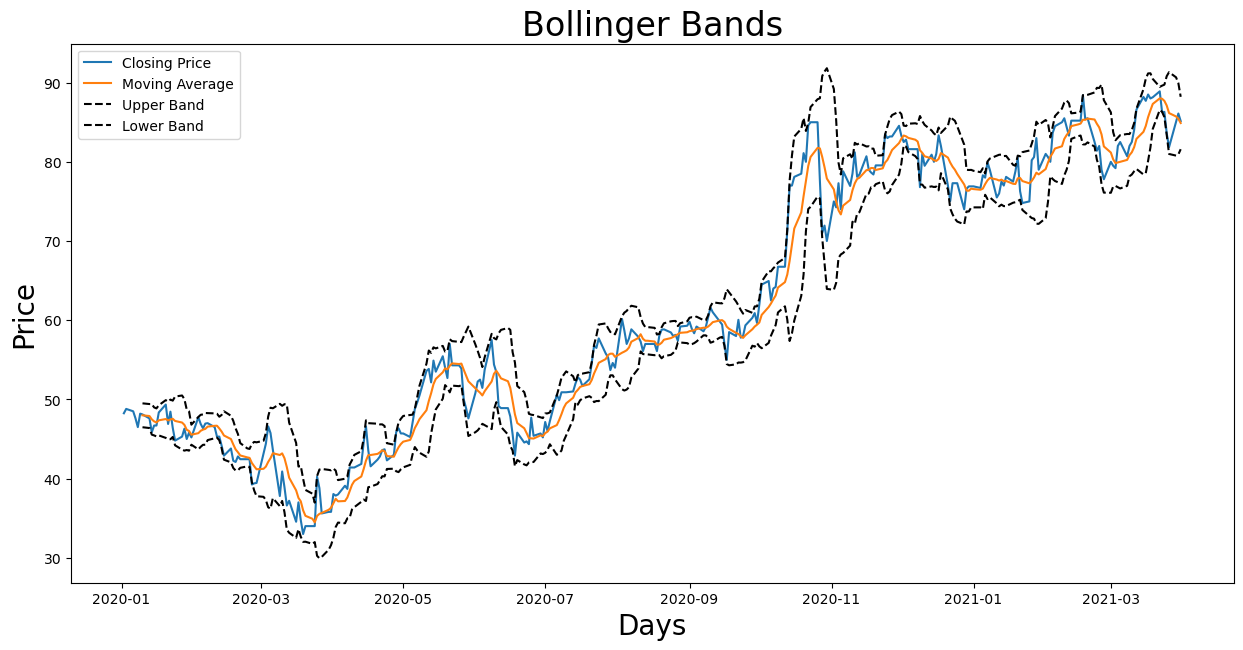

In [291]:
# Plotting the results of the bollinger bands
plt.plot(pampa_df['Price'], label='Closing Price')
plt.plot(pampa_df['sma_7'], label="Moving Average")
plt.plot(pampa_df['upper_bb'], label='Upper Band', c='black', linestyle='--')
plt.plot(pampa_df['lower_bb'], label='Lower Band', c='black', linestyle='--')
plt.title("Bollinger Bands", size=24)
plt.xlabel("Days", size=20)
plt.ylabel("Price", size=20)
plt.legend()
plt.show()

In [292]:
# Applying the Bollinger Bands Strategy function
buy_price, sell_price, bb_signal = implement_bb_strategy(pampa_df['Price'], pampa_df['lower_bb'], 
                                                        pampa_df['upper_bb'])

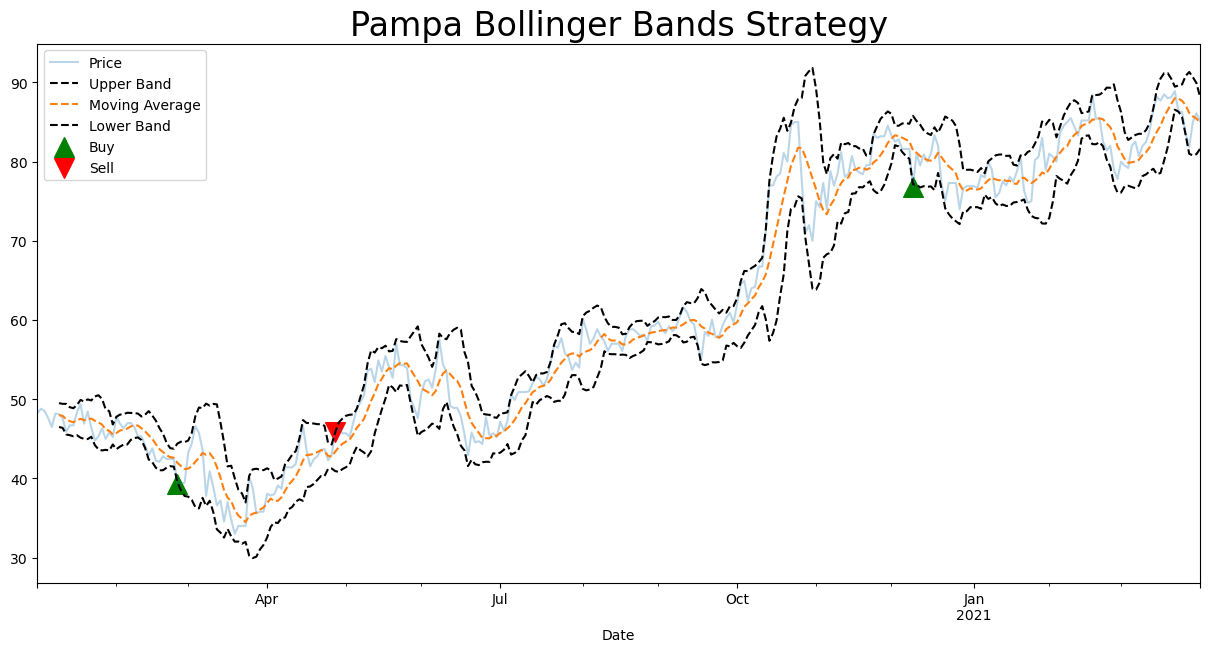

In [293]:
# Plotting the results of the Bollinger Bands Strategy
pampa_df['Price'].plot(label='Price', alpha=0.3)
pampa_df['upper_bb'].plot(label='Upper Band', linestyle='--', c='black')
pampa_df['sma_7'].plot(label='Moving Average', linestyle='--')
pampa_df['lower_bb'].plot(label='Lower Band', linestyle='--', c='black')
plt.scatter(pampa_df.index, buy_price, marker="^", c='green', label='Buy', s=200)
plt.scatter(pampa_df.index, sell_price, marker="v", c='red', label='Sell', s=200)
plt.title("Pampa Bollinger Bands Strategy", size=24)
plt.legend()
plt.show()

In [294]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, sma)

Return using Bollinger Band Strategy is 16.94%.
Return from do nothing strategy is nan%


In [295]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, pampa_forecast)

Return using Bollinger Band Strategy is 16.94%.
Return from do nothing strategy is 9.0%


## Cementos Argos SA

Cementos Argos S.A is a Colombian construction materials producer, leader in the cement market in Colombia; it is the fourth largest cement producer in Latin America, and the only producer of white cement in Colombia. Argos has investments in Panama, Honduras, Haiti and the Dominican Republic. It is the second largest concrete producer and the fourth largest cement producer in the United States and it exports cement and clinker to 27 countries around the world. Argos competes with Cemex, Votorantim Cimentos, InterCement, Holcim and other cement companies.

In [296]:
# Creating a CCB DataFrame
ccb_df = excelfile.parse(sheet_name=5, index_col=0, parse_dates=['Date'])

In [297]:
# Viewing first 5 observations
ccb_df.head()

Price  Open  High   Low     Vol.  Change %
Date                                                          
2021-03-31 00:00:00  5150  5100  5170  5100  212.44K    0.0098
2021-03-30 00:00:00  5100  5010  5100  5010  583.70K    0.0109
2021-03-29 00:00:00  5045  5020  5045  5015  117.54K    0.0050
2021-03-26 00:00:00  5020  5085  5085  4980  203.46K   -0.0020
2021-03-25 00:00:00  5030  5035  5045  4950  317.06K    0.0010

In [298]:
# Viewing last 5 observations
ccb_df.tail()

Price                 Open              High  \
Date                                                                          
2020-01-08 00:00:00             6880                 6940              6950   
2020-01-07 00:00:00             6950                 6950              6950   
2020-01-03 00:00:00             7000                 7040              7100   
2020-01-02 00:00:00             7120                 7300              7300   
Highest: 7,300.0     Lowest: 2,415.0  Difference: 4,885.0  Average: 4,836.5   

                                 Low     Vol.  Change %  
Date                                                     
2020-01-08 00:00:00             6880   84.93K   -0.0101  
2020-01-07 00:00:00             6850  168.71K   -0.0071  
2020-01-03 00:00:00             6960  470.77K   -0.0169  
2020-01-02 00:00:00             7120  138.96K   -0.0247  
Highest: 7,300.0     Change %: -29.5      NaN       NaN

In [299]:
# Dropping rows with null values
ccb_df.dropna(inplace=True)

# Checking if null values are removed
ccb_df.tail()

Price  Open  High   Low     Vol.  Change %
Date                                                          
2020-01-09 00:00:00  6810  6880  6890  6800  262.89K   -0.0102
2020-01-08 00:00:00  6880  6940  6950  6880   84.93K   -0.0101
2020-01-07 00:00:00  6950  6950  6950  6850  168.71K   -0.0071
2020-01-03 00:00:00  7000  7040  7100  6960  470.77K   -0.0169
2020-01-02 00:00:00  7120  7300  7300  7120  138.96K   -0.0247

In [301]:
# Information about data
ccb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 2021-03-31 00:00:00 to 2020-01-02 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     303 non-null    object 
 1   Open      303 non-null    object 
 2   High      303 non-null    object 
 3   Low       303 non-null    object 
 4   Vol.      303 non-null    object 
 5   Change %  303 non-null    float64
dtypes: float64(1), object(5)
memory usage: 16.6+ KB


In [302]:
# Renaming the column Vol. into Volume
ccb_df.rename(columns={'Vol.':'Volume'}, inplace=True)

# Checking the column names of the data
ccb_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Volume', 'Change %'], dtype='object')

In [303]:
# Checking the values in Volume
ccb_df['Volume'].unique()

array(['212.44K', '583.70K', '117.54K', '203.46K', '317.06K', '660.95K',
       '1.32M', '3.58M', '1.16M', '186.32K', '225.08K', '134.34K',
       '99.03K', '191.28K', '96.05K', '112.34K', '111.84K', '290.29K',
       '200.91K', '269.89K', '105.64K', '62.12K', '189.98K', '189.03K',
       '500.47K', '339.71K', '454.57K', '73.75K', '154.07K', '41.19K',
       '408.93K', '102.95K', '123.17K', '153.78K', '468.56K', '265.73K',
       '1.07M', '644.63K', '432.05K', '550.67K', '173.62K', '445.79K',
       '1.11M', '180.13K', '630.62K', '108.14K', '100.03K', '376.79K',
       '527.82K', '93.78K', '112.08K', '83.76K', '208.32K', '450.71K',
       '431.28K', '404.93K', '154.80K', '539.18K', '338.98K', '457.03K',
       '454.99K', '651.79K', '876.72K', '339.87K', '10.42K', '527.28K',
       '521.75K', '1.09M', '1.10M', '534.40K', '882.06K', '278.60K',
       '1.71M', '663.62K', '942.57K', '774.20K', '624.96K', '581.92K',
       '442.34K', '903.99K', '505.98K', '471.60K', '258.04K', '348.69K',
  

In [304]:
# Checking the number of values that has the letter "K"
ccb_df['Volume'].str.endswith('K').sum()

259

In [305]:
# Applying clean_volume function 
ccb_df['Volume'] = ccb_df['Volume'].apply(clean_volume)

# Checking the values of Volume variable
ccb_df['Volume'].head()

Date
2021-03-31 00:00:00    212440.0
2021-03-30 00:00:00    583700.0
2021-03-29 00:00:00    117540.0
2021-03-26 00:00:00    203460.0
2021-03-25 00:00:00    317060.0
Name: Volume, dtype: float64

In [306]:
# Fixing the datetimeindex
ccb_df.index = pd.to_datetime(ccb_df.index, format="%Y-%m-%d")

# Sorting the date in an ascending order
ccb_df.sort_index(ascending=True, inplace=True)

# Viewing first 5 observations
ccb_df.head()

Price  Open  High   Low    Volume  Change %
Date                                                  
2020-01-02  7120  7300  7300  7120  138960.0   -0.0247
2020-01-03  7000  7040  7100  6960  470770.0   -0.0169
2020-01-07  6950  6950  6950  6850  168710.0   -0.0071
2020-01-08  6880  6940  6950  6880   84930.0   -0.0101
2020-01-09  6810  6880  6890  6800  262890.0   -0.0102

In [307]:
# Changing the data types of the variables in the dataset
ccb_df = ccb_df.astype(float)

# Checking the data types of the variables
ccb_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Volume      float64
Change %    float64
dtype: object

## Statistical Analysis of Cementos Argos SA

### Plotting Time Series

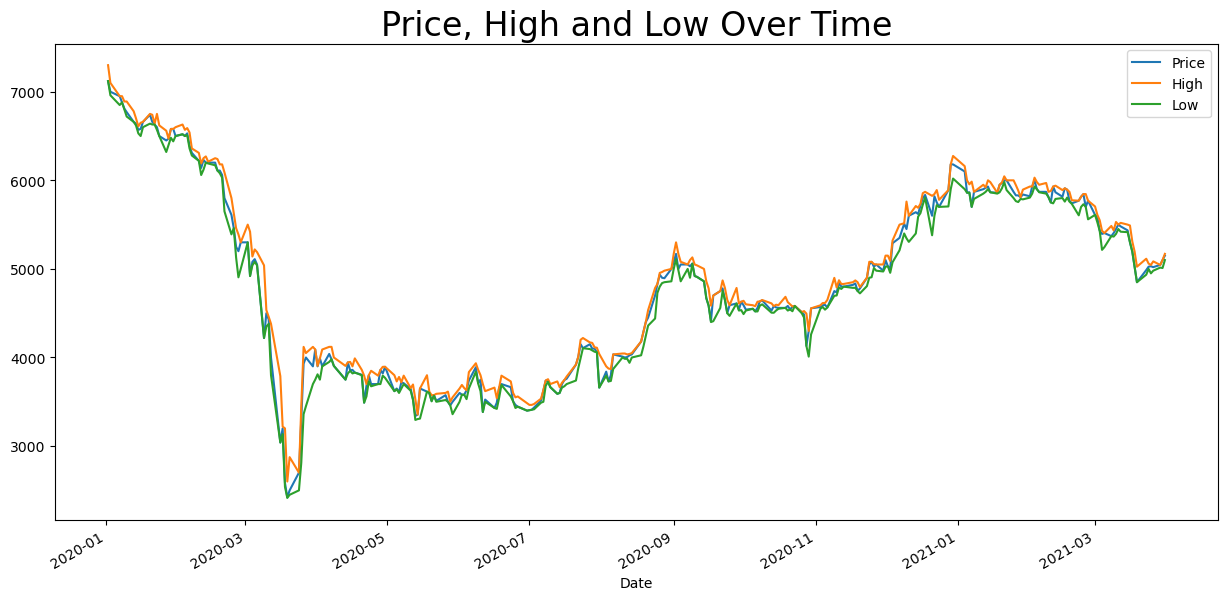

In [308]:
# Line plot of the Price, High and Low variables
ccb_df[['Price','High','Low']].plot()
plt.title("Price, High and Low Over Time", size=24)
plt.legend()
plt.show()

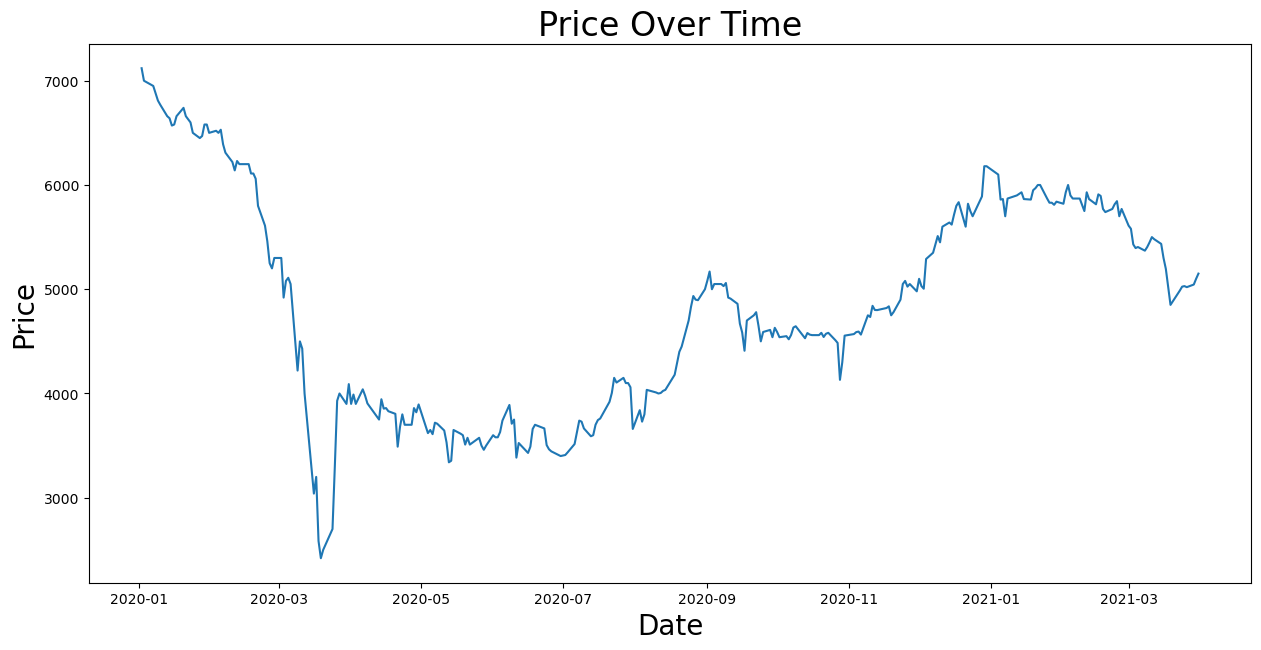

In [309]:
# Line plot of the Price variable
plt.plot(ccb_df.index, ccb_df['Price'])
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price Over Time", size=24)
plt.show()

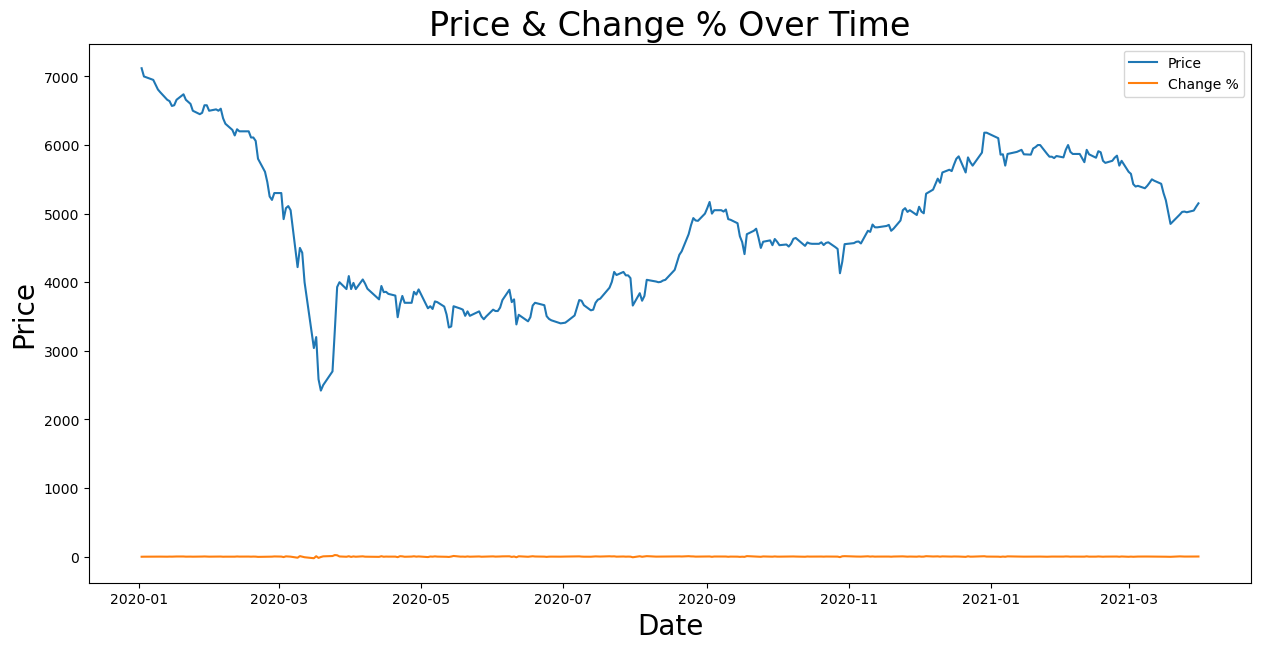

In [316]:
# Line plot of the Price & Change % variables
plt.plot(ccb_df['Price'], label='Price')
plt.plot(ccb_df['Change %'] * 100, label='Change %')
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.title("Price & Change % Over Time", size=24)
plt.legend()
plt.show()

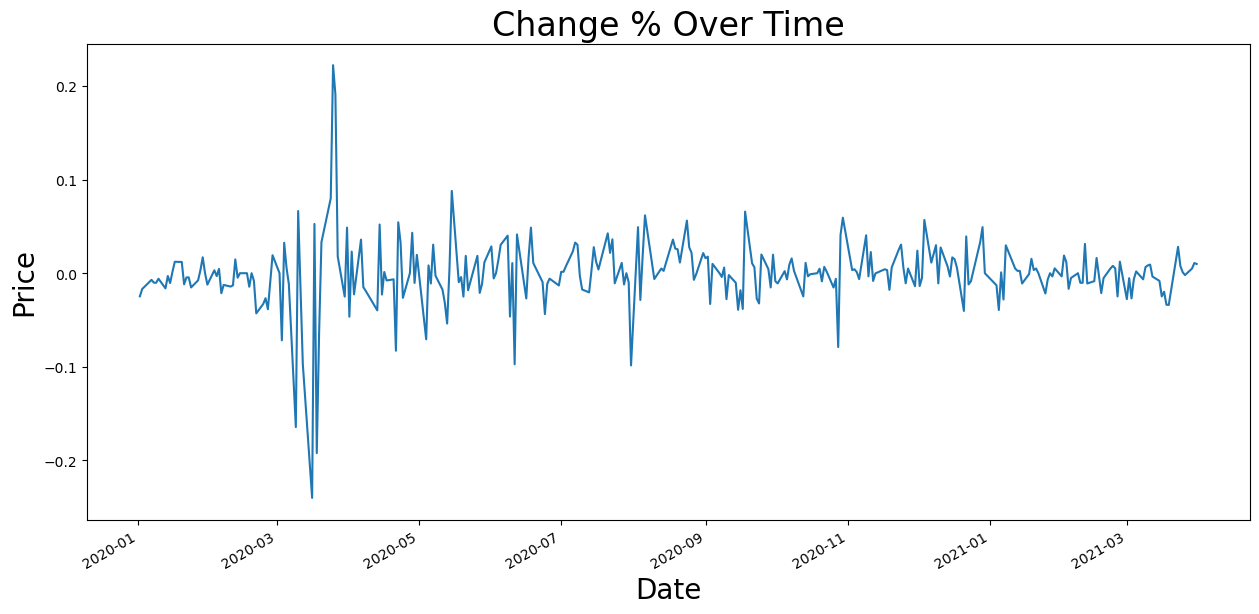

In [315]:
# Change % variable line plot
ccb_df['Change %'].plot()
plt.title("Change % Over Time", size=24)
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.show()

### Time Series Decomposition

In [317]:
# importing library
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the time series frerquency
ccb_df = ccb_df.asfreq('b', method='ffill')

# Checking the time series frequency
print(ccb_df.index.freq)

<BusinessDay>


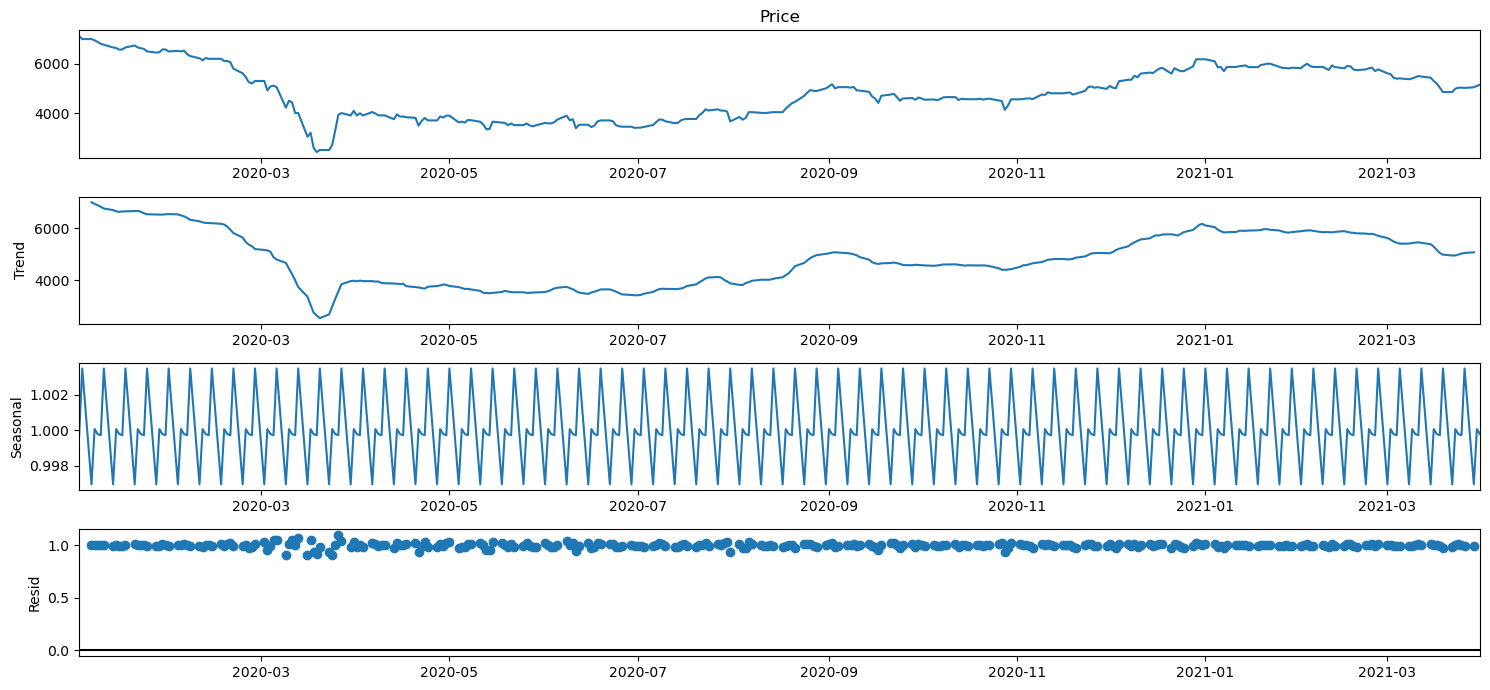

In [320]:
# Applying a multiplicative seasonal decomposition
ccb_df_decomposed = seasonal_decompose(ccb_df['Price'], model='multiplicative')

# Plotting the trends, seasonal and residuals
ccb_df_decomposed.plot()
plt.show()

### Time Series Stationarity

In [321]:
# Applying check_stationarity function
check_stationarity(ccb_df['Price'])

KPSS test: Non-Stationary , Number of lags: 11 
ADF test: Non-Stationarity , Number of lags: 2


### Train Test Split

In [322]:
# Train split
ccb_train = ccb_df.loc['2020']

# Test split
ccb_test = ccb_df.loc['2021']

# Number of training aand testing data points
print(f"Number of training data points: {len(ccb_train)}")
print(f"Number of testing data points: {len(ccb_test)}")

Number of training data points: 261
Number of testing data points: 64


### Auto ARIMA

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3361.887, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3363.870, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3358.550, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3359.256, Time=0.05 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3360.635, Time=0.08 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=3360.908, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=3363.865, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=3362.663, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=3358.532, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=3359.806, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=3361.736, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=3358.329, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=3358.961, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=3359.432, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,1,0)(0

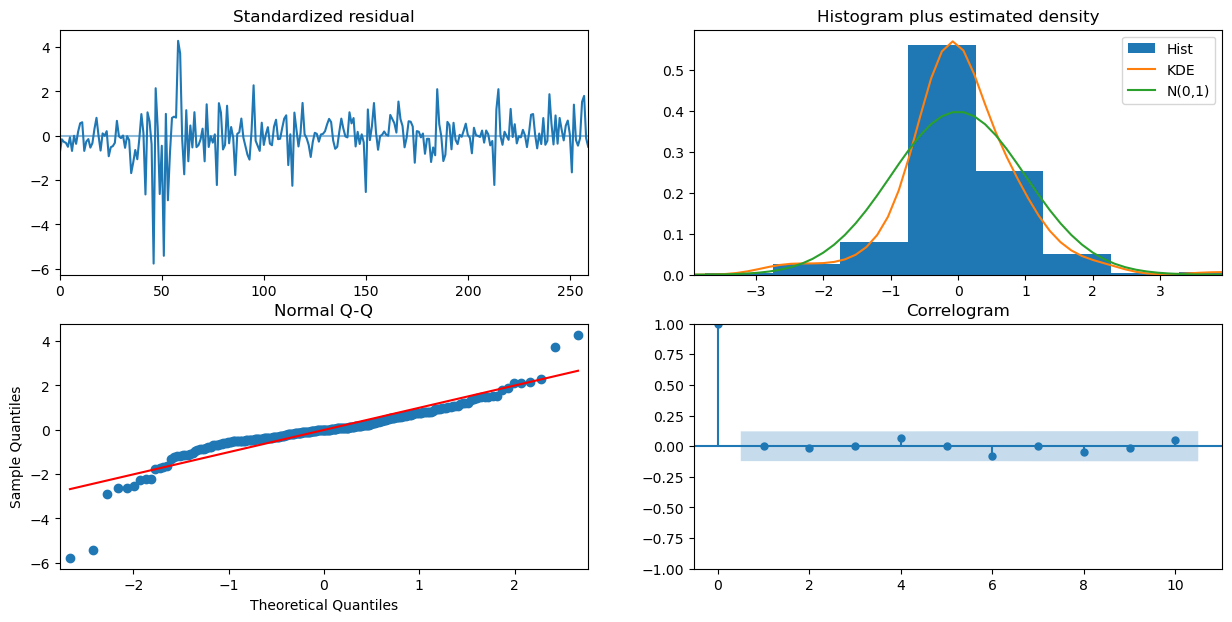

In [337]:
# Applying auto ARIMA
ccb_auto_model = auto_arima(ccb_train['Price'], test='adf', stepwise=False, trace=True)

# Model summary
print(ccb_auto_model.summary())

# Diagnostic plots
ccb_auto_model.plot_diagnostics()
plt.show()

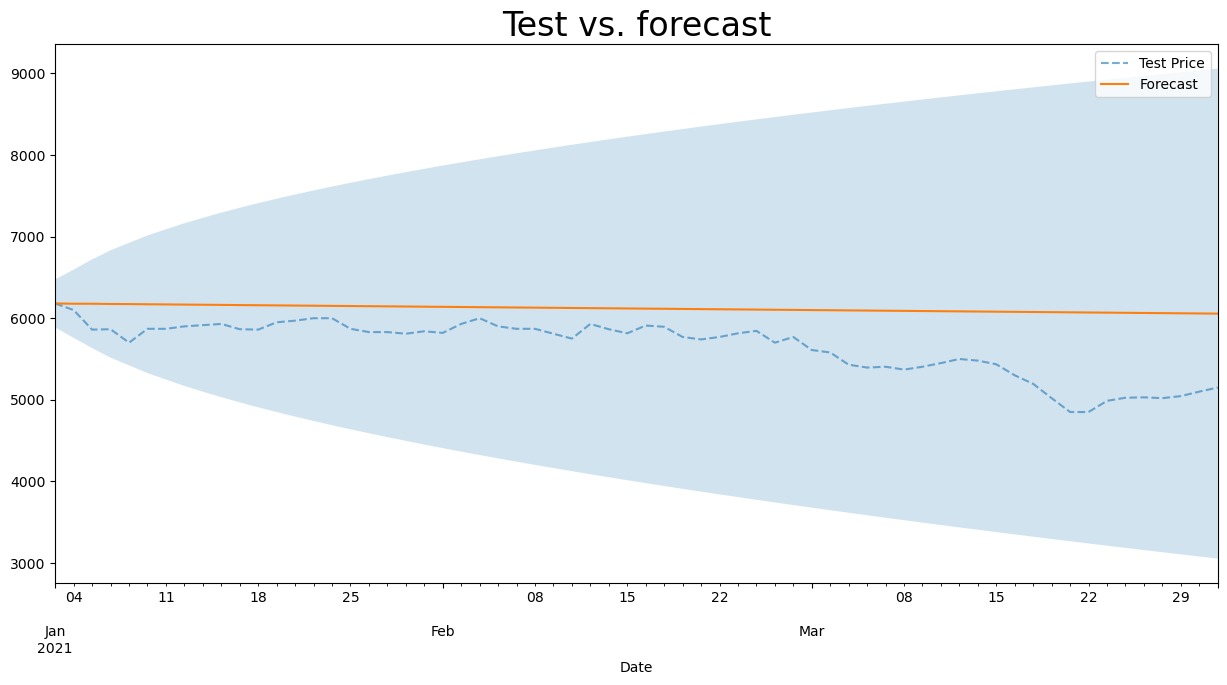

In [338]:
# Statistical model predictions and confidence intervals
ccb_forecast, ccb_conf_intervals = ccb_auto_model.predict(n_periods=len(ccb_test), return_conf_int=True)

# Storing upper and lower confidence intervals
lower_ci, upper_ci = zip(*ccb_conf_intervals)

# Prediction with confidence intervals plot
ax = ccb_test['Price'].plot(label='Test Price', style='--', alpha=0.6)
pd.Series(ccb_forecast, index=ccb_test.index).plot(label="Forecast", style='-', ax=ax)
plt.fill_between(ccb_test.index, lower_ci, upper_ci, alpha=0.2)
plt.title("Test vs. forecast", size=24)
plt.legend()
plt.show()

### Model Evaluation

In [339]:
mse = mean_squared_error(ccb_test['Price'], ccb_forecast)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(ccb_test['Price'], ccb_forecast)
print("Mean Absolute Error:", mae)
rmse = math.sqrt(mean_squared_error(ccb_test['Price'], ccb_forecast))
print("Root Mean Squared Error:", rmse)
mape = mean_absolute_percentage_error(ccb_test['Price'], ccb_forecast)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 317664.4281650946
Mean Absolute Error: 471.3477408562137
Root Mean Squared Error: 563.617270996103
Mean Absolute Percentage Error: 0.08729404979088655


### Bollinger Bands

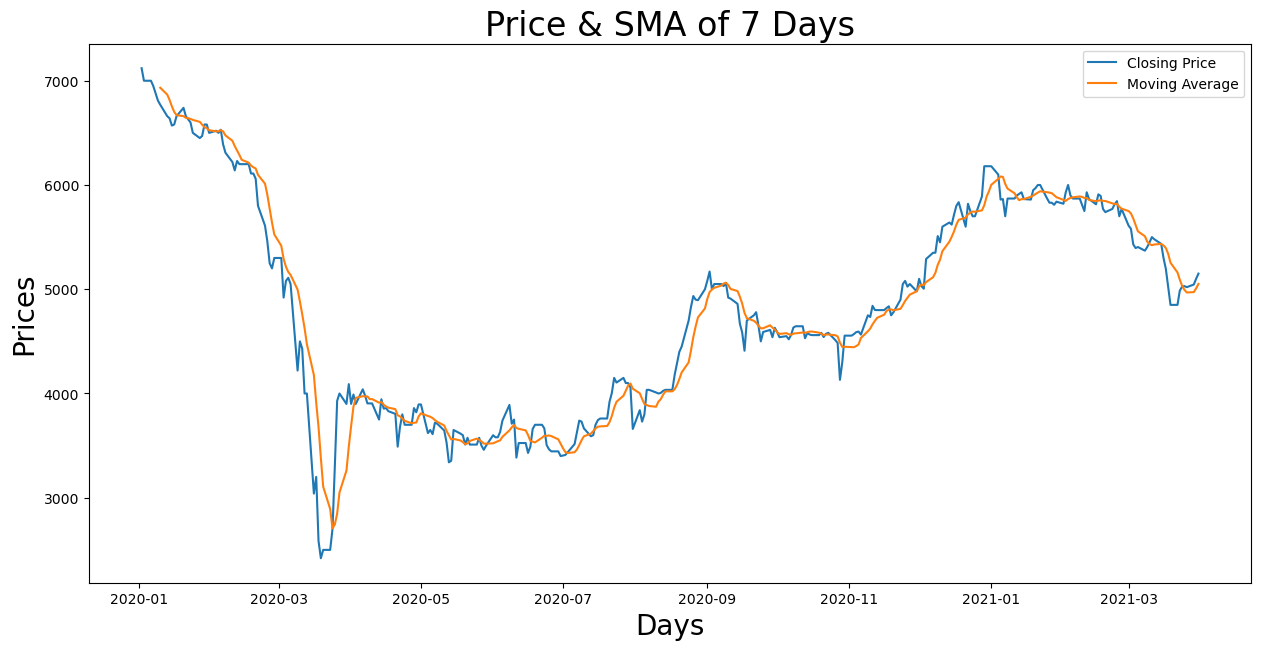

In [362]:
# Line plot showing the price and the simple moving average
sma = get_sma(ccb_df['Price'], 7)
ccb_df['sma_7'] = sma

# Plotting the data
plt.plot(ccb_df['Price'], label='Closing Price')
plt.plot(sma, label='Moving Average')
plt.xlabel("Days", size=20)
plt.ylabel("Prices", size=20)
plt.title("Price & SMA of 7 Days", size=24)
plt.legend()
plt.show()

In [356]:
# Applying the upper and lower bollinger bands 
ccb_df['upper_bb'], ccb_df['lower_bb'] = bb(ccb_df['Price'], sma, 7)

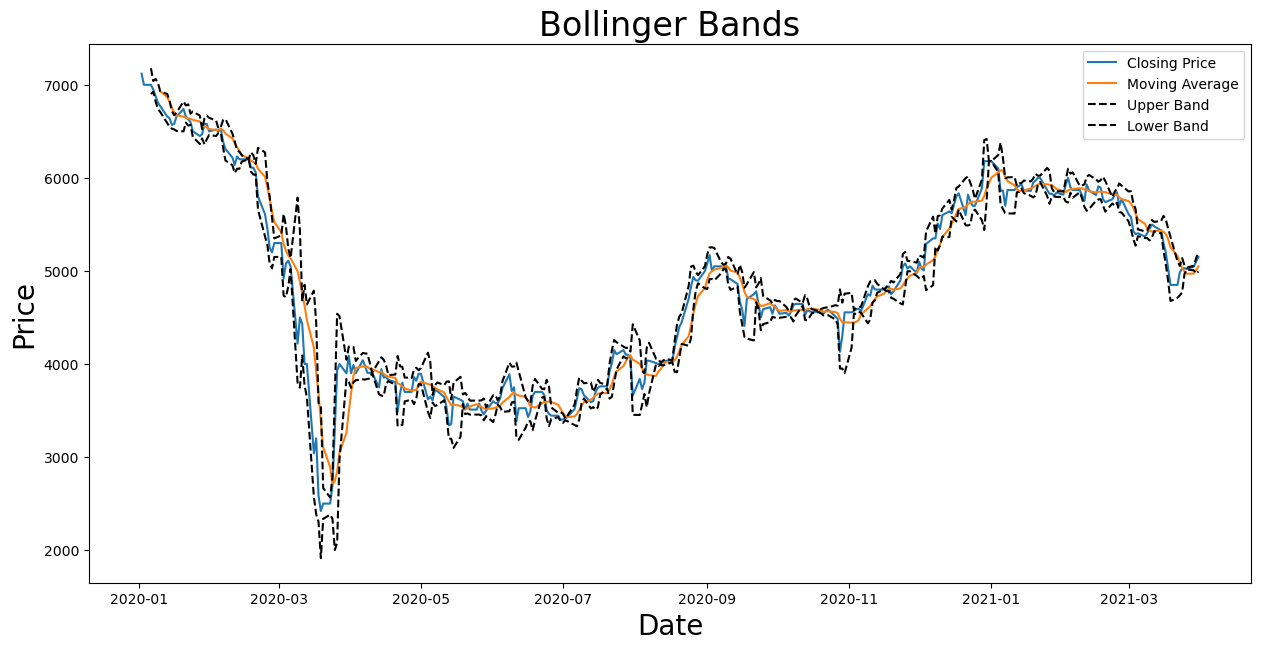

In [363]:
# plotting the results of the Bollinger Bands
plt.plot(ccb_df['Price'], label='Closing Price')
plt.plot(ccb_df['sma_7'], label='Moving Average')
plt.plot(ccb_df['upper_bb'], label='Upper Band', c='black', linestyle='--')
plt.plot(ccb_df['lower_bb'], label='Lower Band', c='black', linestyle='--')
plt.title("Bollinger Bands", size=24)
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20)
plt.legend()
plt.show()

In [351]:
# Applying the Bollinger Band Trading Strategy
buy_price, sell_price, bb_signal = implement_bb_strategy(ccb_df['Price'], ccb_df['lower_bb'], 
                                                        ccb_df['upper_bb'])

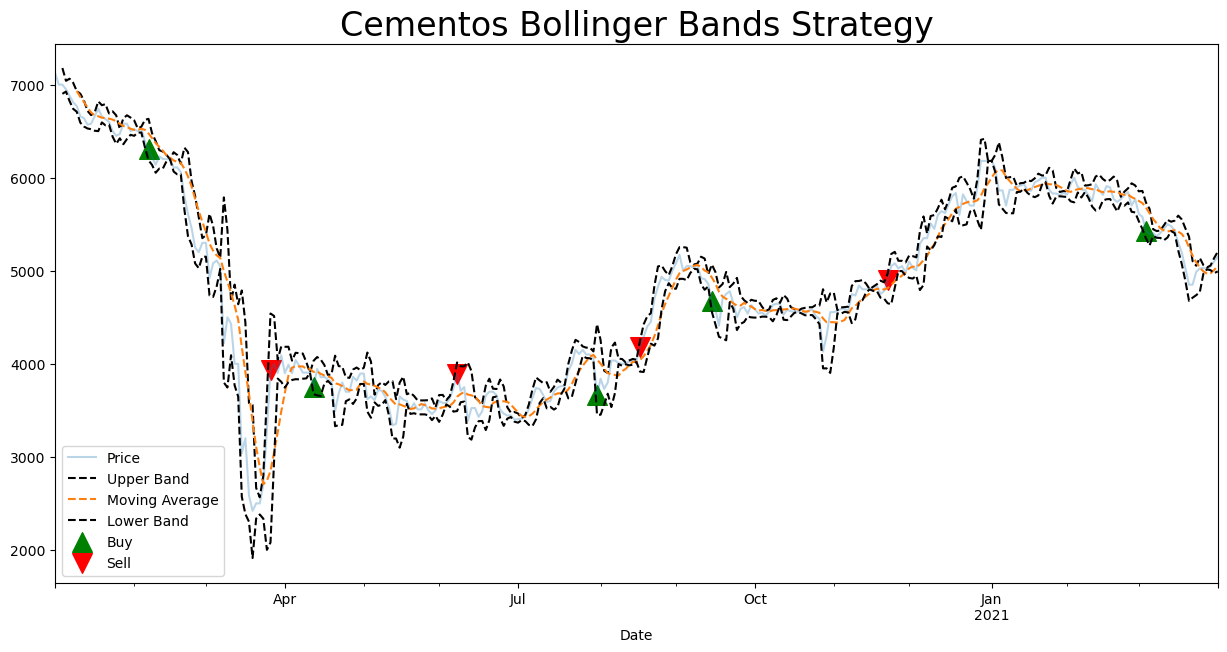

In [364]:
# Plotting the results of the Bollinger Bands Trading startegy
ccb_df['Price'].plot(label='Price', alpha=0.3)
ccb_df['upper_bb'].plot(label='Upper Band', linestyle='--', c='black')
sma.plot(label='Moving Average', linestyle='--')
ccb_df['lower_bb'].plot(label='Lower Band', linestyle='--', c='black')
plt.scatter(ccb_df.index, buy_price, marker='^', c='green', label='Buy', s=200)
plt.scatter(ccb_df.index, sell_price, marker='v', c='red', label='Sell', s=200)
plt.title("Cementos Bollinger Bands Strategy", size=24)
plt.legend()
plt.show()

In [366]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, ccb_df['sma_7'])

Return using Bollinger Band Strategy is -23.61%.
Return from do nothing strategy is nan%


In [367]:
# Applying the calculate returns function
calculate_return(buy_price, sell_price, ccb_forecast)

Return using Bollinger Band Strategy is -23.61%.
Return from do nothing strategy is -2.02%


## Impala Platinum Holdings

Impala Platinum Holdings Limited or Implats is a South African holding company that owns several companies which operate mines that produce platinum and platinum group metals, as well as nickel, copper and cobalt. Its most significant mine is the Impala mine in the North West province of South Africa. The company also owns or has interest in the Two Rivers mine and the Marula mine in the South Africa Bushveld Igneous Complex and the Mimosa mine and Zimplats in Zimbabwe, as well as the Impala Refining Services which smelts and refines metals for other companies. In December 2019, Impala Canada was formed, owned by the holding company, out of the acquisition of North American Palladium and its mine in Ontario, Canada.

In [368]:
# Creating IMPJ dataframe
impj_df = excelfile.parse(sheet_name=6, index_col=0, parse_dates=['Date'])

In [369]:
# Viewing first 5 observations
impj_df.head()

Price   Open   High    Low   Vol.  Change %
Date                                                            
2021-03-31 00:00:00  27373  26980  27526  26657  2.49M    0.0177
2021-03-30 00:00:00  26898  26766  27443  26360  3.02M   -0.0030
2021-03-29 00:00:00  26980  27800  28174  26614  4.44M   -0.0201
2021-03-26 00:00:00  27533  27083  28006  26728  3.36M    0.0365
2021-03-25 00:00:00  26564  25954  27128  25954  2.83M    0.0255

In [370]:
# Viewing last 5 observations
impj_df.tail()

Price                Open             High  \
Date                                                                      
2020-01-07 00:00:00          14500               14688            14688   
2020-01-06 00:00:00          14620               14985            15045   
2020-01-03 00:00:00          14843               14700            14884   
2020-01-02 00:00:00          14330               14525            14764   
Highest: 29,777      Lowest: 4,476  Difference: 25,301  Average: 16,018   

                              Low   Vol.  Change %  
Date                                                
2020-01-07 00:00:00         13940  3.94M   -0.0082  
2020-01-06 00:00:00         14574  2.61M   -0.0150  
2020-01-03 00:00:00         14360  3.19M    0.0358  
2020-01-02 00:00:00         14325  2.01M   -0.0015  
Highest: 29,777      Change %: 91    NaN       NaN

In [371]:
# Dropping row with null values
impj_df.dropna(inplace=True)

# Viewing last 5 observations
impj_df.tail()

Price   Open   High    Low   Vol.  Change %
Date                                                            
2020-01-08 00:00:00  15290  14775  15465  14468  6.24M    0.0545
2020-01-07 00:00:00  14500  14688  14688  13940  3.94M   -0.0082
2020-01-06 00:00:00  14620  14985  15045  14574  2.61M   -0.0150
2020-01-03 00:00:00  14843  14700  14884  14360  3.19M    0.0358
2020-01-02 00:00:00  14330  14525  14764  14325  2.01M   -0.0015

In [372]:
# Information about dataframe
impj_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 2021-03-31 00:00:00 to 2020-01-02 00:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     314 non-null    object 
 1   Open      314 non-null    object 
 2   High      314 non-null    object 
 3   Low       314 non-null    object 
 4   Vol.      314 non-null    object 
 5   Change %  314 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.2+ KB


In [ ]:
# Renaming Vol. column into Volume